## Read datasets

In [410]:
import csv
from datetime import datetime
import pandas

with open('covid_impact_education.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    edu_data=[]
    for row in reader:
        row[0]=datetime.strptime(row[0], '%d/%m/%Y')
        edu_data.append(row)
        
edu_data=pandas.DataFrame(edu_data,columns=['Date', 'ISO', 'Country', 'Scale', 'Note'])
edu_data.head(5)

Date  ISO   Country      Scale  \
0 2020-02-16  CHN     China  Localized   
1 2020-02-16  MNG  Mongolia   National   
2 2020-02-17  CHN     China  Localized   
3 2020-02-17  MNG  Mongolia   National   
4 2020-02-18  CHN     China  Localized   

                                                Note  
0                                                     
1  The government mandated school closures on 27 ...  
2                                                     
3  The government mandated school closures on 27 ...  
4

In [411]:
edu_data.describe()

Date    ISO Country     Scale   Note
count                 25546  25546   25546     25546  25546
unique                  151    210     211         3     23
top     2020-06-05 00:00:00    MNG   China  National       
freq                    210    151     151     18788  23017
first   2020-02-16 00:00:00    NaN     NaN       NaN    NaN
last    2020-07-15 00:00:00    NaN     NaN       NaN    NaN

The dataset for global school closure contains 24456 pieces of school closure/reopen records in 211 countries from 2020-02-16 to 2020-07-15. This dataset contains five features: dates of data aquisition, ISO codes for countries, country names, scale of measure(localized/national), and optional notes. There are five different school measures in total: national closure, localized closure, national reopen, localized reopen, and open.

In [412]:
edu_data=edu_data.sort_values(['ISO','Date'])

In [413]:
with open('WHO-COVID-19-global-data.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    who_data=[]
    for row in reader:
        row[0]=datetime.strptime(row[0], '%Y-%m-%d')
        who_data.append(row)
        
who_data=pandas.DataFrame(who_data,columns=['Date_reported','Country_code','Country','WHO_region','New_cases','Cumulative_cases','New_deaths','Cumulative_deaths'])
who_data.head(5)

Date_reported Country_code      Country WHO_region New_cases  \
0    2020-02-24           AF  Afghanistan       EMRO         1   
1    2020-02-25           AF  Afghanistan       EMRO         0   
2    2020-02-26           AF  Afghanistan       EMRO         0   
3    2020-02-27           AF  Afghanistan       EMRO         0   
4    2020-02-28           AF  Afghanistan       EMRO         0   

  Cumulative_cases New_deaths Cumulative_deaths  
0                1          0                 0  
1                1          0                 0  
2                1          0                 0  
3                1          0                 0  
4                1          0                 0

In [414]:
who_data.describe()

Date_reported Country_code Country WHO_region New_cases  \
count                 27772        27772   27772      27772     27772   
unique                  184          216     216          7      2541   
top     2020-05-23 00:00:00           CN   China       EURO         0   
freq                    216          184     184       8235      9752   
first   2020-01-11 00:00:00          NaN     NaN        NaN       NaN   
last    2020-07-12 00:00:00          NaN     NaN        NaN       NaN   

       Cumulative_cases New_deaths Cumulative_deaths  
count             27772      27772             27772  
unique             9258        631              3110  
top                   1          0                 0  
freq                969      18160              7526  
first               NaN        NaN               NaN  
last                NaN        NaN               NaN

The dataset of global cases from WHO contains 27772 pieces of case/death data in 216 countries from 2020-01-11 to 2020-07-12. This dataset contains date reported, ISO country code, WHO region, country name, new cases, cumulative cases, new deaths, cumulative deaths.

In [415]:
with open('acaps_covid19_government_measures_dataset_0.csv', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    gov_data=[]
    for row in reader:
        row[-2]=datetime.strptime(row[-2], '%Y-%m-%d')
        gov_data.append(row)
        
gov_data=pandas.DataFrame(gov_data,columns=['ID','COUNTRY','ISO','ADMIN_LEVEL_NAME','PCODE','REGION','LOG_TYPE','CATEGORY','MEASURE','TARGETED_POP_GROUP','COMMENTS','NON_COMPLIANCE','DATE_IMPLEMENTED','SOURCE','SOURCE_TYPE','LINK','ENTRY_DATE','Alternative source'])
gov_data.head(5)

ID      COUNTRY  ISO ADMIN_LEVEL_NAME PCODE REGION  \
0  1  Afghanistan  AFG                          Asia   
1  2  Afghanistan  AFG            Kabul         Asia   
2  3  Afghanistan  AFG                          Asia   
3  4  Afghanistan  AFG                          Asia   
4  5  Afghanistan  AFG                          Asia   

                               LOG_TYPE  \
0  Introduction / extension of measures   
1  Introduction / extension of measures   
2  Introduction / extension of measures   
3  Introduction / extension of measures   
4  Introduction / extension of measures   

                                 CATEGORY  \
0                  Public health measures   
1                  Public health measures   
2                  Public health measures   
3  Governance and socio-economic measures   
4                       Social distancing   

                                             MEASURE TARGETED_POP_GROUP  \
0  Health screenings in airports and border cross...                 No   
1                  Isolation and quarantine policies                 No   
2                                Awareness campaigns                 No   
3  Emergency administrative structures activated ...                 No   
4                            Limit public gatherings                 No   

                    COMMENTS NON_COMPLIANCE DATE_IMPLEMENTED  \
0                                                 2020-02-12   
1                                                 2020-02-12   
2                                                 2020-02-12   
3                                                 2020-02-12   
4  Nevruz festival cancelled                      2020-03-12   

               SOURCE SOURCE_TYPE  \
0  Ministry of Health  Government   
1  Ministry of Health  Government   
2  Ministry of Health  Government   
3  Ministry of Health  Government   
4                  AA       Media   

                                                LINK ENTRY_DATE  \
0  https://moph.gov.af/en/moph-held-emergency-mee... 2020-03-14   
1  https://moph.gov.af/en/moph-held-emergency-mee... 2020-03-14   
2  https://moph.gov.af/en/moph-held-emergency-mee... 2020-03-14   
3  https://moph.gov.af/en/moph-held-emergency-mee... 2020-03-14   
4  https://www.aa.com.tr/en/asia-pacific/coronavi... 2020-03-14   

  Alternative source  
0                     
1                     
2                     
3                     
4

In [416]:
gov_data.describe()

ID      COUNTRY    ISO ADMIN_LEVEL_NAME  PCODE  REGION  \
count   14852        14852  14852            14852  14852   14852   
unique  14852          194    193              777      1       6   
top      8046  Philippines    PHL                          Europe   
freq        1          356    356            13188  14852    4619   
first     NaN          NaN    NaN              NaN    NaN     NaN   
last      NaN          NaN    NaN              NaN    NaN     NaN   

                                    LOG_TYPE                CATEGORY  \
count                                  14852                   14852   
unique                                     2                       6   
top     Introduction / extension of measures  Public health measures   
freq                                   12121                    4690   
first                                    NaN                     NaN   
last                                     NaN                     NaN   

                  MEASURE TARGETED_POP_GROUP COMMENTS  NON_COMPLIANCE  \
count               14852              14852    14852           14852   
unique                 42                  4    14432              13   
top     Economic measures                 No           Not applicable   
freq                 2047               8911      149           10565   
first                 NaN                NaN      NaN             NaN   
last                  NaN                NaN      NaN             NaN   

       DATE_IMPLEMENTED      SOURCE SOURCE_TYPE  \
count             14852       14852       14852   
unique              198        1422           8   
top          2020-03-16  Government  Government   
freq                339        1310        9849   
first               NaN         NaN         NaN   
last                NaN         NaN         NaN   

                                                     LINK  \
count                                               14852   
unique                                               8724   
top     https://pandemic.internationalsos.com/2019-nco...   
freq                                                  431   
first                                                 NaN   
last                                                  NaN   

                 ENTRY_DATE Alternative source  
count                 14852              14852  
unique                  104                845  
top     2020-04-21 00:00:00                     
freq                    492              13720  
first   2020-03-04 00:00:00                NaN  
last    2020-07-09 00:00:00                NaN

In [417]:
gov_data=gov_data.sort_values(['ISO','ENTRY_DATE'])

- Categories of measures: Governance and socio-economic measures, Humanitarian exemption,Lockdown,Movement restrictions,Public health measures,Social distancing
- More detailed measures in measure column.
- Date implemented column for the effective date of the measure.
- Non Compliance column for punishment of this measure.

## Preprocessing and exploring datasets

In [418]:
iso_dict={}
f = open("countrycode.txt", "r")
for x in f:
    words=x.split("	")
    if len(words)<5:
        continue
    else:
        iso_dict[words[0]]=(words[1],words[4])

In [419]:
who_data=who_data.sort_values(['Country_code','Date_reported'])
who_data=np.array(who_data)

In [420]:

who_dict={}
u, indices = np.unique(who_data[:,1], return_index=True)
np.append(indices,[len(who_data)])
for i in range(len(indices)-1):
    key=who_data[indices[i]][1]
    who_dict[key]={}
    who_dict[key]['Date_reported']=who_data[indices[i]:indices[i+1],0]
    who_dict[key]['New_cases']=np.array( [int(i) for i in who_data[indices[i]:indices[i+1],4]])
    who_dict[key]['Cumulative_cases']=np.array( [int(i) for i in who_data[indices[i]:indices[i+1],5]])
    who_dict[key]['New_deaths']=np.array( [int(i) for i in who_data[indices[i]:indices[i+1],6]])
    who_dict[key]['Cumulative_deaths']=np.array( [int(i) for i in who_data[indices[i]:indices[i+1],7]])




In [421]:
import numpy as np
import matplotlib.pyplot as plt

# reorganize data by country/measure, only record ealiest pushing date
edu_data=np.array(edu_data)
edu_by_country={}
edu_by_measure={"national close":{},"localized close":{},"localized reopen":{},"national reopen":{},"open":{}}
for datum in edu_data:
    if datum[1] not in edu_by_country.keys():
        edu_by_country[datum[1]]={}
    if(datum[3]=="National"):
        if len(datum[4])>0 and ("open" in datum[4]):
            if "national close" in edu_by_country[datum[1]].keys() or "localized close" in edu_by_country[datum[1]].keys():
                if "national reopen" not in edu_by_country[datum[1]].keys():
                    edu_by_country[datum[1]]["national reopen"]=datum[0]
                    edu_by_measure["national reopen"][datum[1]]=datum[0]
            else:
                if "open" not in edu_by_country[datum[1]].keys():
                    edu_by_country[datum[1]]["open"]=datum[0]
                    edu_by_measure["open"][datum[1]]=datum[0]
        else:
            if "national close" not in edu_by_country[datum[1]].keys():
                edu_by_country[datum[1]]["national close"]=datum[0]
                edu_by_measure["national close"][datum[1]]=datum[0]
    else:
        if len(datum[4])>0 and ("open" in datum[4]):
            if "national close" in edu_by_country[datum[1]].keys() or "localized close" in edu_by_country[datum[1]].keys():
                if "localized reopen" not in edu_by_country[datum[1]].keys():
                    edu_by_country[datum[1]]["localized reopen"]=datum[0]
                    edu_by_measure["localized reopen"][datum[1]]=datum[0]
            else:
                 if "open" not in edu_by_country[datum[1]].keys():
                    edu_by_country[datum[1]]["open"]=datum[0]
                    edu_by_measure["open"][datum[1]]=datum[0]
        else:
            if "localized close" not in edu_by_country[datum[1]].keys():
                edu_by_country[datum[1]]["localized close"]=datum[0]
                edu_by_measure["localized close"][datum[1]]=datum[0]



# educational measures adopted by coutries

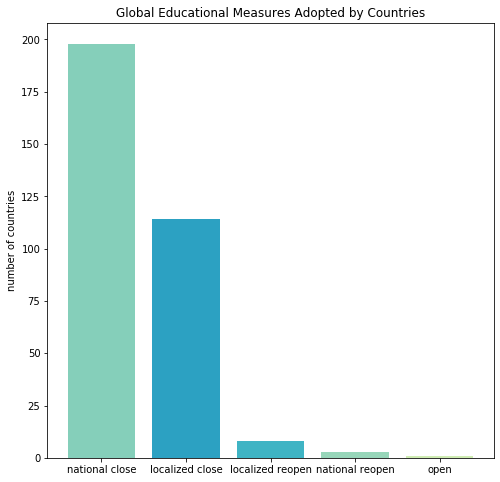

In [422]:
from matplotlib import cm
import random
measure_count=[]
tags=tuple(edu_by_measure.keys())
for key in tags:
    measure_count.append(len(edu_by_measure[key].keys()))

ind = np.arange(len(tags))
plt.figure(figsize=(8,8))
my_cmap = cm.get_cmap('YlGnBu')
color=[random.uniform(0.1, 0.6) for i in range(len(tags))]
p1 = plt.bar(ind, measure_count,color=my_cmap(color))
plt.ylabel('number of countries')
plt.title('Global Educational Measures Adopted by Countries')
plt.xticks(ind, tags)
plt.show() 


# visualization of cases/deaths curves and educational measures

In [425]:
def draw_edu_graph_for_country(country_iso):
    date= who_dict[country_iso]['Date_reported']
    ind = np.arange(len(who_dict[country_iso]['Date_reported']))

    series_tag=['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']
    for i in range(len(series_tag)):
        plt.figure(figsize=(48,8))
        series=series_tag[i]
        maxv=who_dict[country_iso][series].max()
        data=who_dict[country_iso][series]
        plt.step(ind, data,label=series.replace("_"," ").lower())
        for key in edu_by_country[iso_dict[country_iso][0]]:
            if key=='national close':
                line='r-'
            elif key == "localized close":
                line='g-'
            elif key=='national reopen':
                line='b-'
            elif key == "localized reopen":
                line='c-'
            else:
                line='m-'
            x=[(edu_by_country[iso_dict[country_iso][0]][key]-date[0]).days for i in range(21)]
            y=[i for i in range(0,(maxv//10+1)*10, maxv//20)][:21]
            plt.plot(x,y,line,label=key)
        plt.ylabel('number reported')
        plt.title(series.replace("_"," "))
        plt.xticks(ind,date)
        plt.xticks(rotation=90)
        plt.yticks(np.arange(0, (maxv//10+1)*10, step=maxv//20))
        plt.legend(loc='upper right')
        plt.show() 



United States


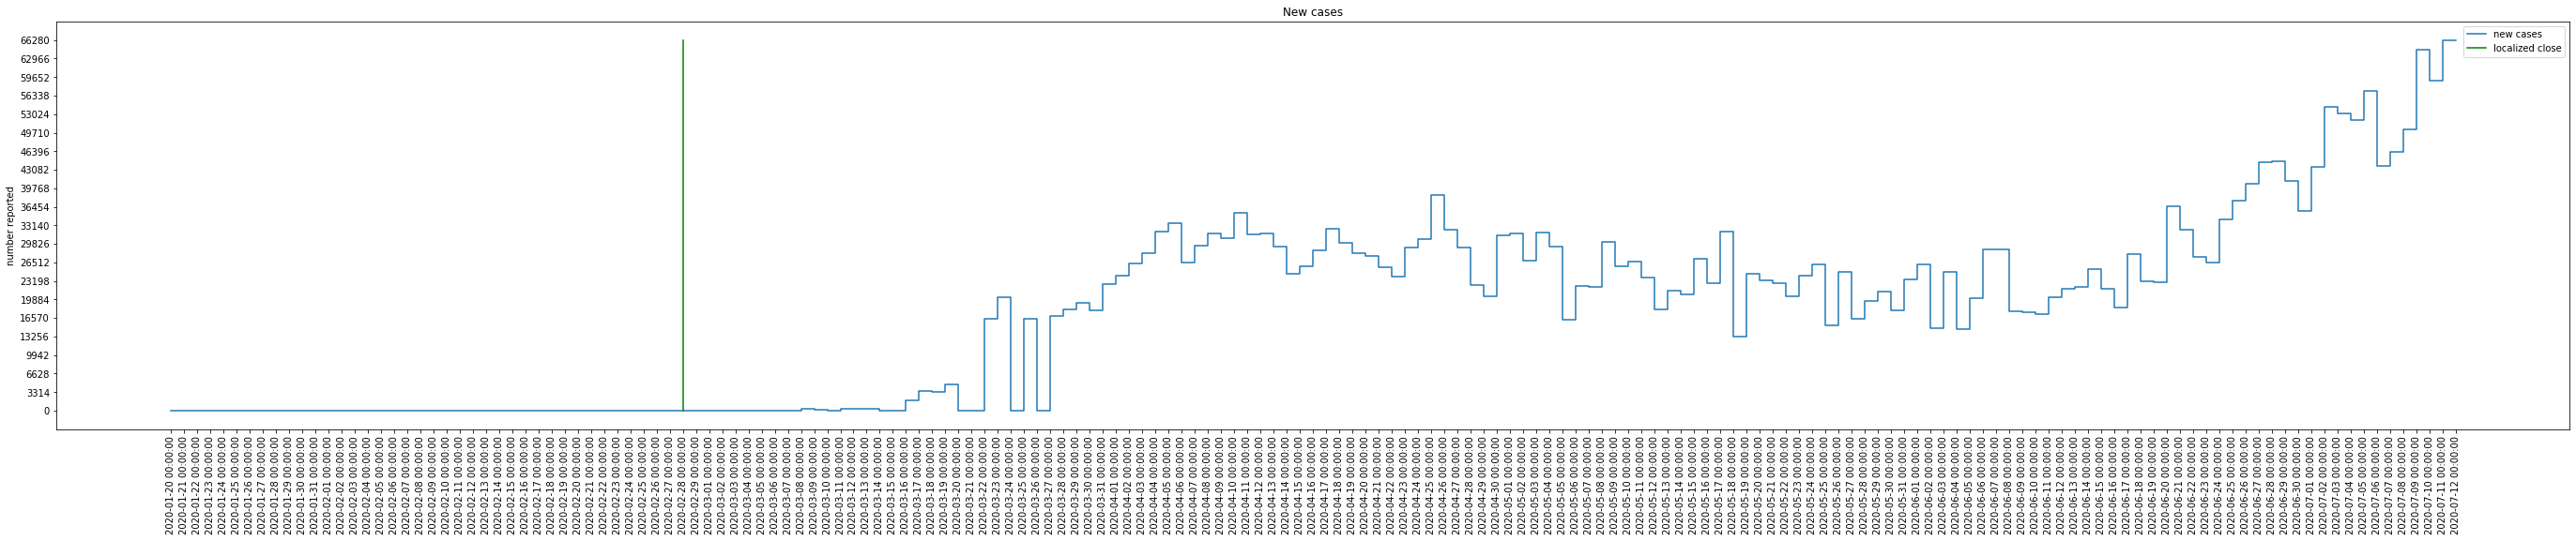

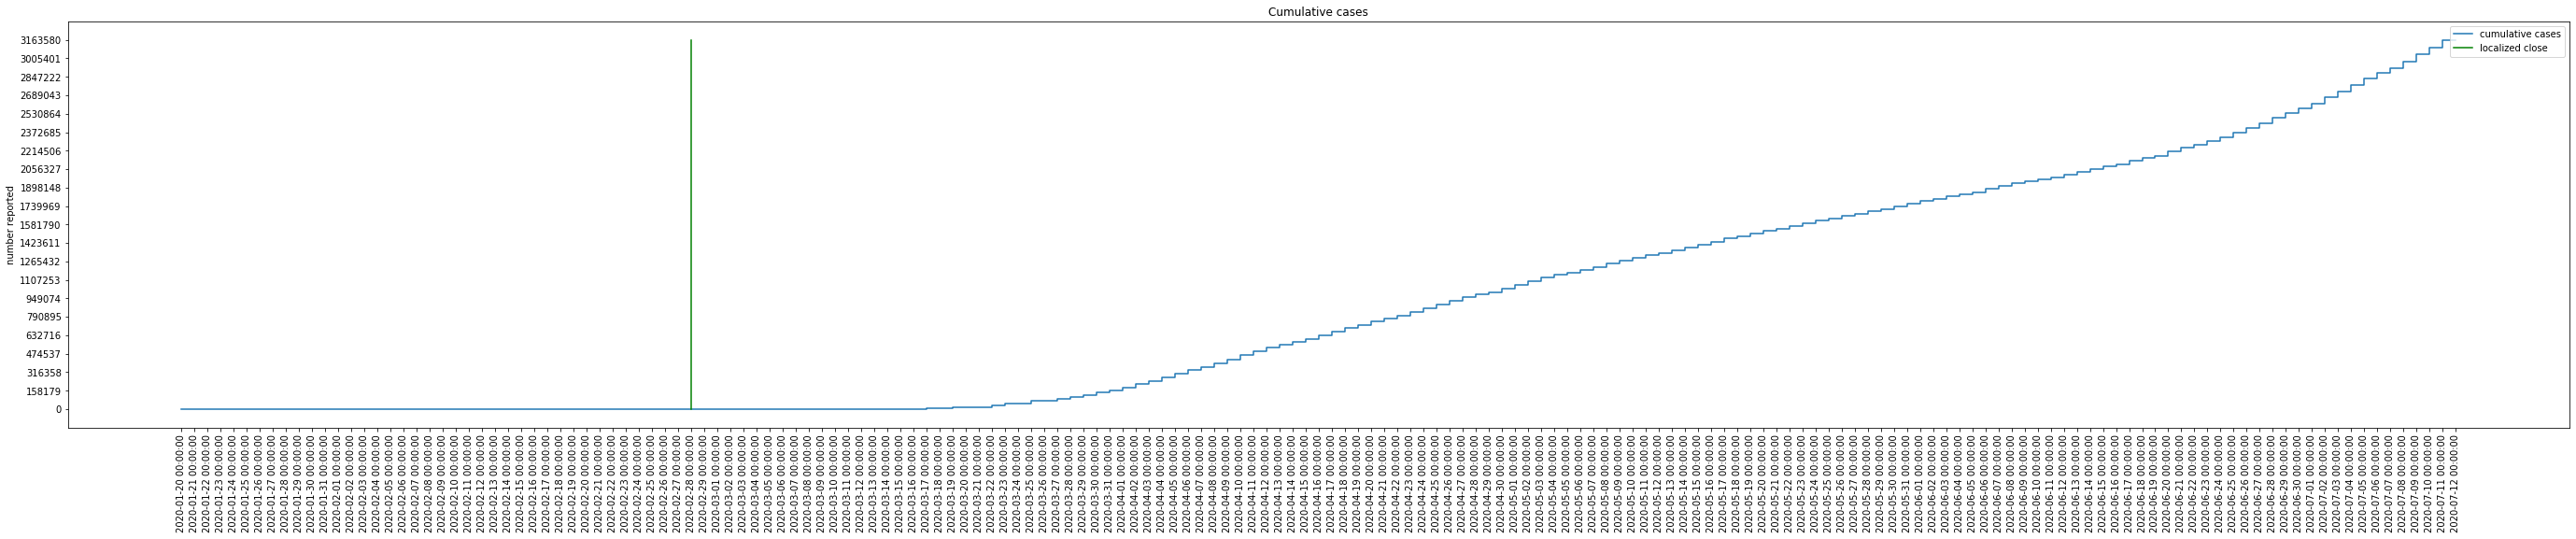

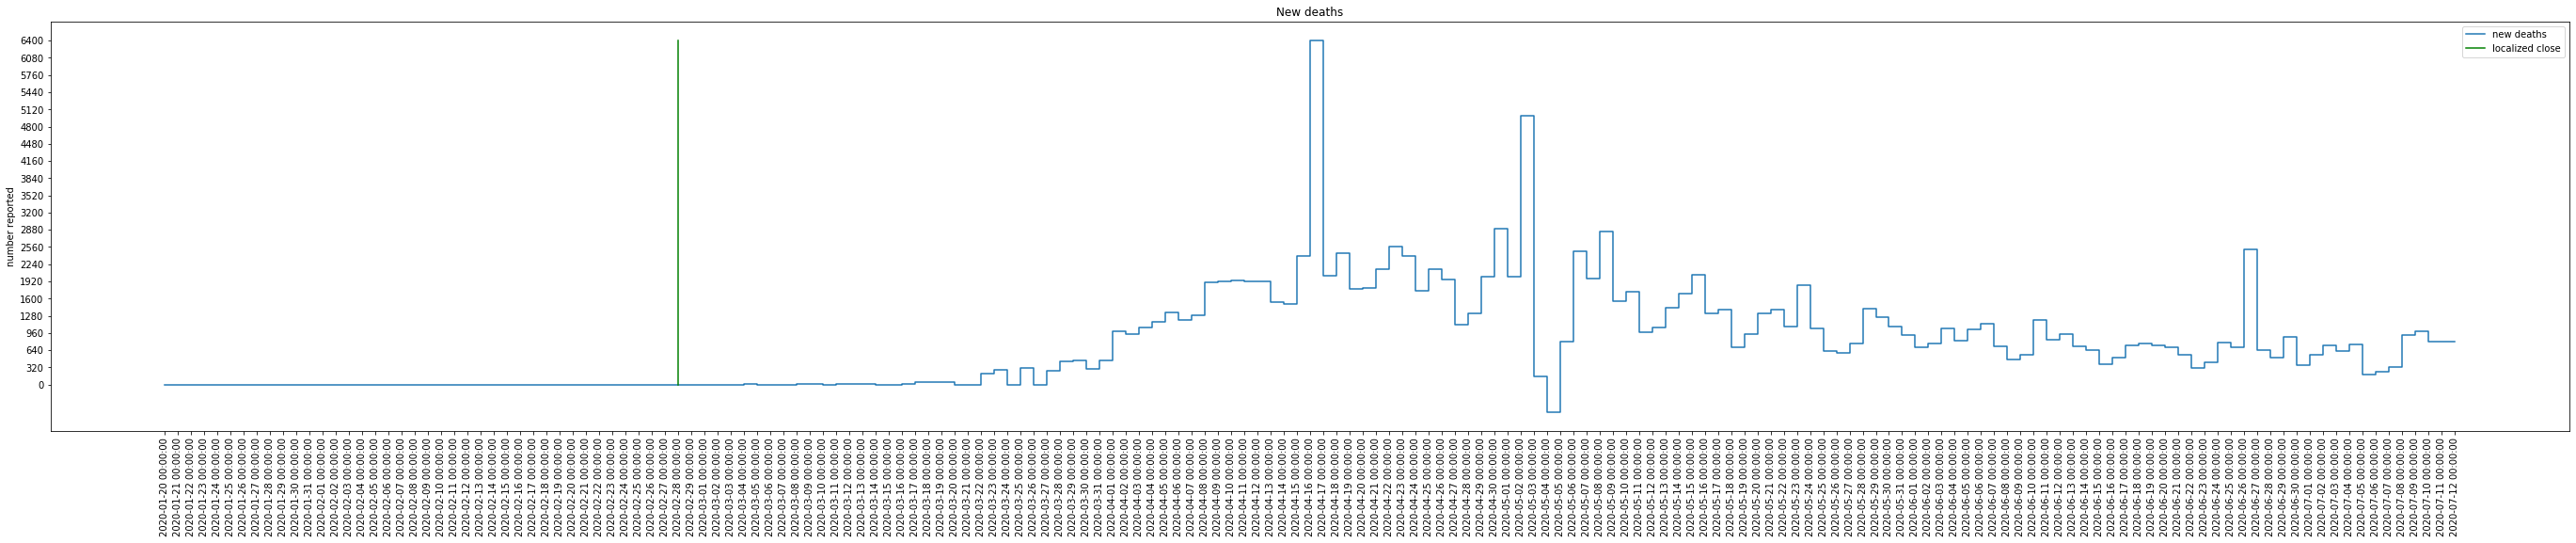

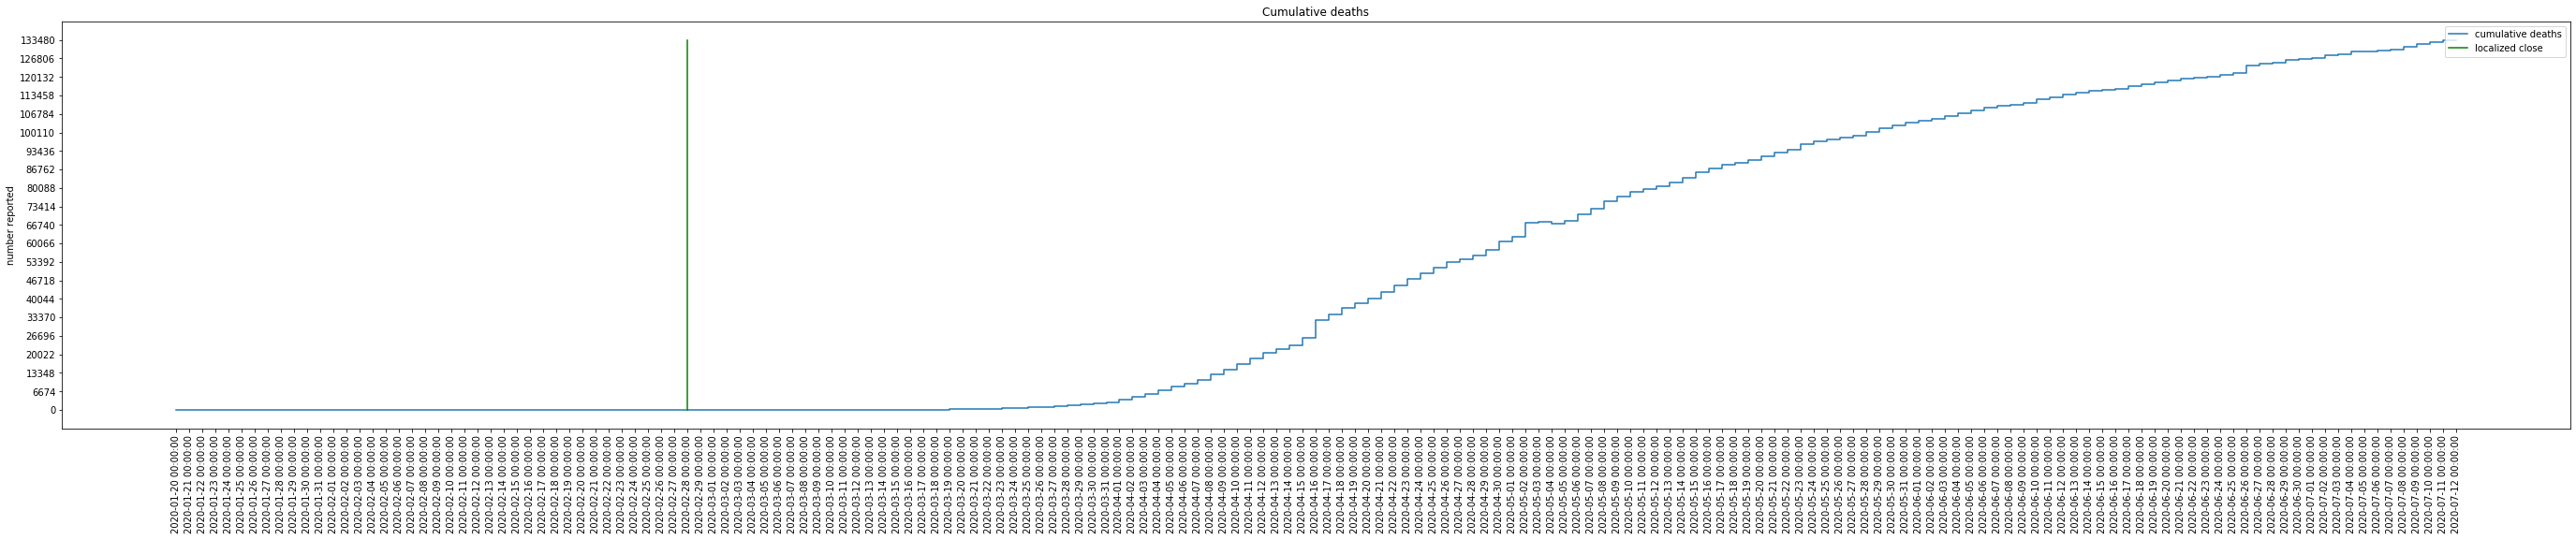

China


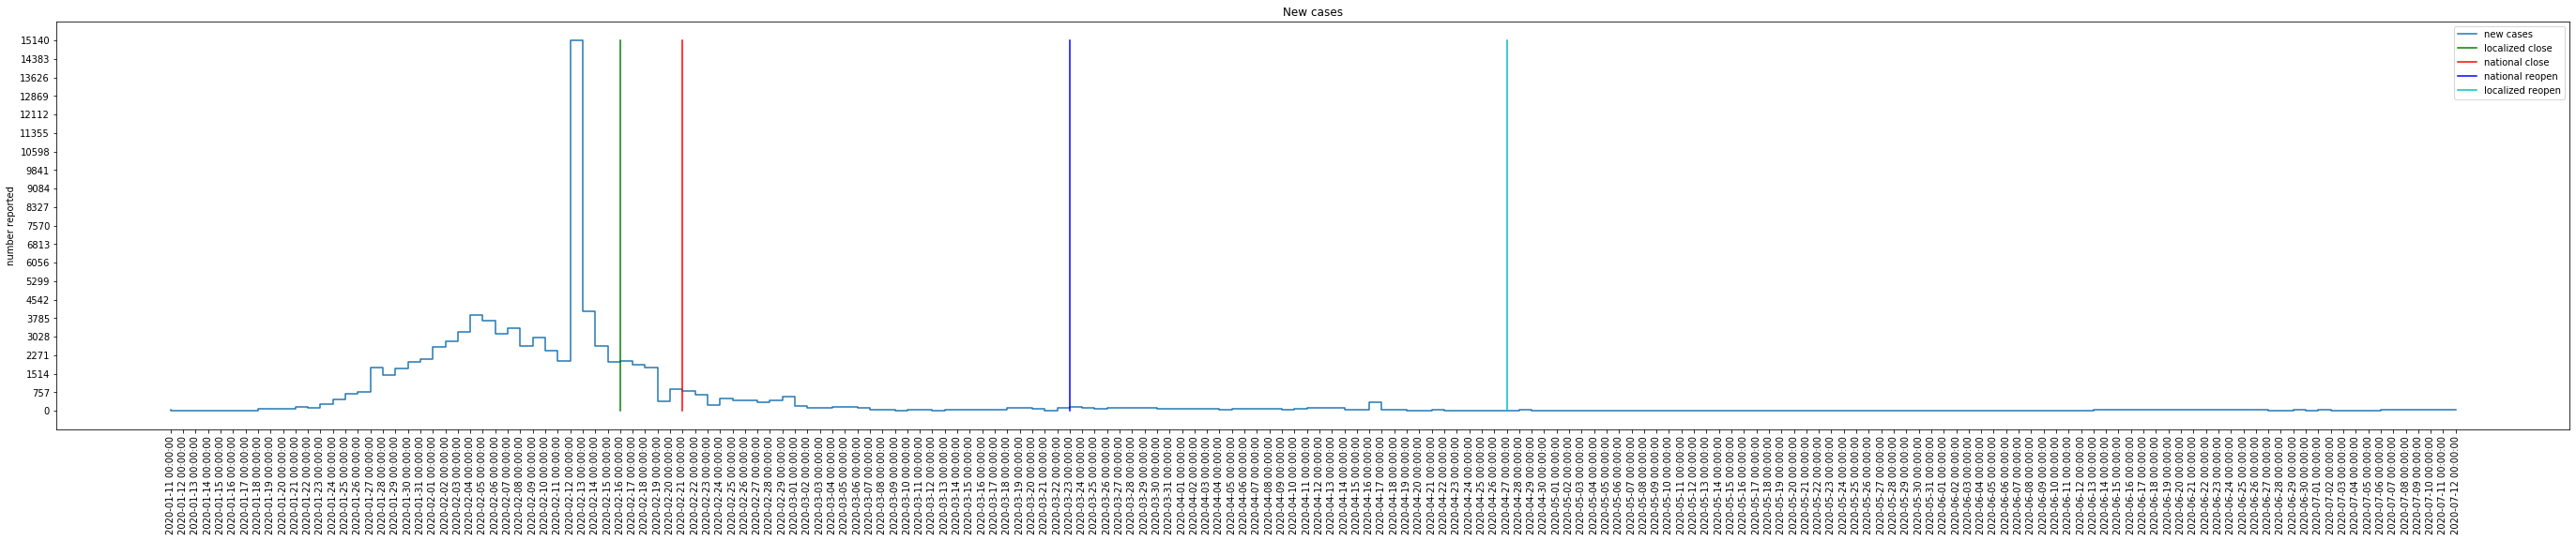

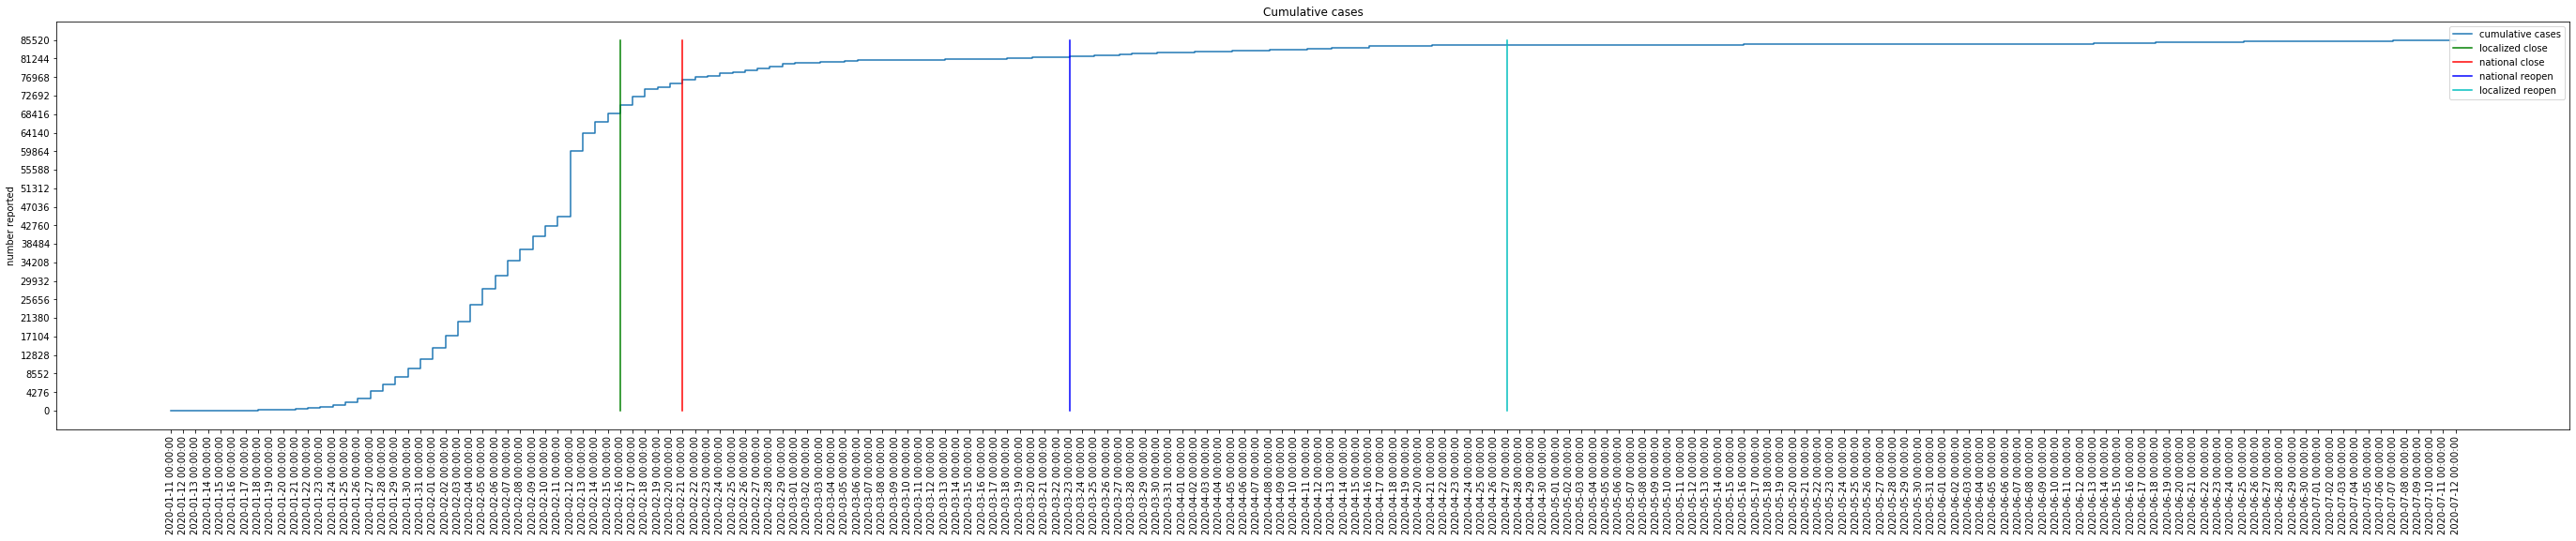

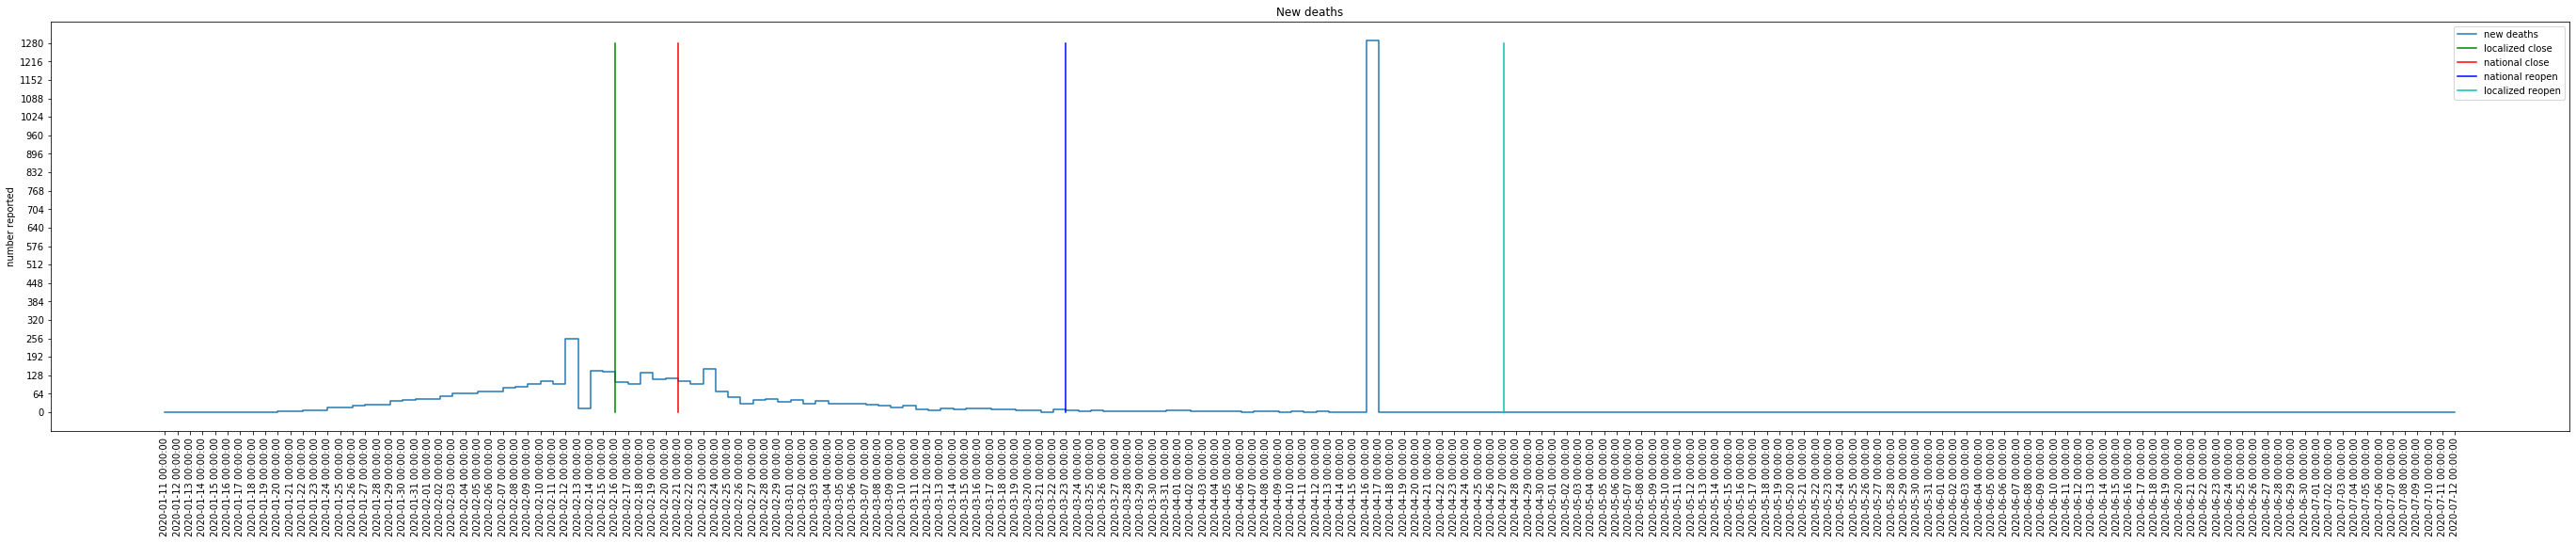

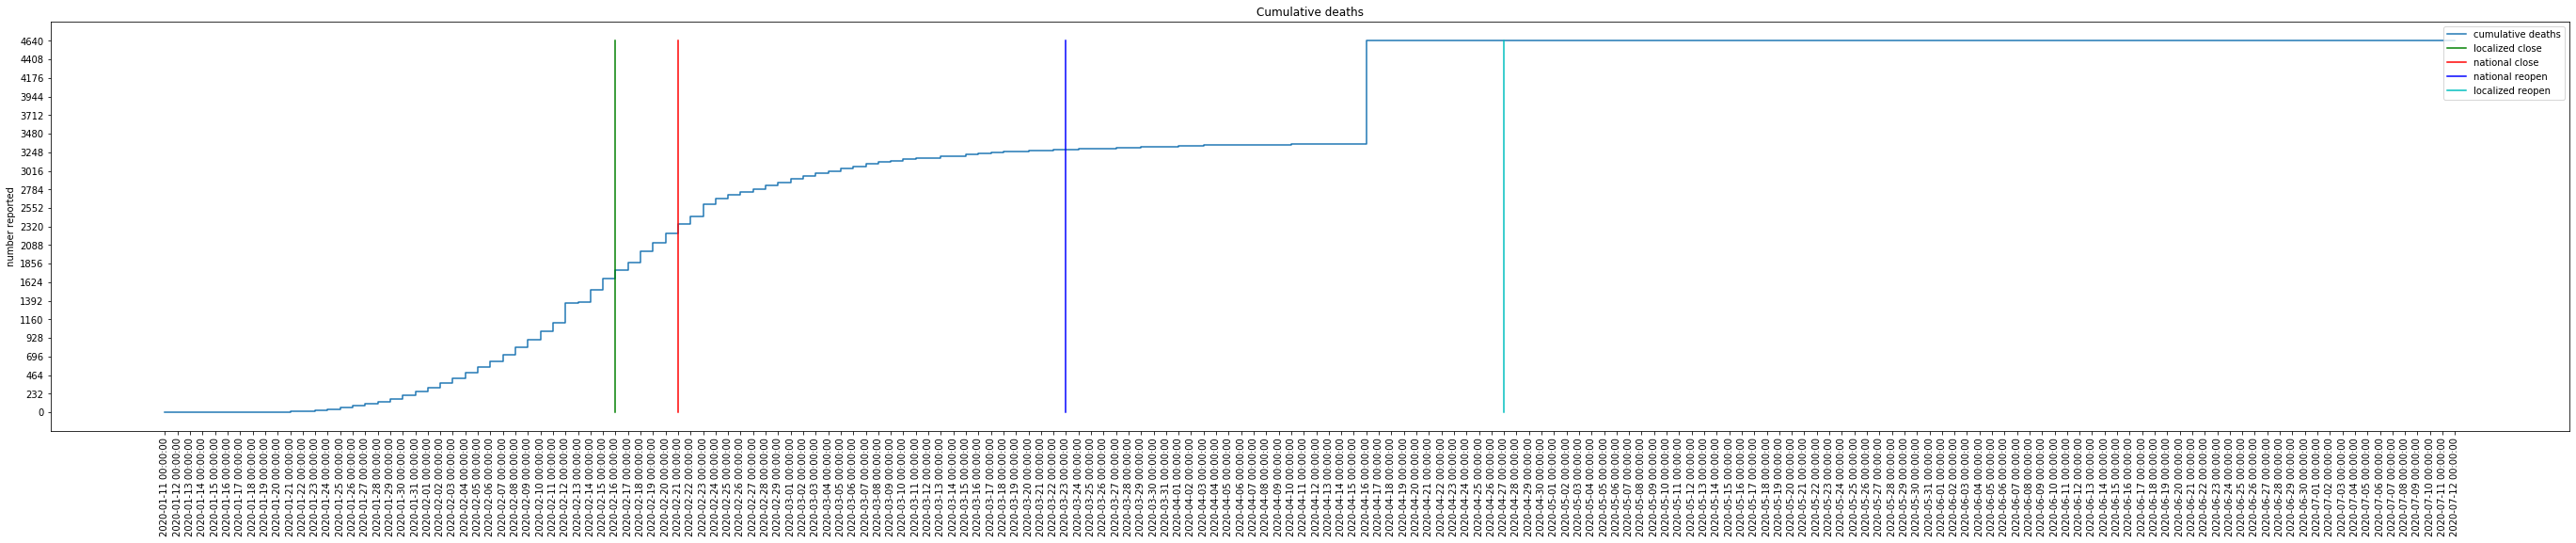

Italy


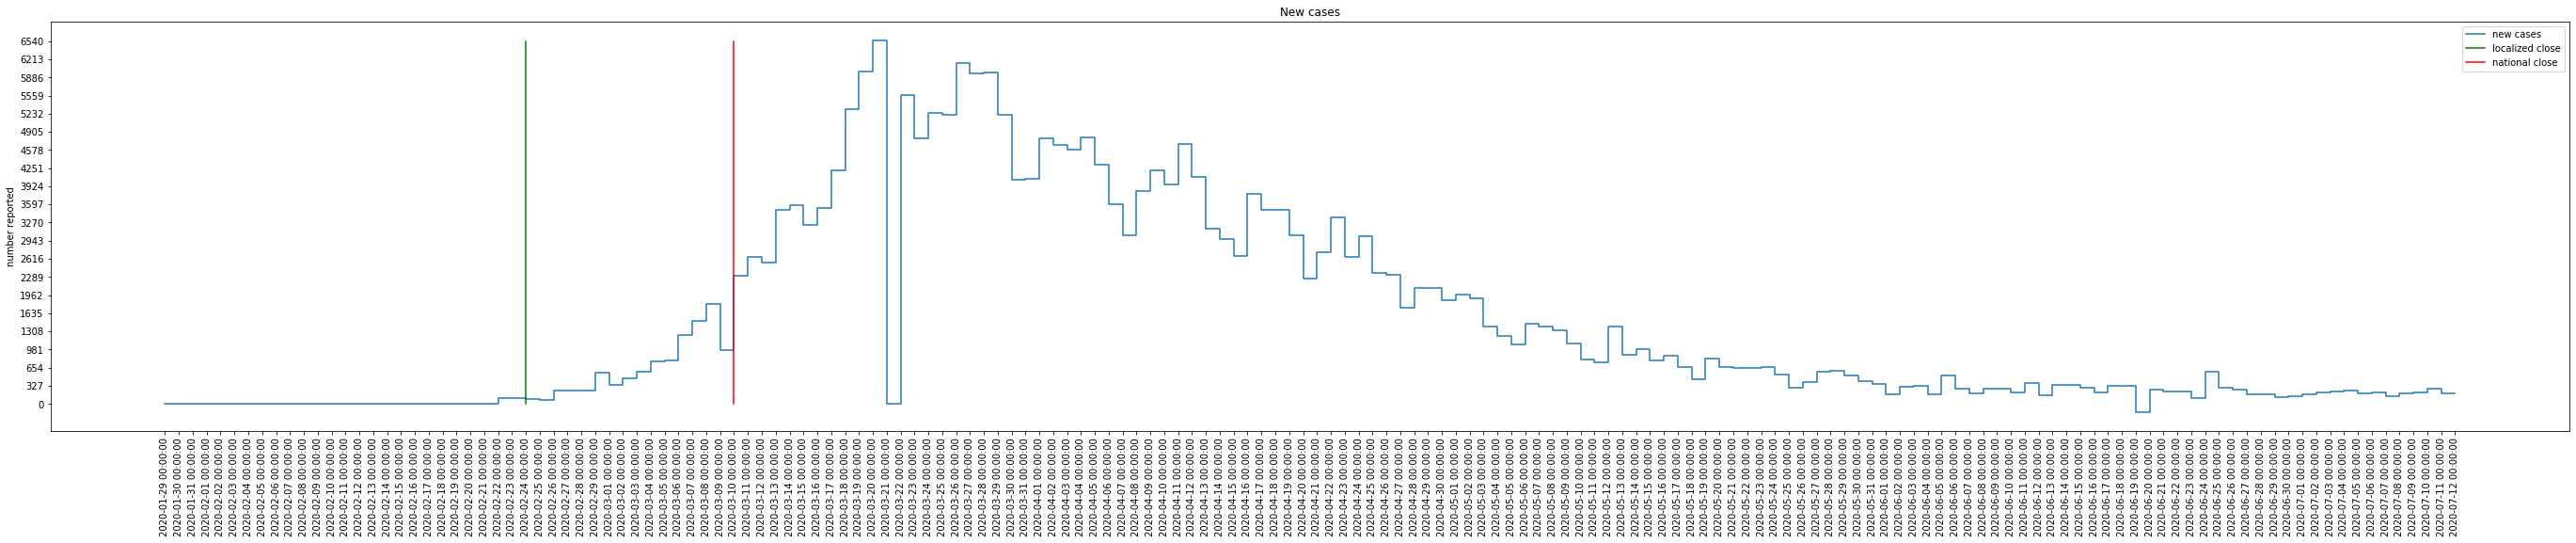

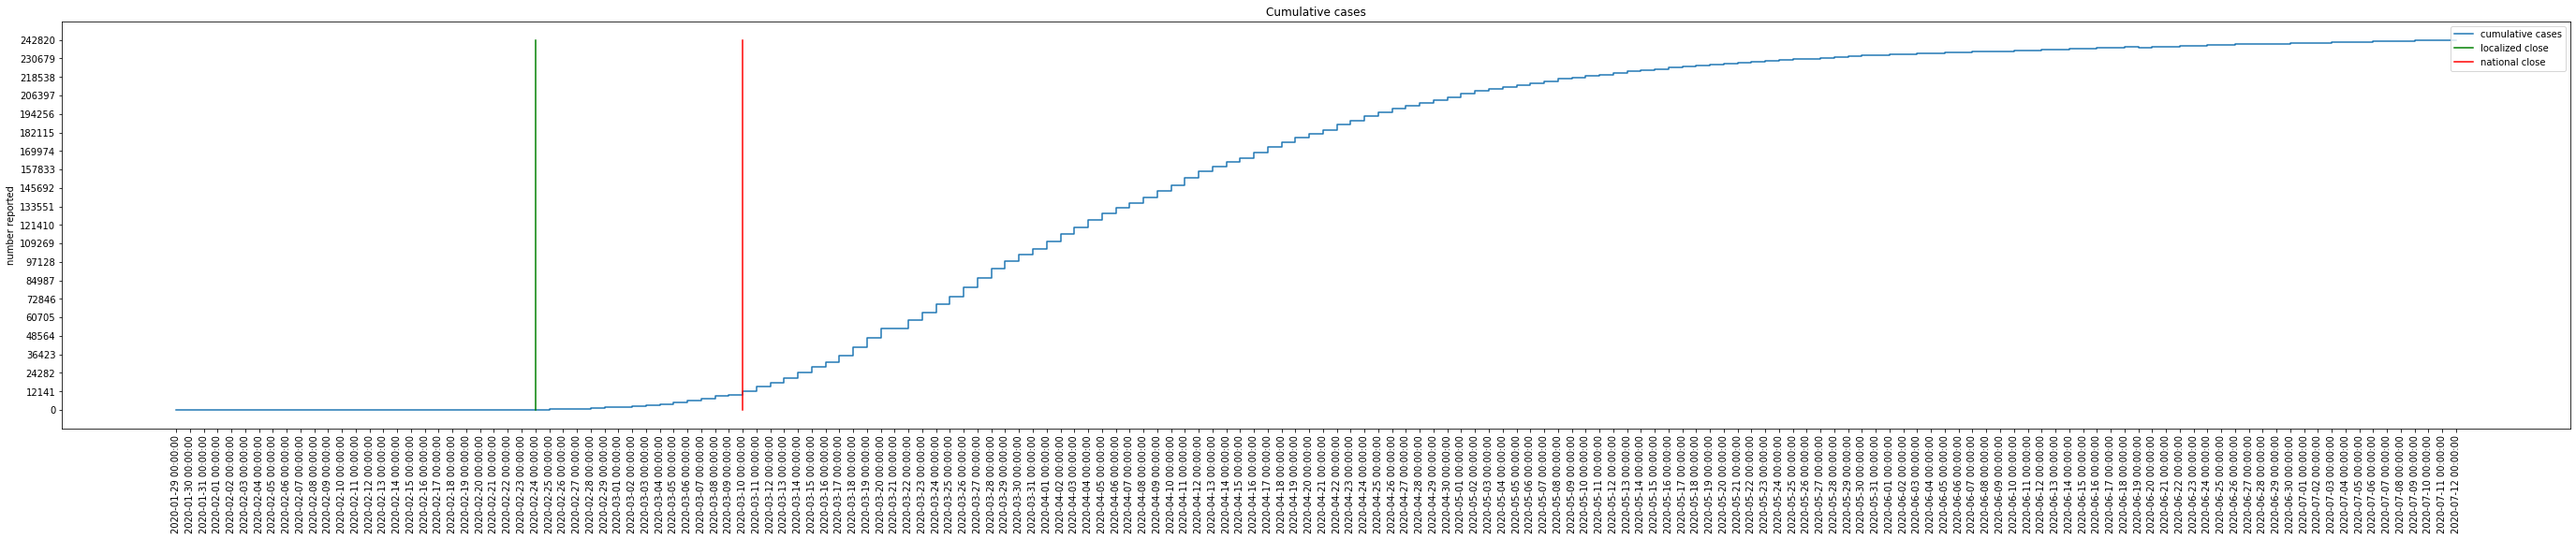

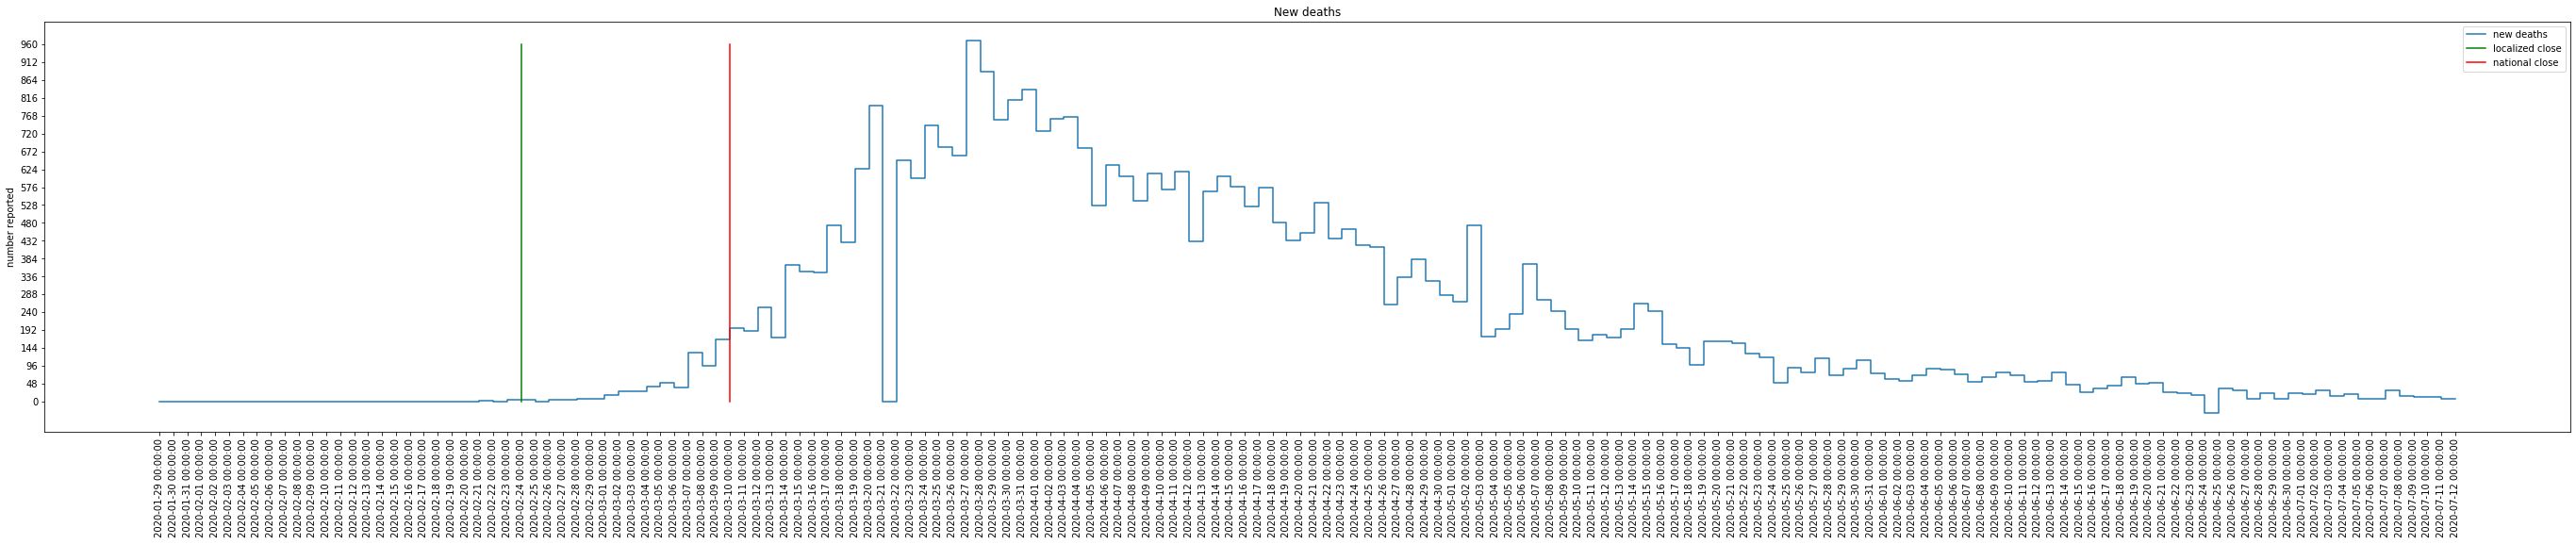

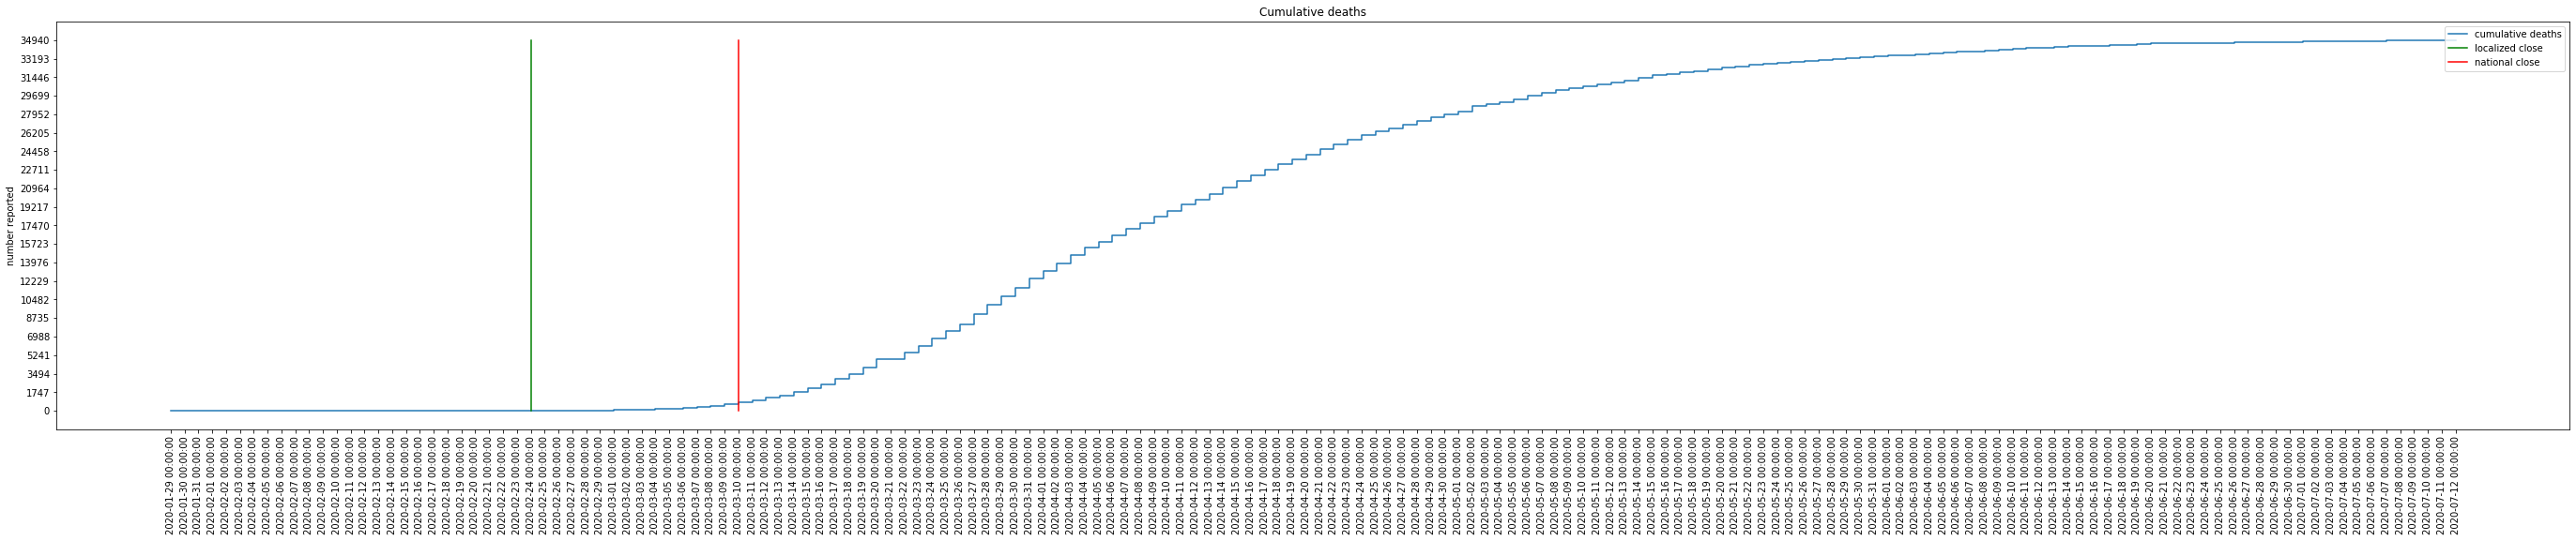

Brazil


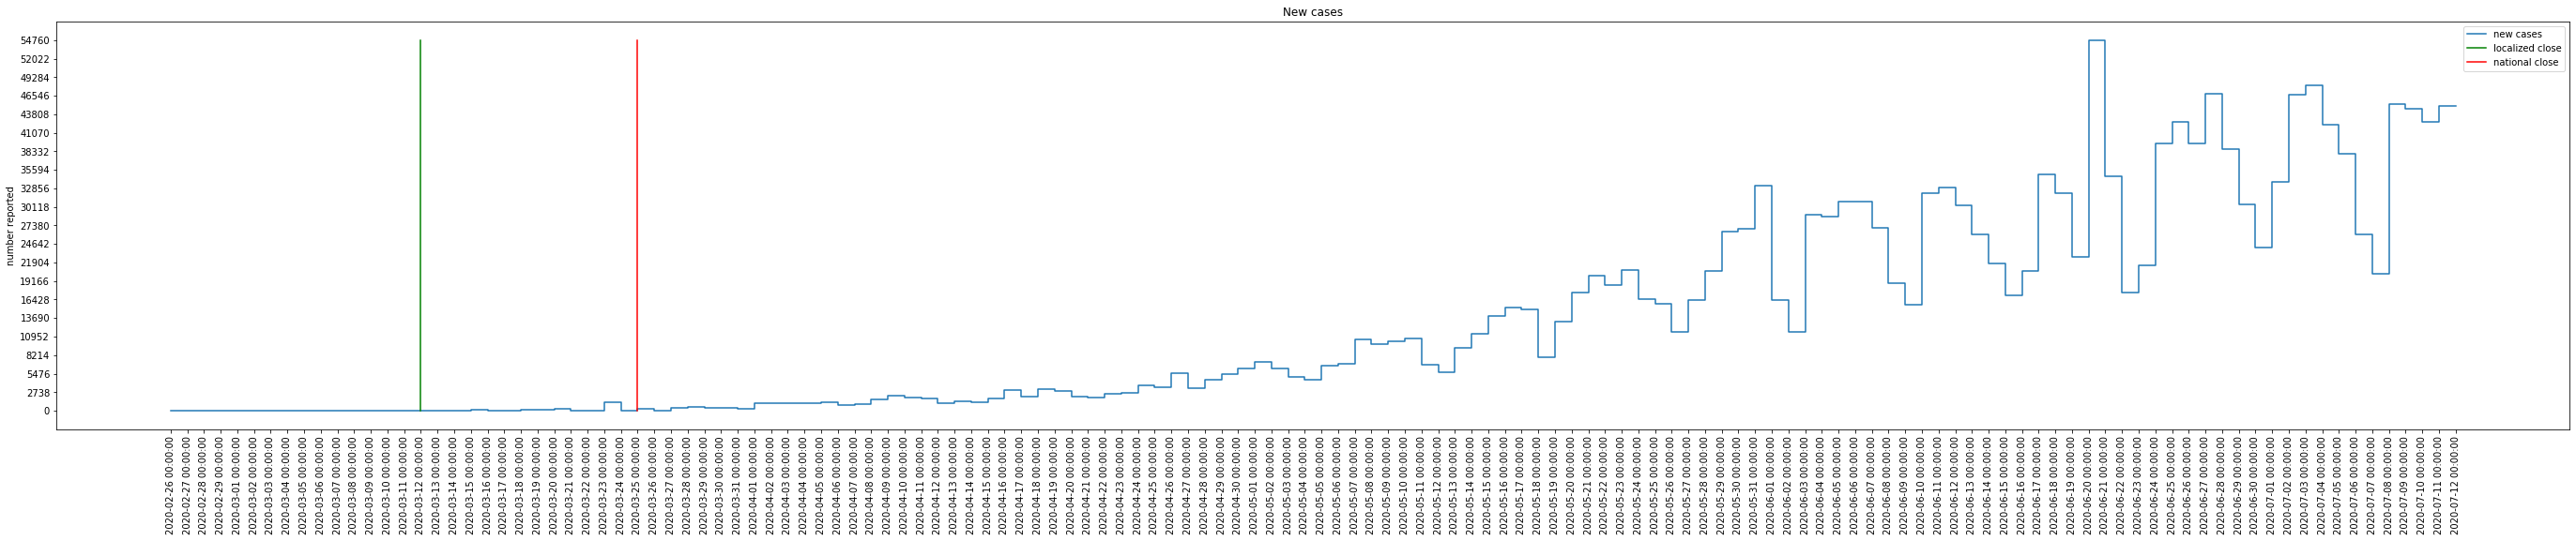

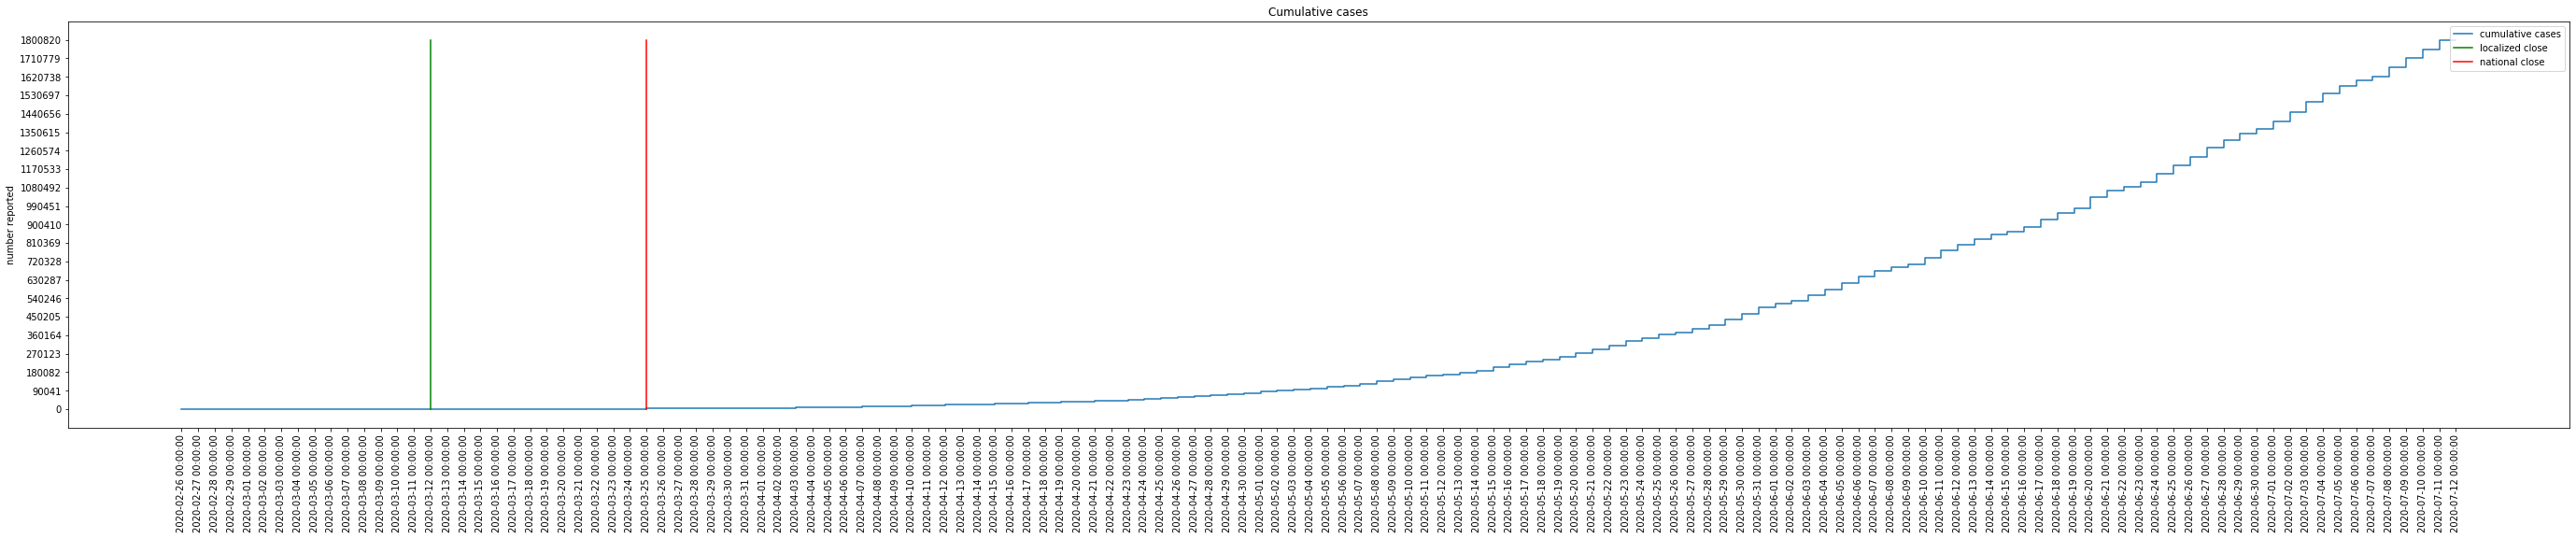

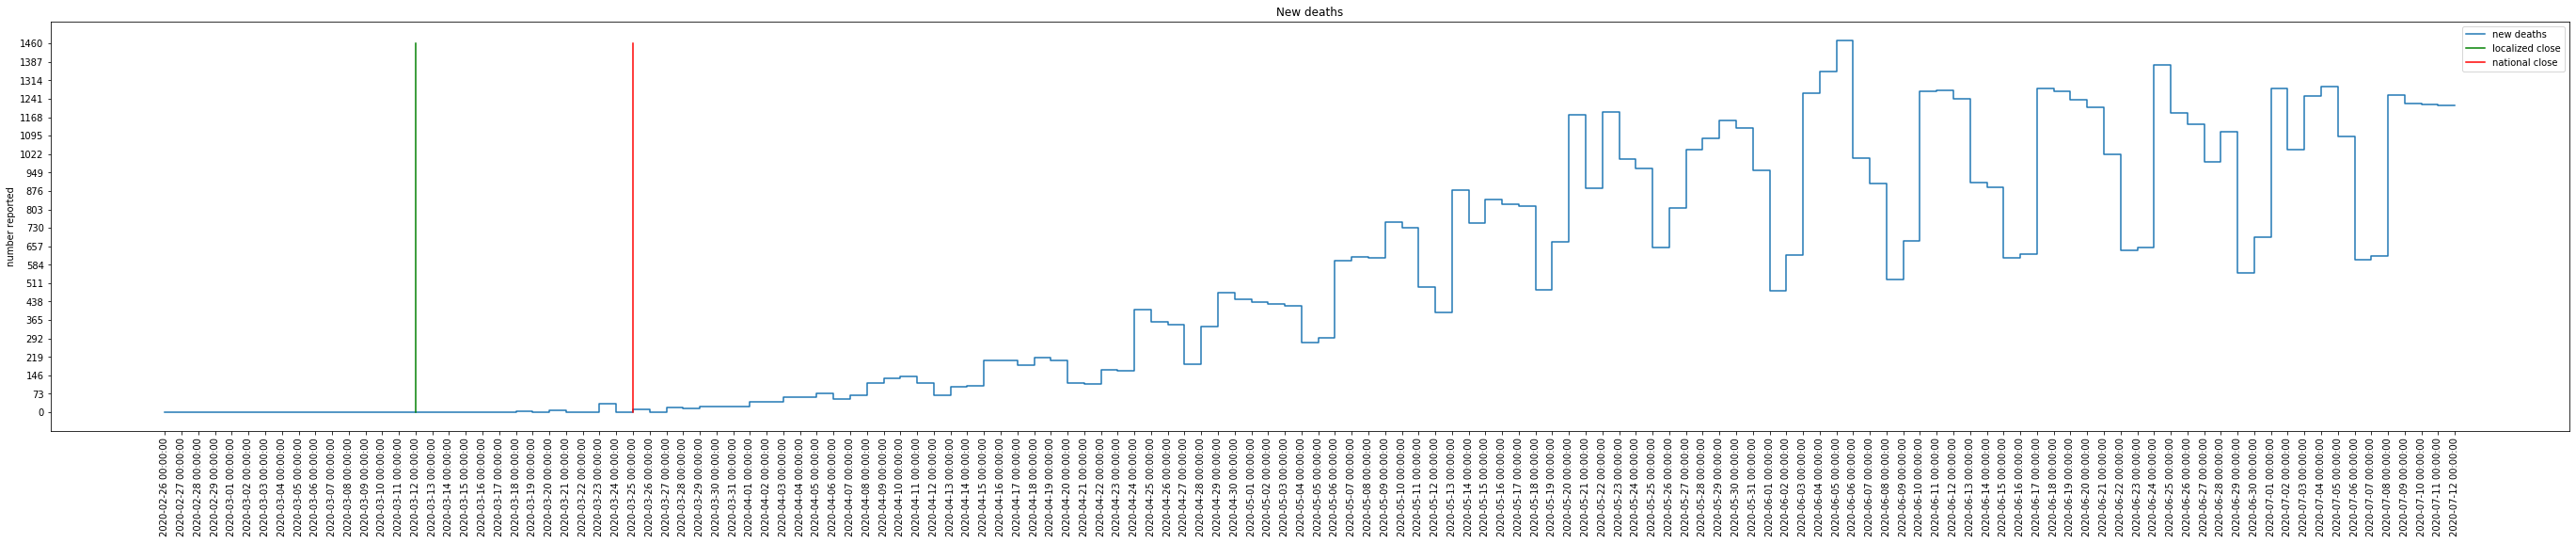

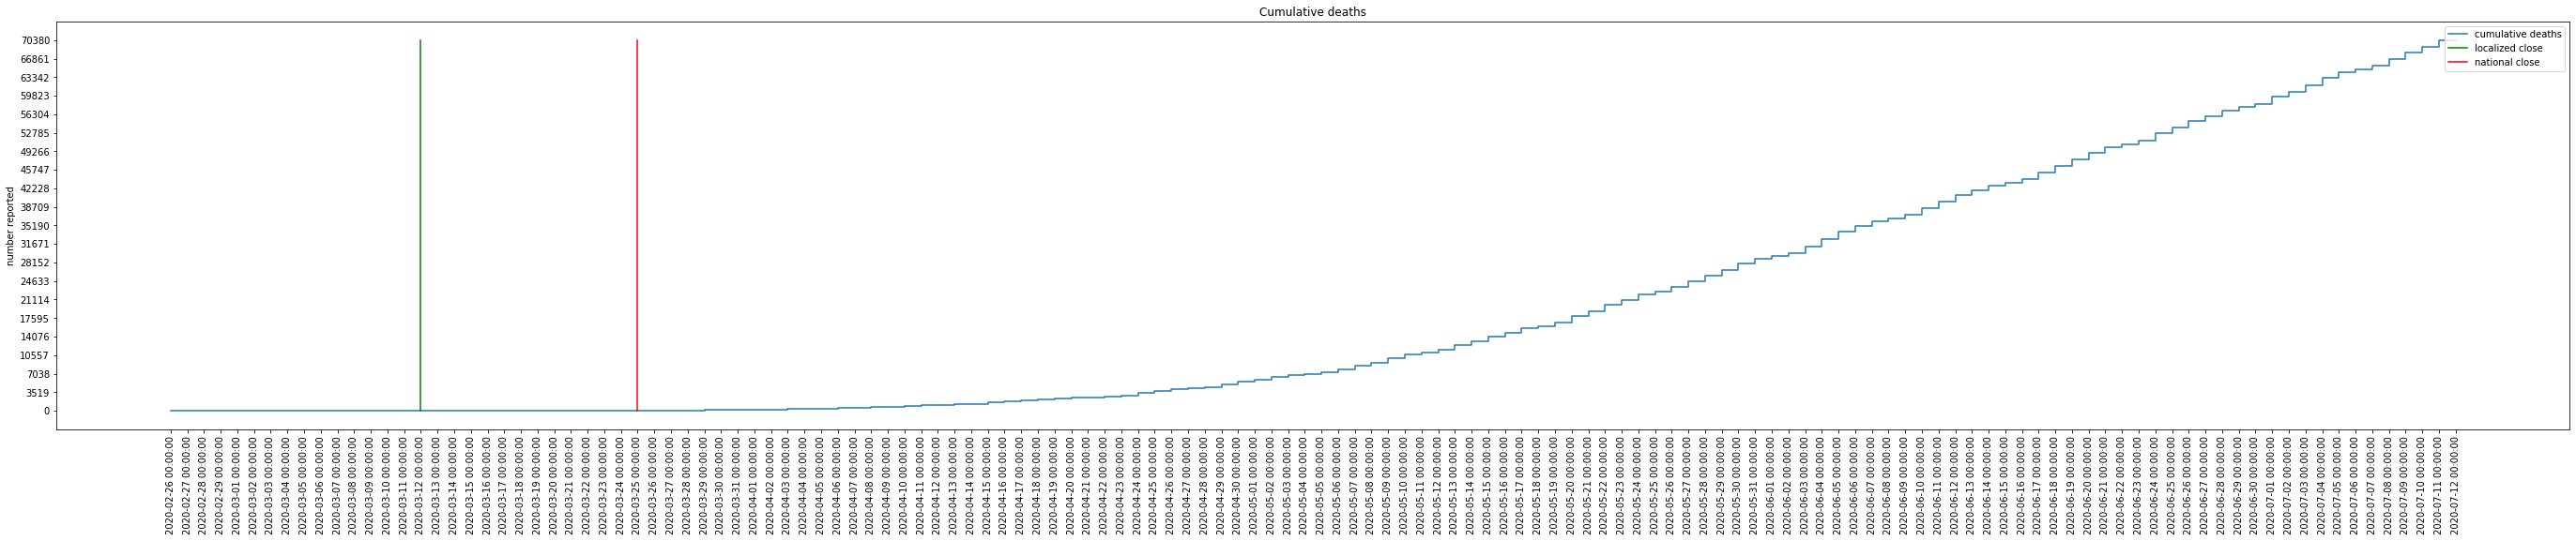

India


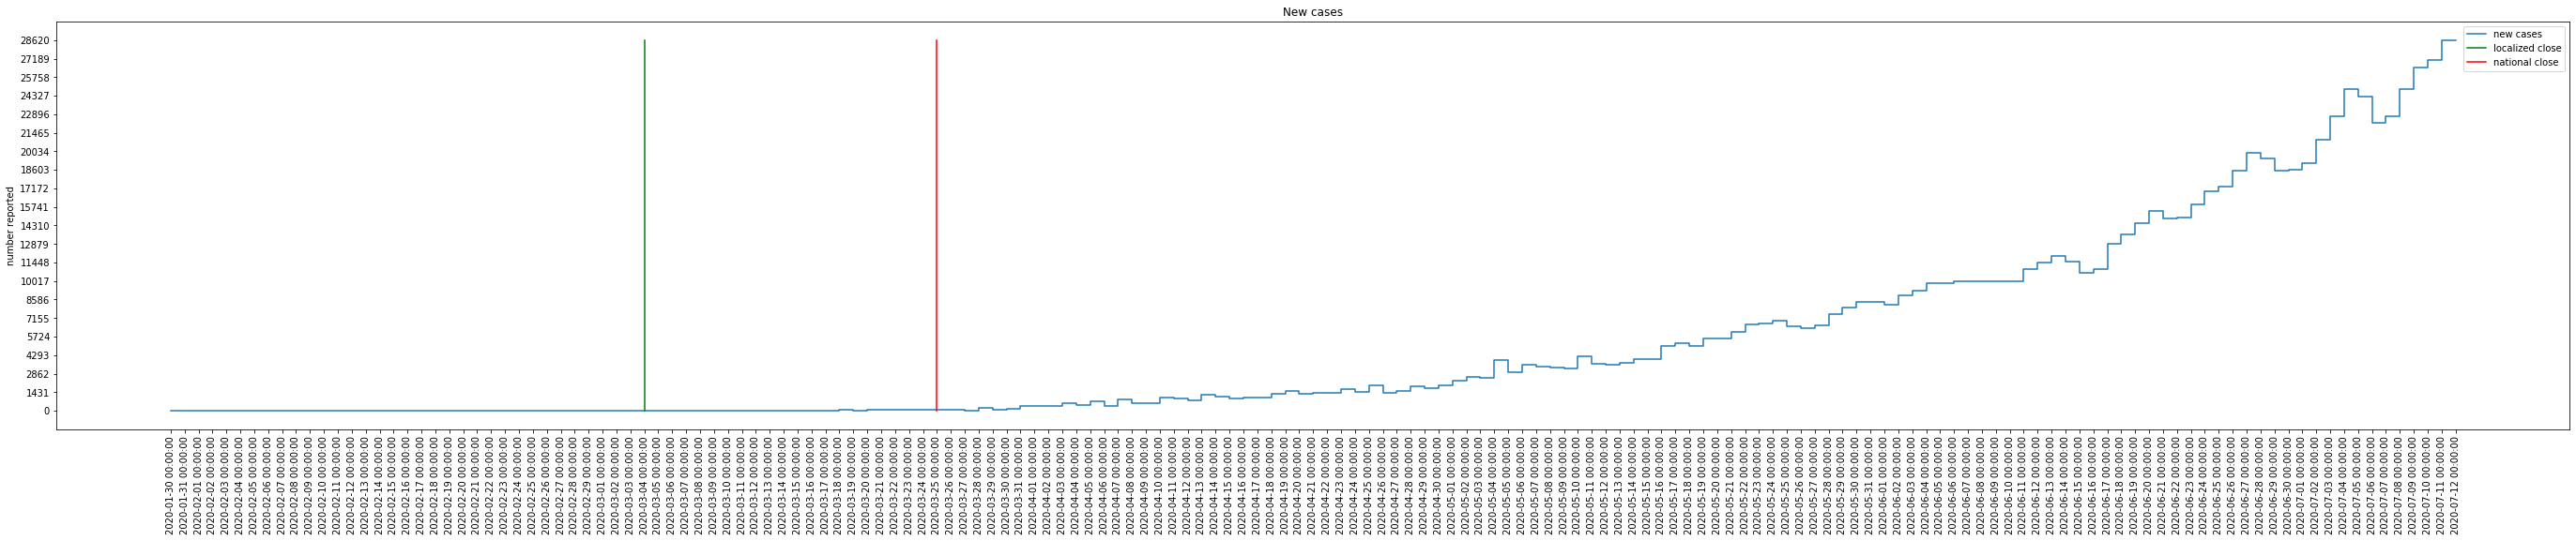

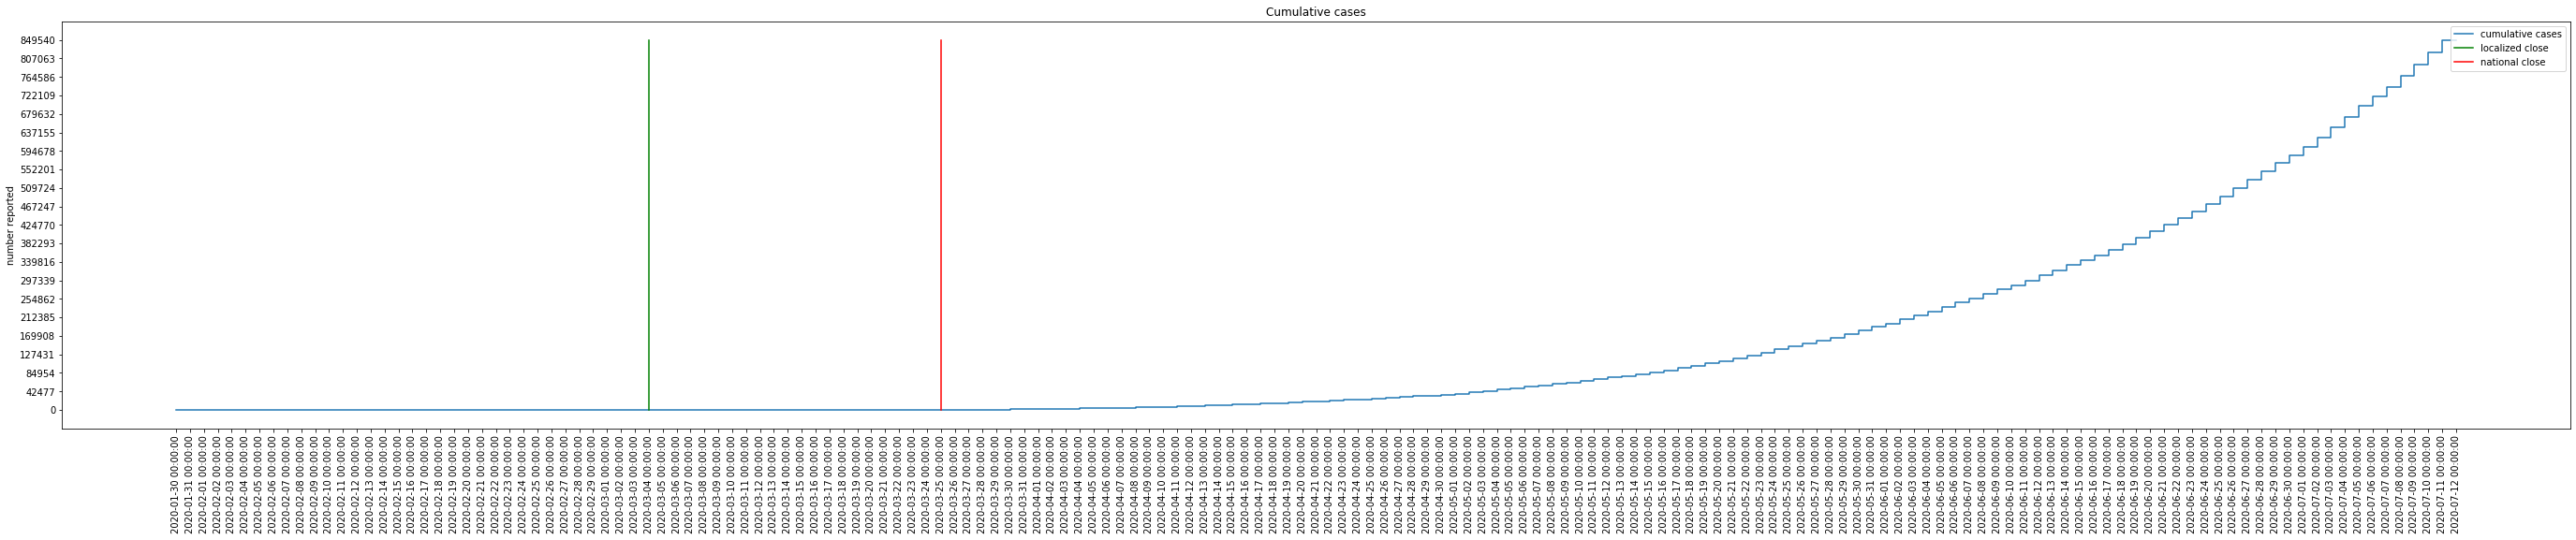

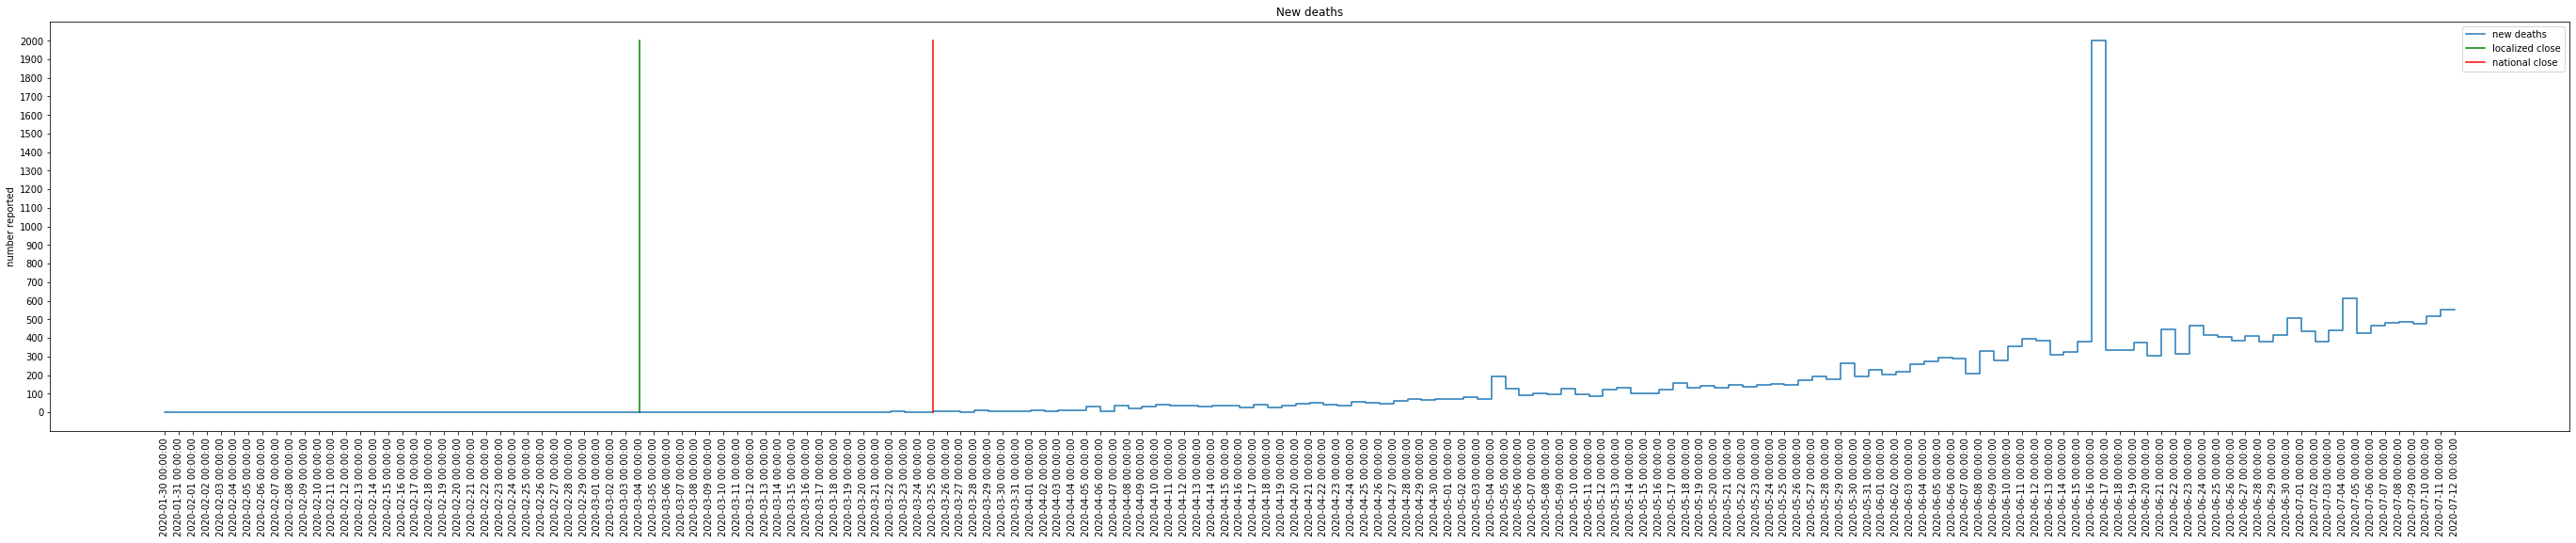

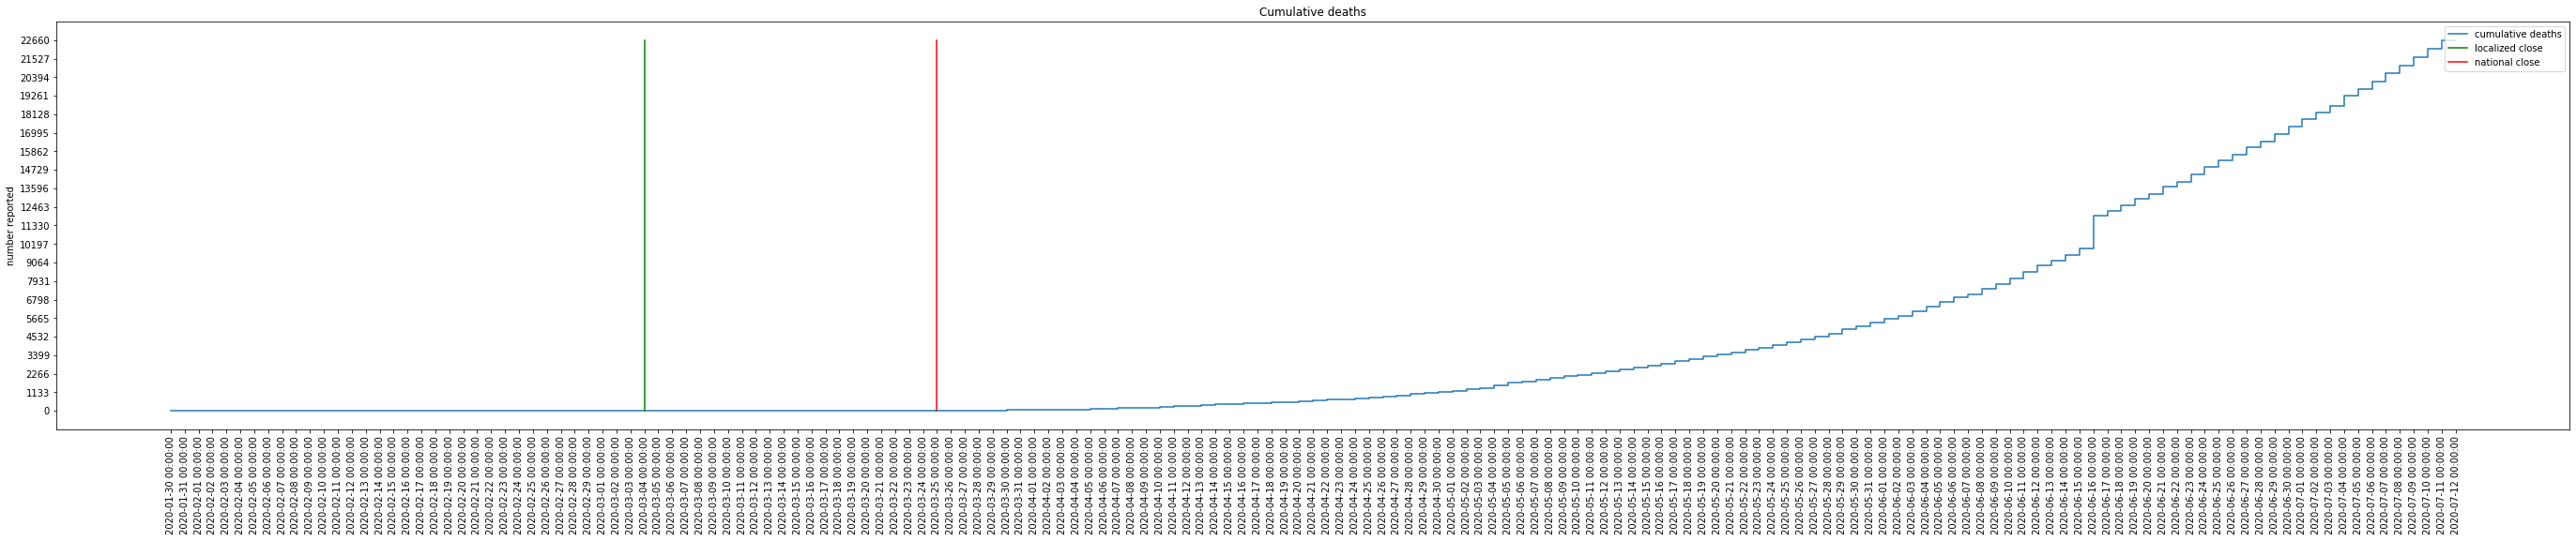

Russia


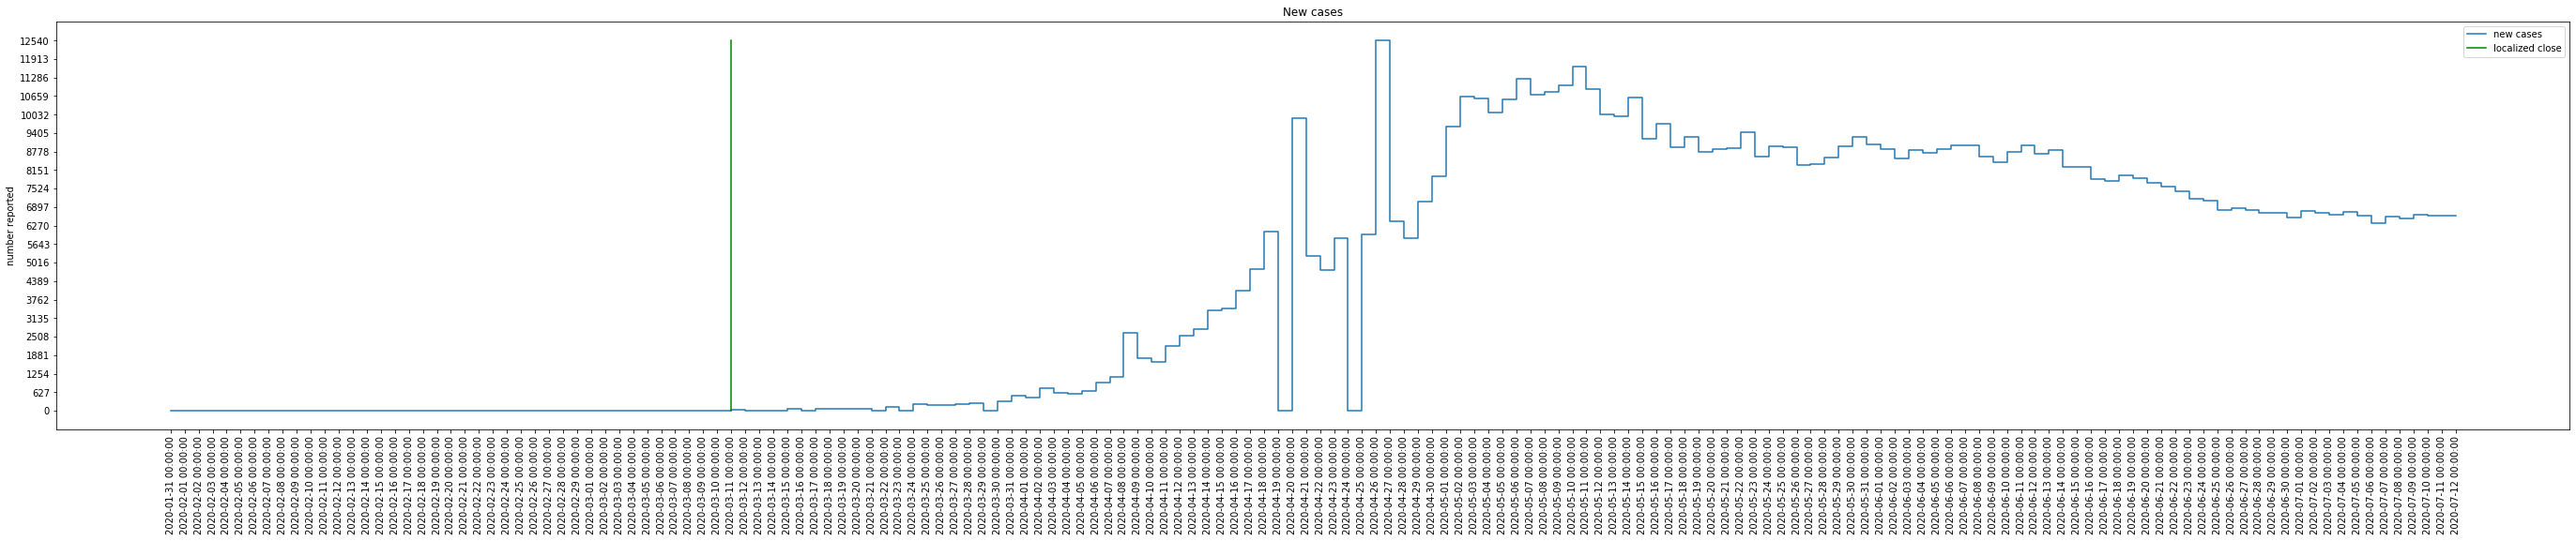

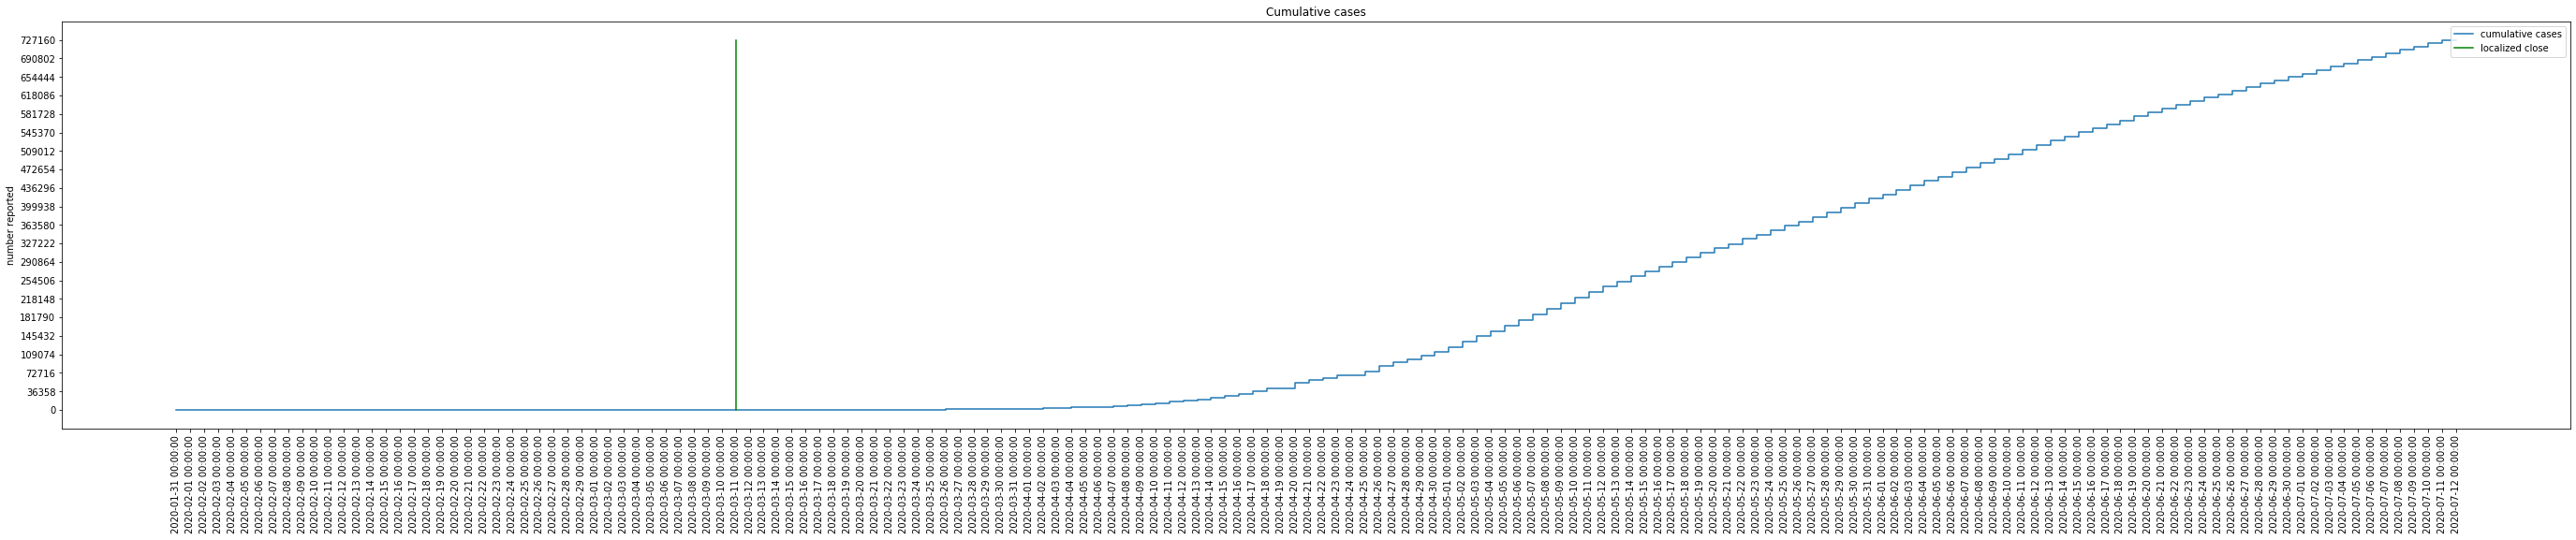

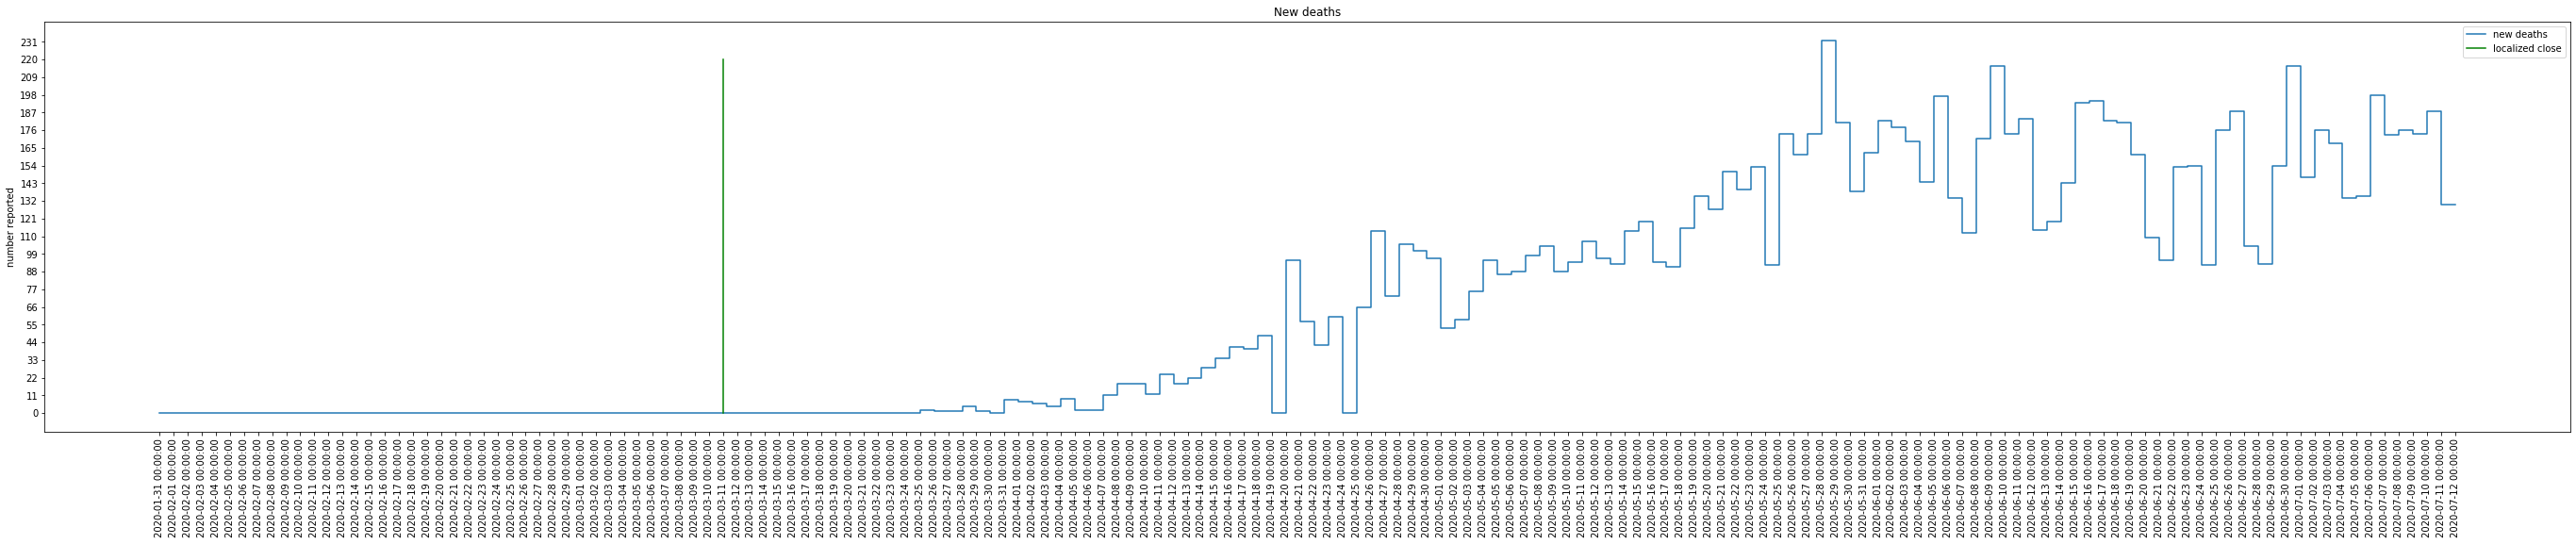

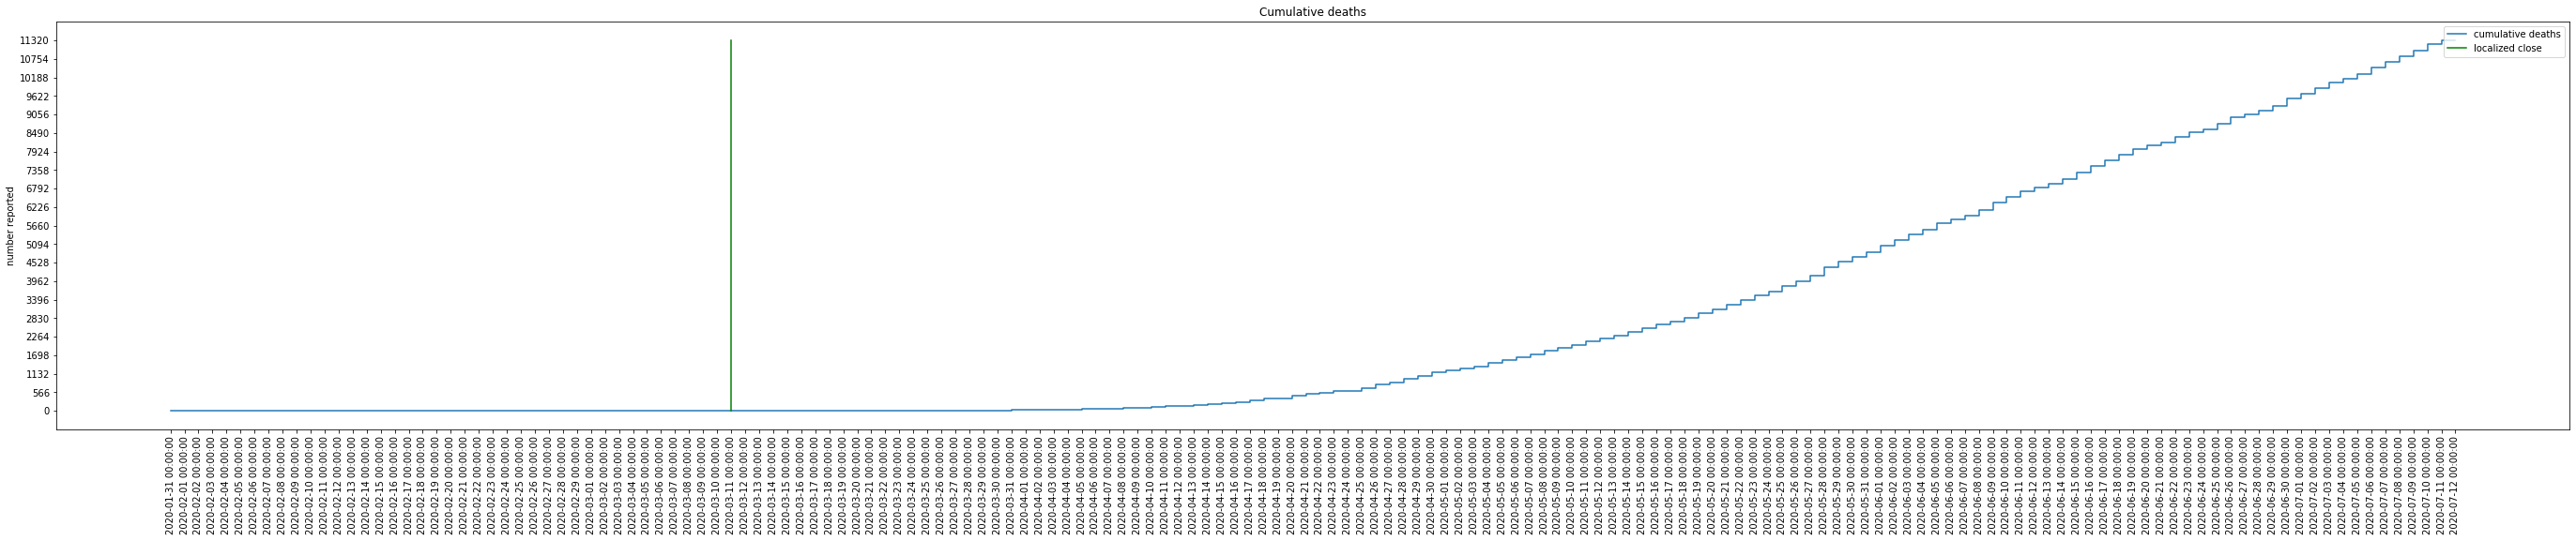

South Africa


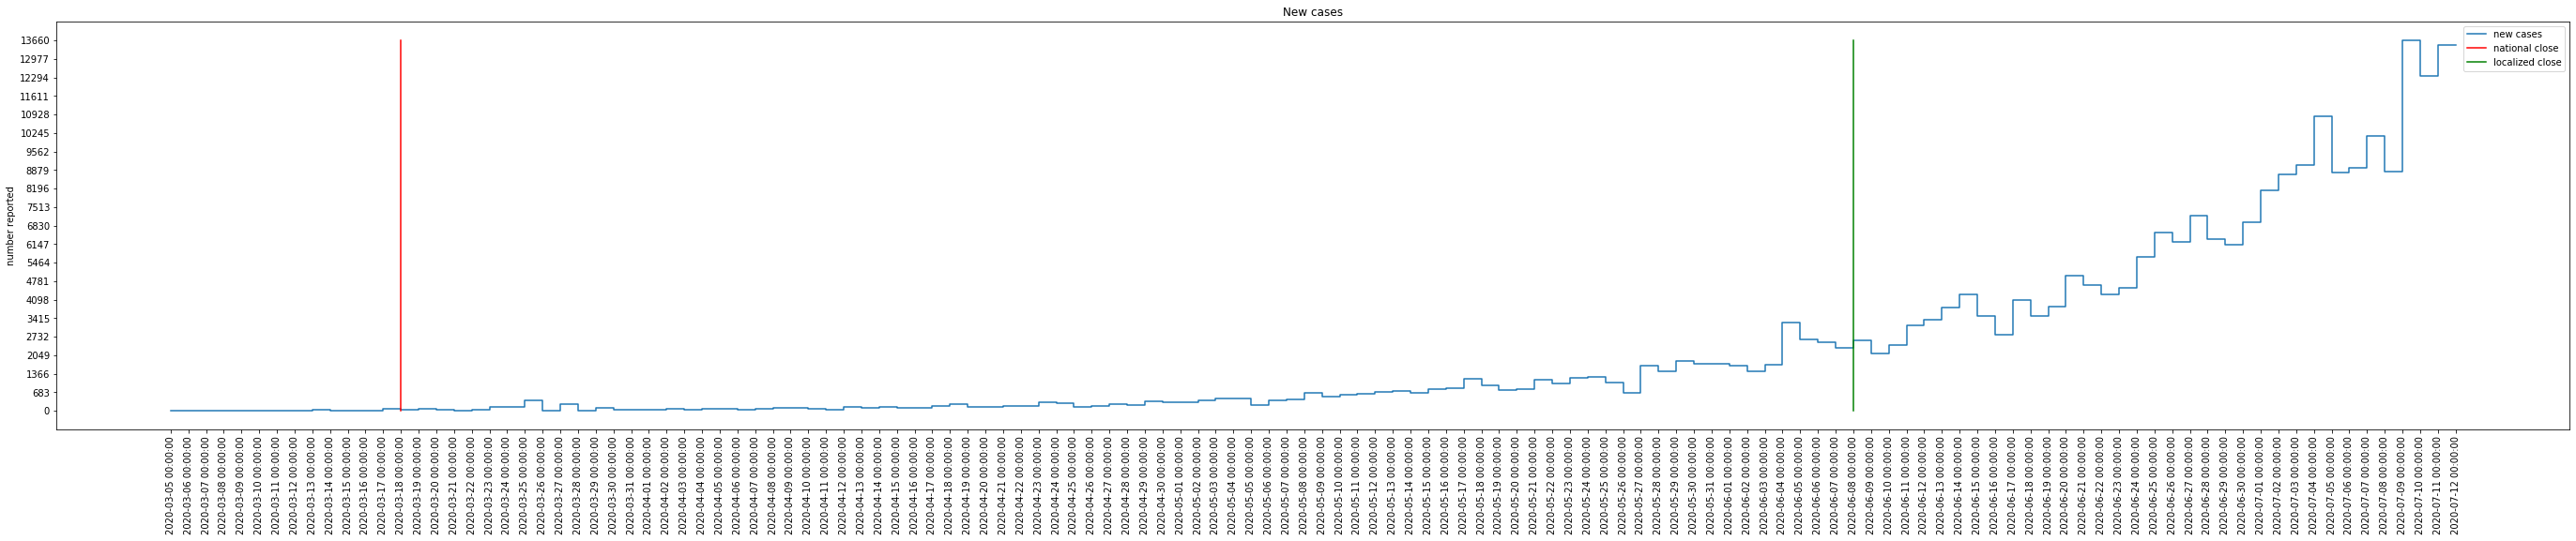

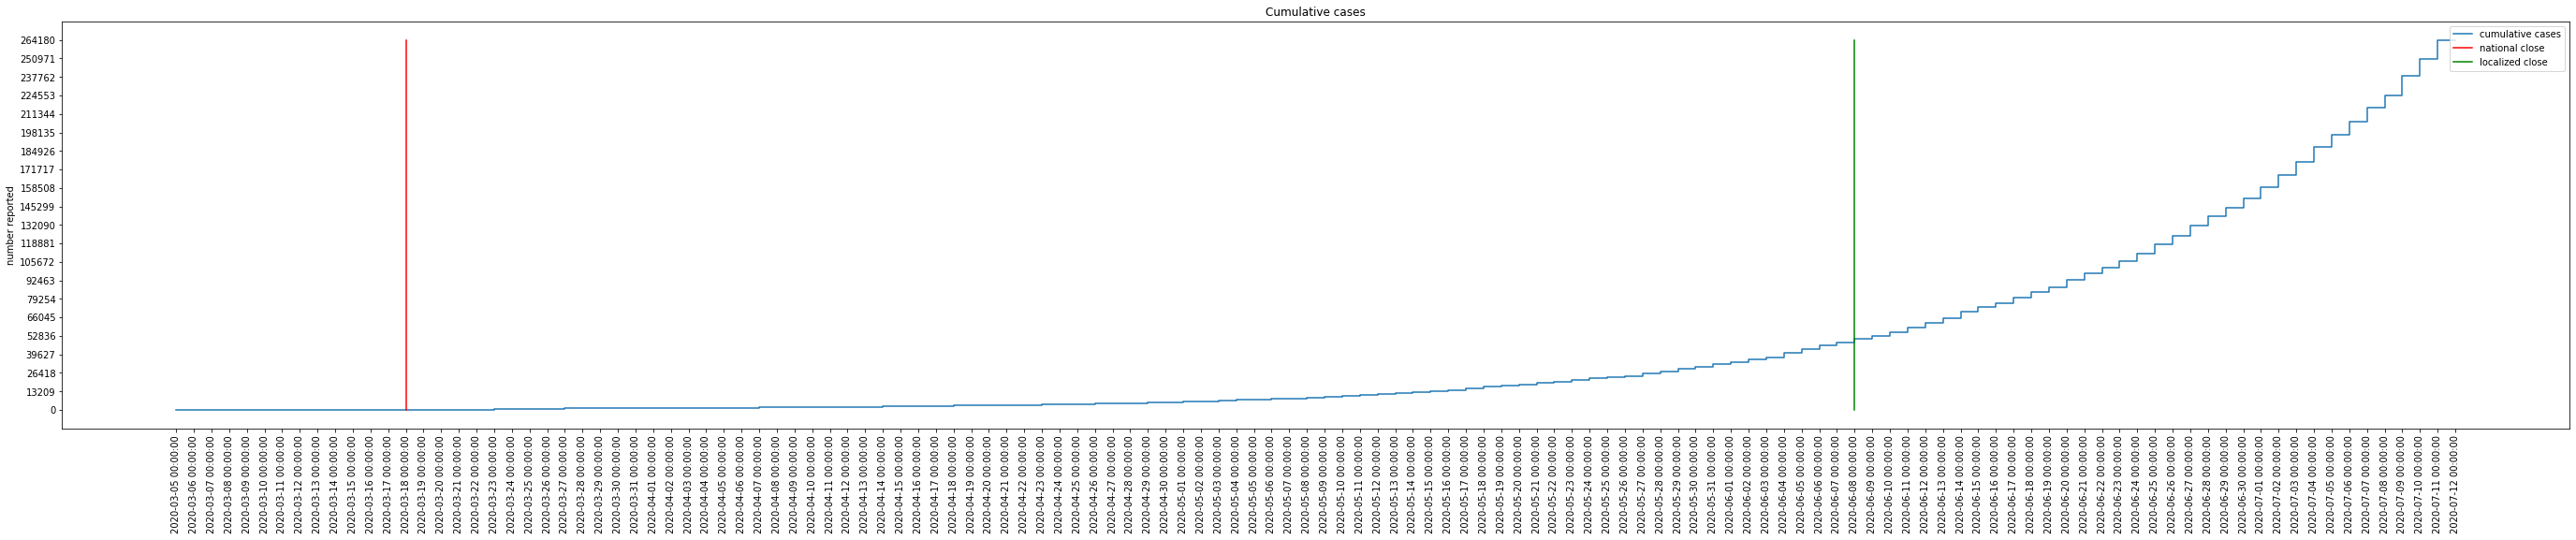

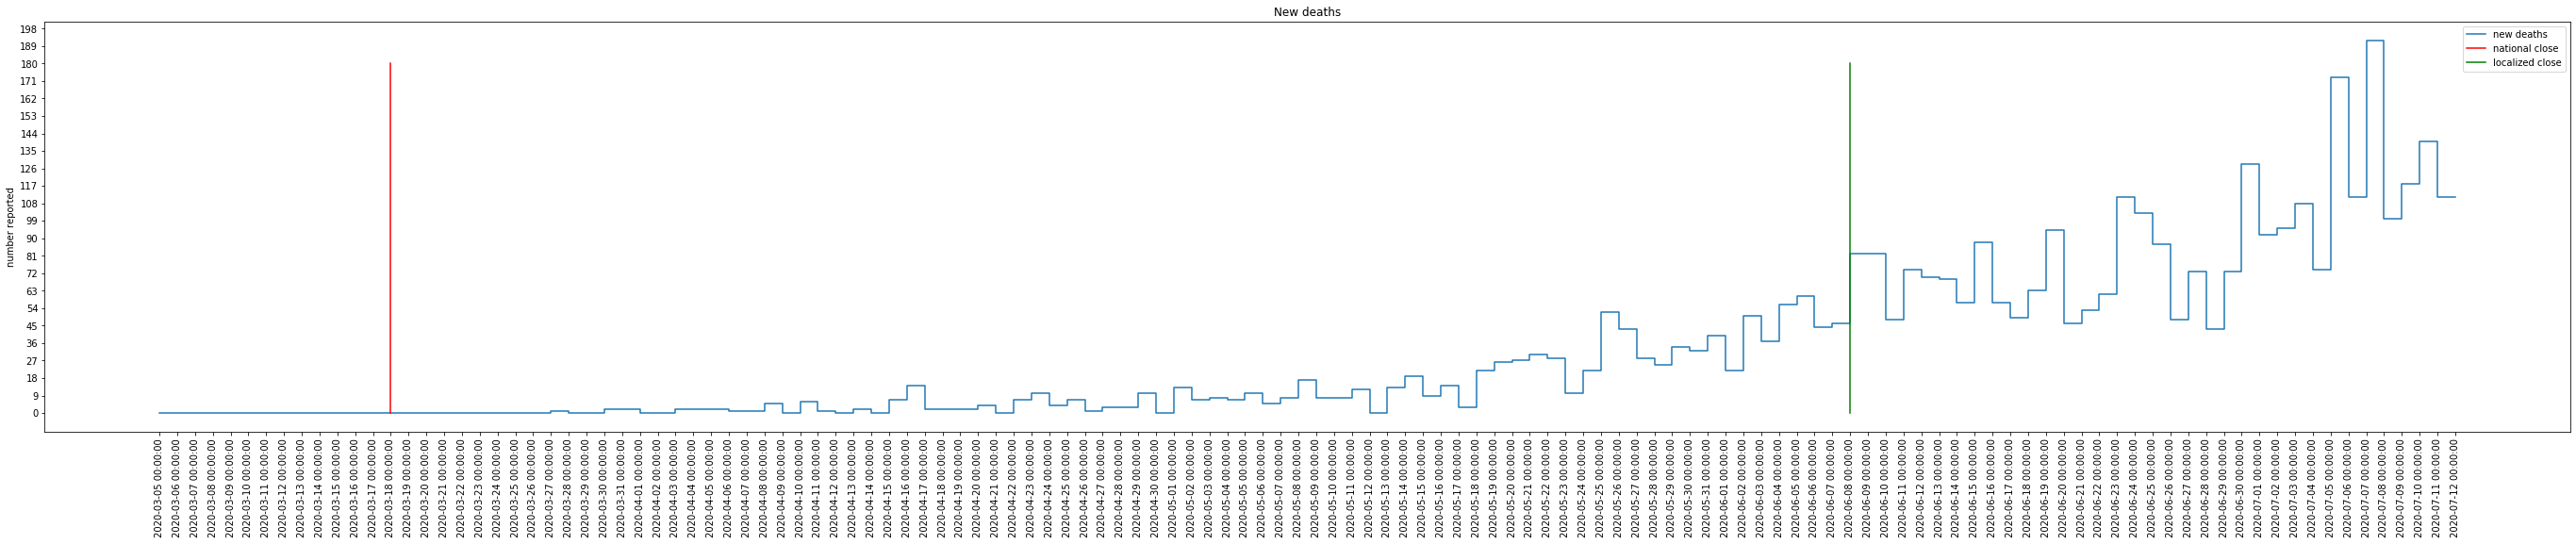

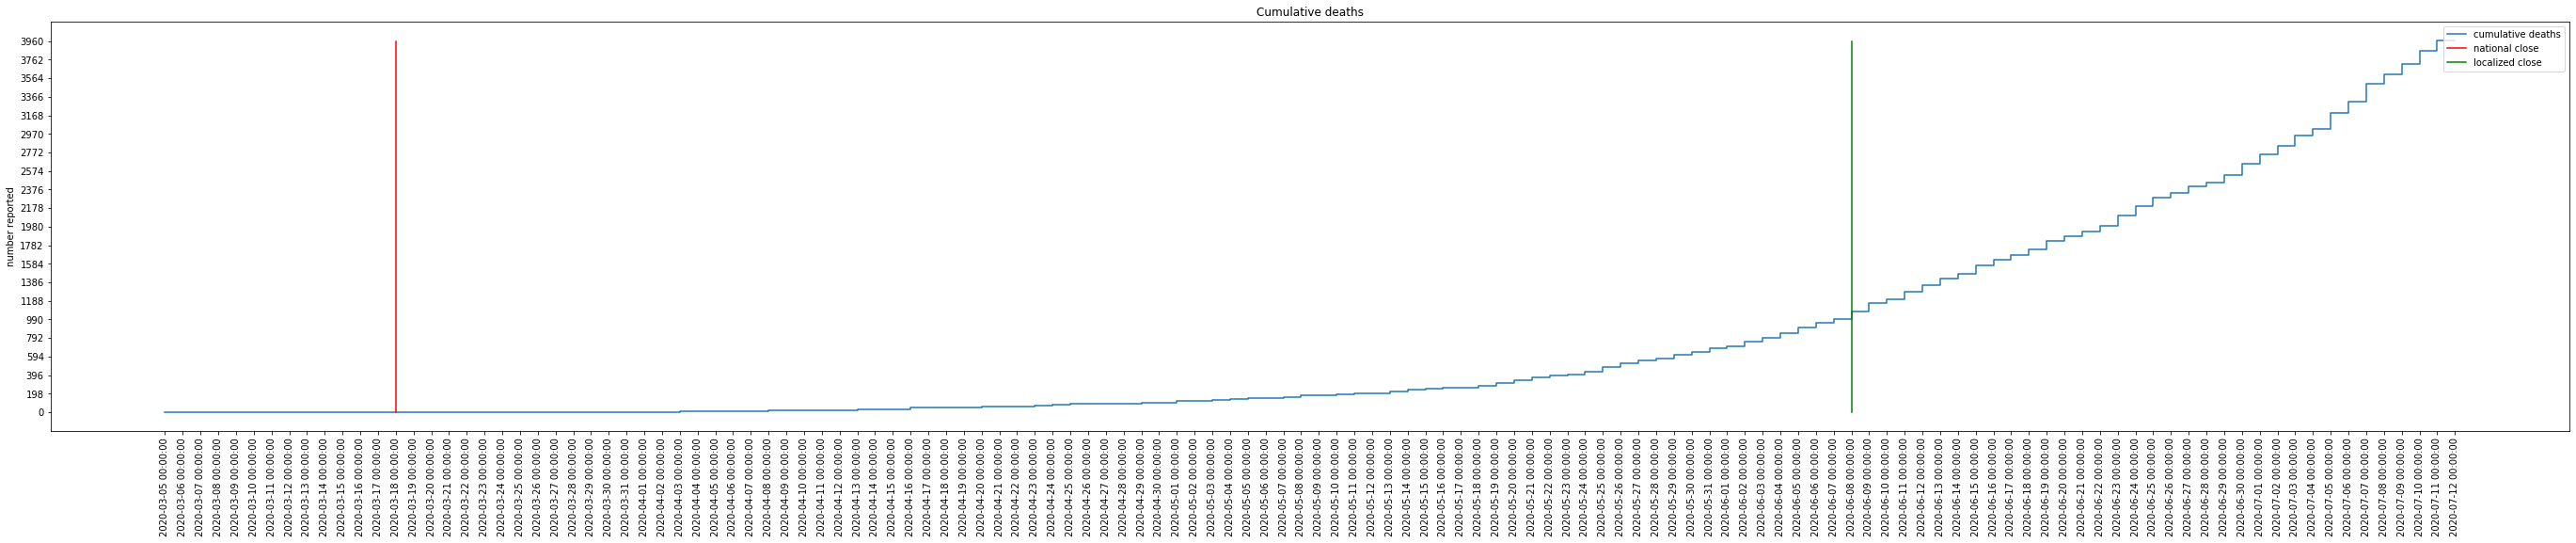

In [426]:
country_list=["US","CN","IT","BR","IN","RU","ZA"]
for iso in country_list:
    print(iso_dict[iso][1])
    draw_edu_graph_for_country(iso)
    print("=====================================================")

In [427]:
gov_data=np.array(gov_data)

In [428]:
#ID','COUNTRY','ISO','ADMIN_LEVEL_NAME','PCODE','REGION','LOG_TYPE','CATEGORY','MEASURE','TARGETED_POP_GROUP','COMMENTS','NON_COMPLIANCE','DATE_IMPLEMENTED','SOURCE','SOURCE_TYPE','LINK','ENTRY_DATE','Alternative source'])
gov_by_country={}
gov_by_measure={"Governance and socio-economic measures":{}, "Lockdown":{},"Humanitarian exemption":{},"Movement restrictions":{},"Public health measures":{},"Social distancing":{}}
for datum in gov_data:
    if datum[3]:
        continue #only count country level
    if datum[2] not in gov_by_country.keys():
        gov_by_country[datum[2]]={}
    if datum[7] not in gov_by_country[datum[2]].keys():
        gov_by_country[datum[2]][datum[7]]={}
    if datum[2] not in gov_by_measure[datum[7]].keys():
        gov_by_measure[datum[7]][datum[2]]={}
    if datum[8] not in gov_by_country[datum[2]][datum[7]].keys():
        date= datum[-2]
        if datum[-6]!="":
            date=min(datetime.strptime(datum[-6], '%Y-%m-%d'),date)
        gov_by_country[datum[2]][datum[7]][datum[8].strip("\xa0")]=[date,datum[-7]]
        gov_by_measure[datum[7]][datum[2]][datum[8].strip("\xa0")]=[date,datum[-7]]


## government measures adopted by countries

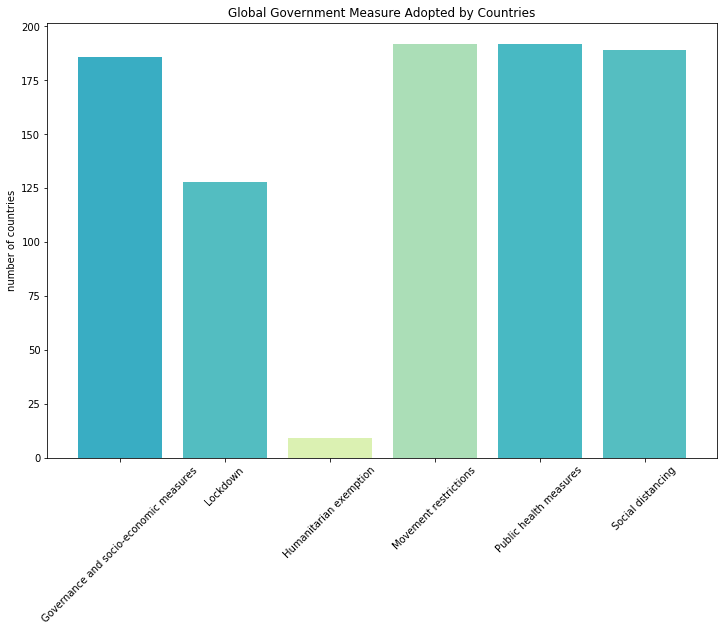

In [429]:
measure_count=[]
tags=tuple(gov_by_measure.keys())
for key in tags:
    measure_count.append(len(gov_by_measure[key].keys()))        
ind = np.arange(len(tags))
plt.figure(figsize=(12,8))
my_cmap = cm.get_cmap('YlGnBu')
color=[random.uniform(0.1, 0.65) for i in range(len(tags))]
p1 = plt.bar(ind, measure_count,color=my_cmap(color))
plt.ylabel('number of countries')
plt.title('Global Government Measure Adopted by Countries')
plt.xticks(ind, tags)
plt.xticks(rotation=45)
plt.show() 

## visualization of cases/deaths curves and educational measures

In [430]:
def draw_gov_graph_for_country(iso):
    date= who_dict[iso]['Date_reported']
    ind = np.arange(len(who_dict[iso]['Date_reported']))

    series_tag=["Governance and socio-economic measures", "Lockdown","Humanitarian exemption","Movement restrictions","Public health measures","Social distancing"]
    series_tag=['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']
    for i in range(len(series_tag)):
        plt.figure(figsize=(48,8))
        series=series_tag[i]
        maxv=who_dict[iso][series].max()
        data=who_dict[iso][series]
        plt.step(ind, data,label=series.replace("_"," ").lower())
        for key in gov_by_country[iso_dict[iso][0]]:
            if key=='Governance and socio-economic measures':
                line='r-'
            elif key == "Lockdown":
                line='g-'
            elif key=='Humanitarian exemption':
                line='b-'
            elif key == "Movement restrictions":
                line='c-'
            elif key== 'Public health measures':
                line='m-'
            else:
                line='y-'
            for sub in gov_by_country[iso_dict[iso][0]][key].keys():
                x=[(gov_by_country[iso_dict[iso][0]][key][sub][0]-date[0]).days for i in range(21)]
                y=[i for i in range(0,(maxv//10+1)*10, maxv//20)][:21]
                plt.plot(x,y,line,label=key)
        plt.ylabel('number reported')
        plt.title(series.replace("_"," "))
        plt.xticks(ind,date)
        plt.xticks(rotation=90)
        plt.yticks(np.arange(0, (maxv//10+1)*10, step=maxv//20))
        plt.legend(loc='upper right')
        plt.show()

United States


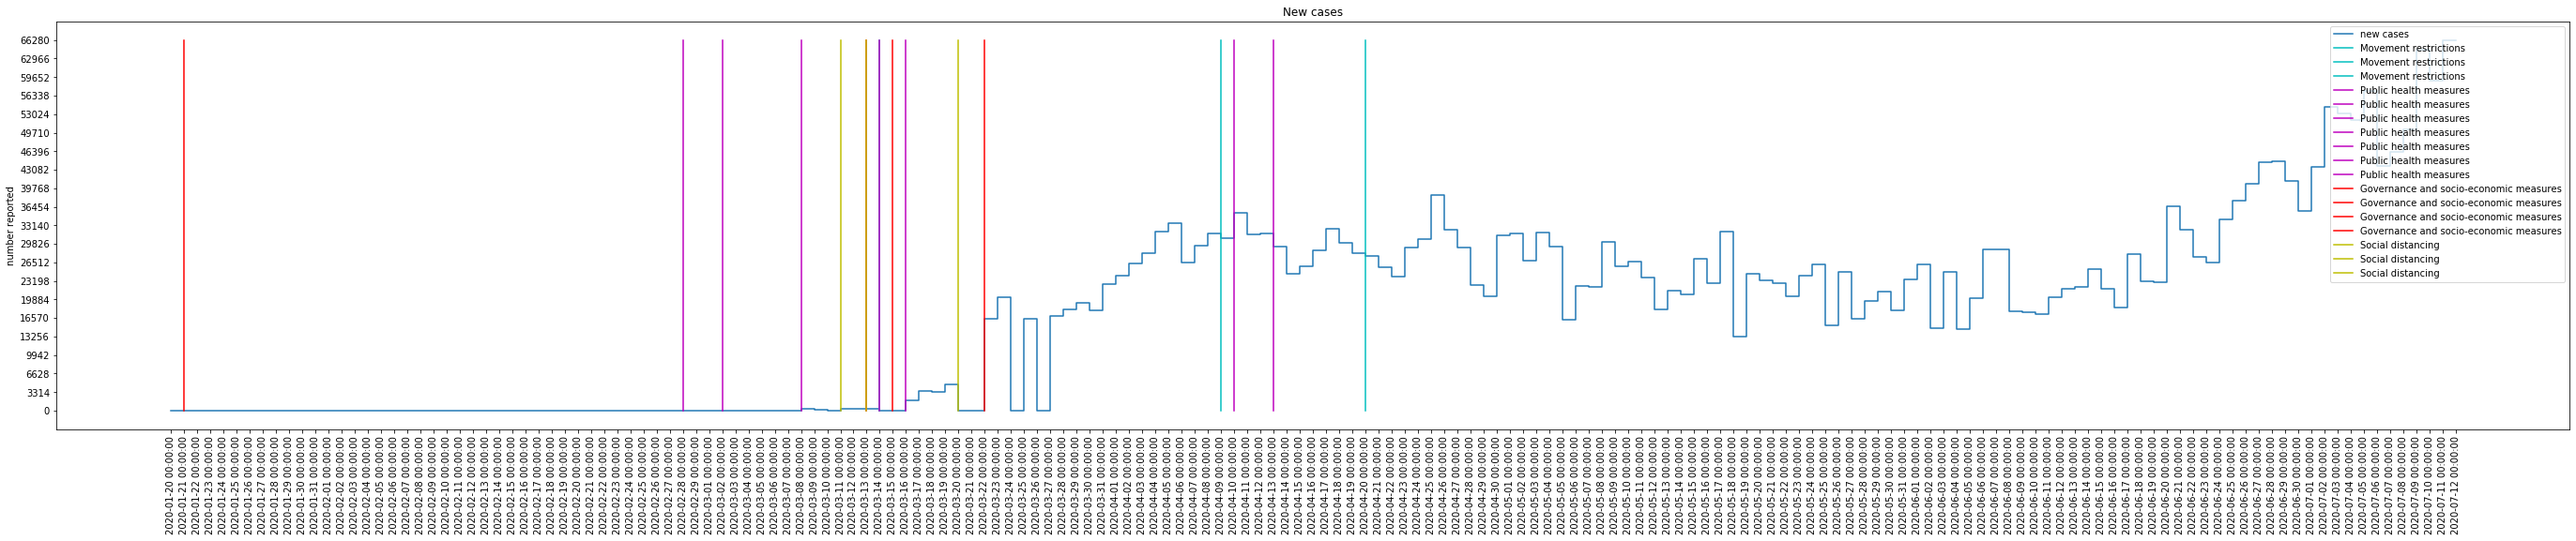

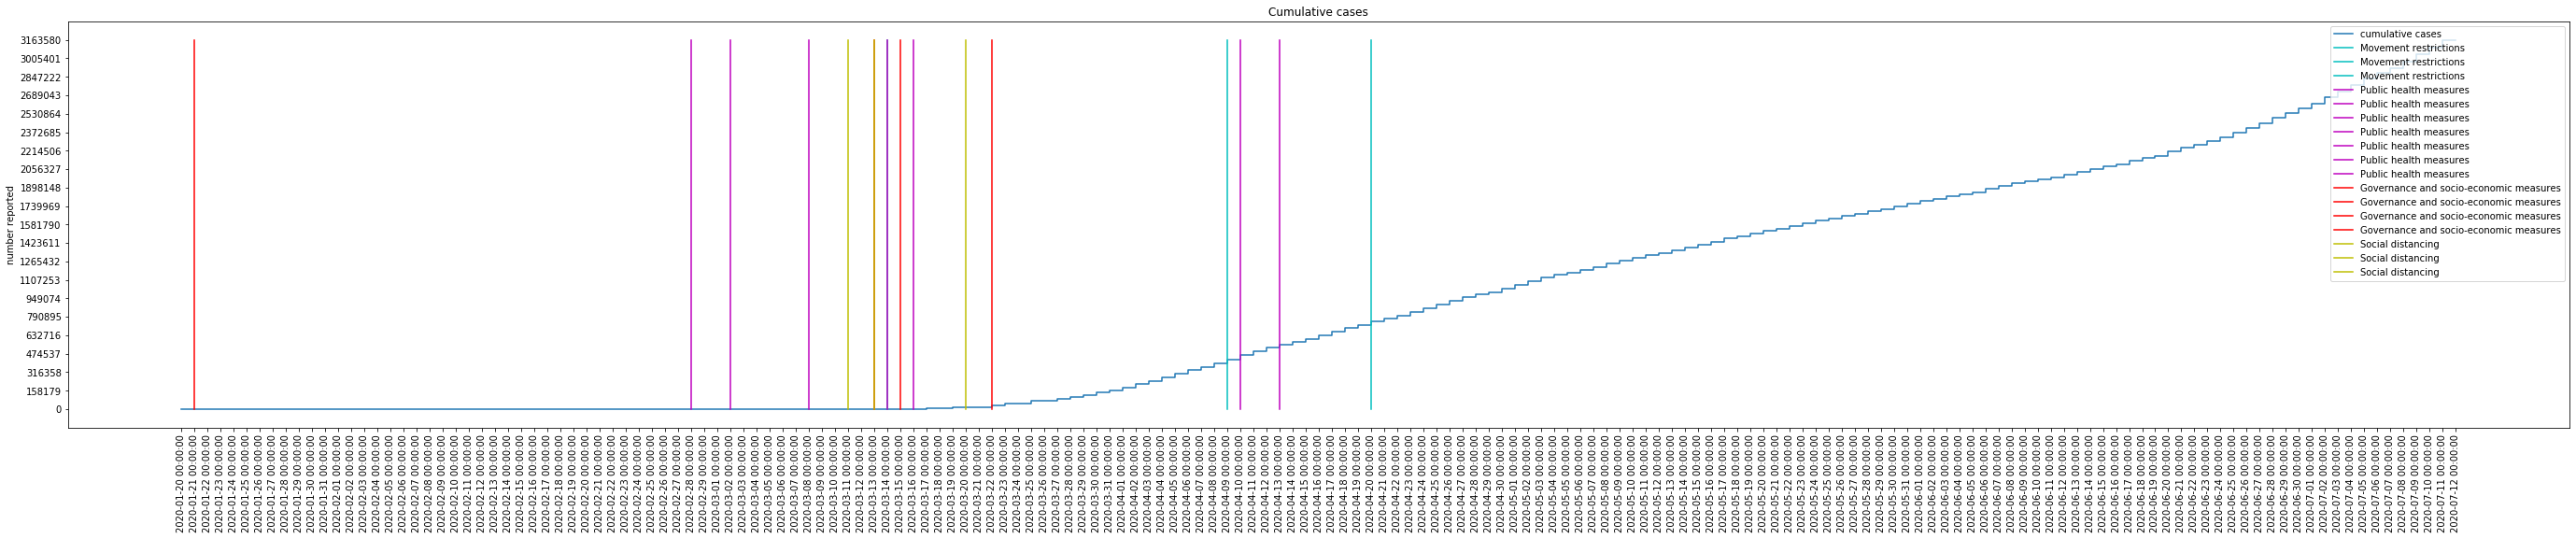

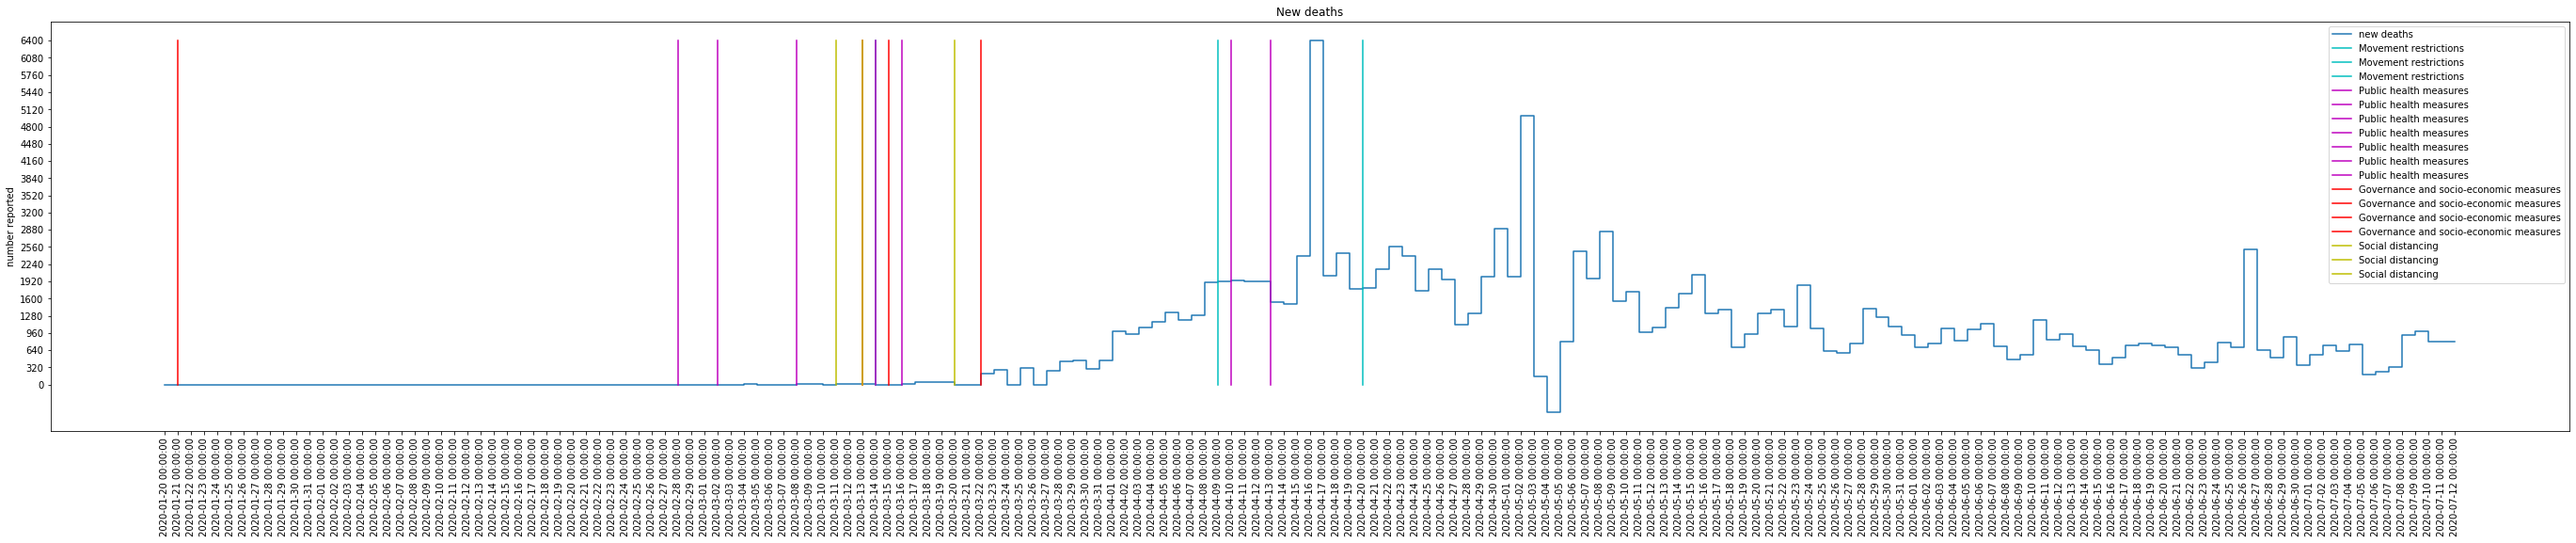

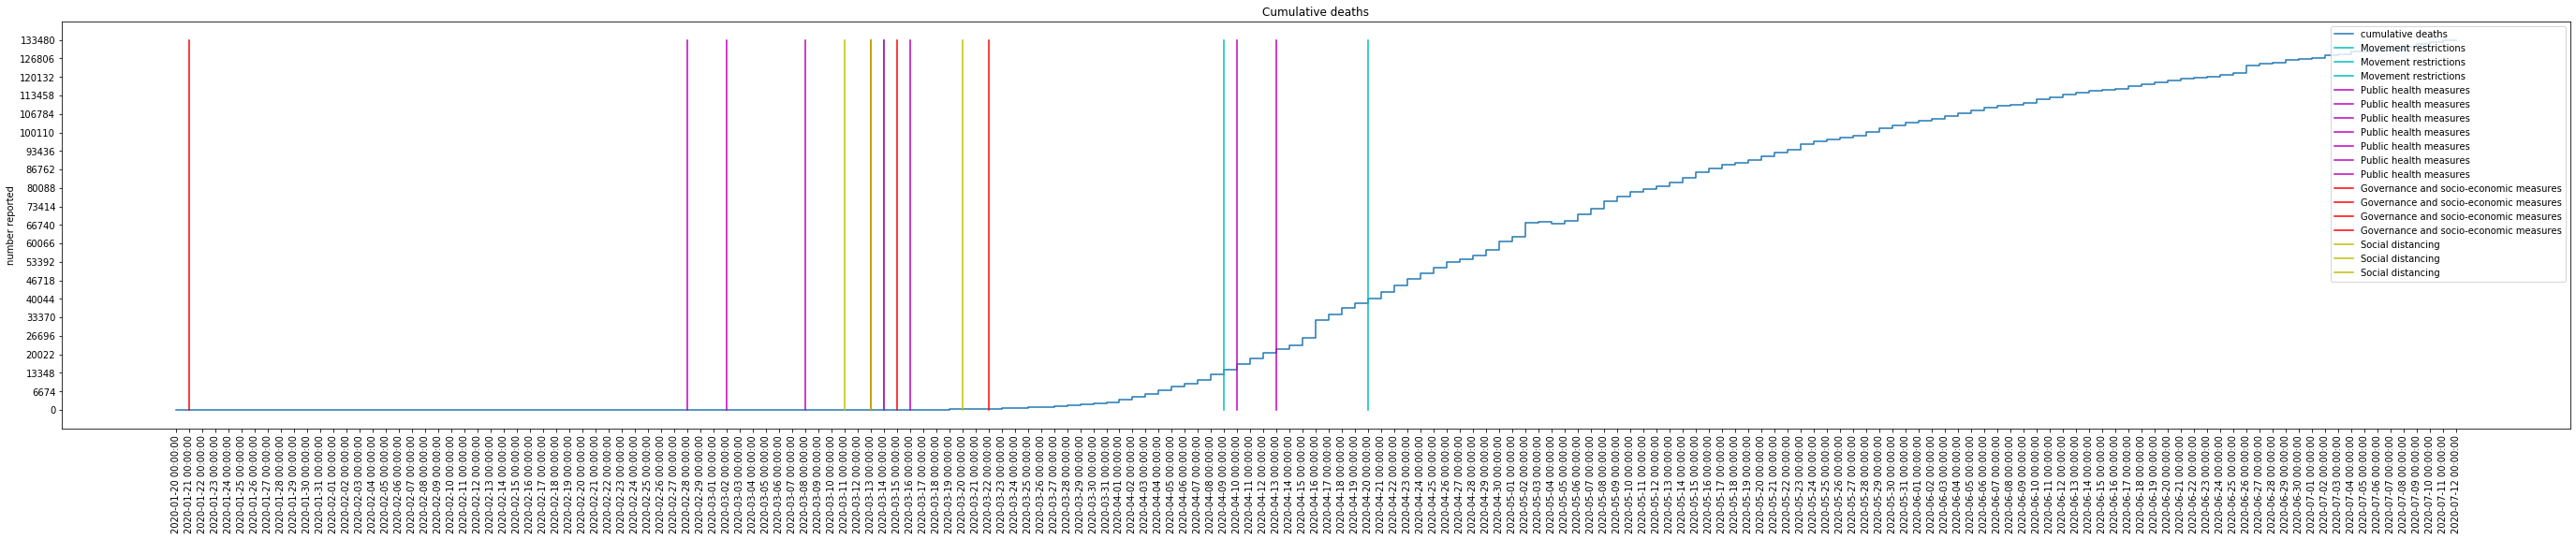

China


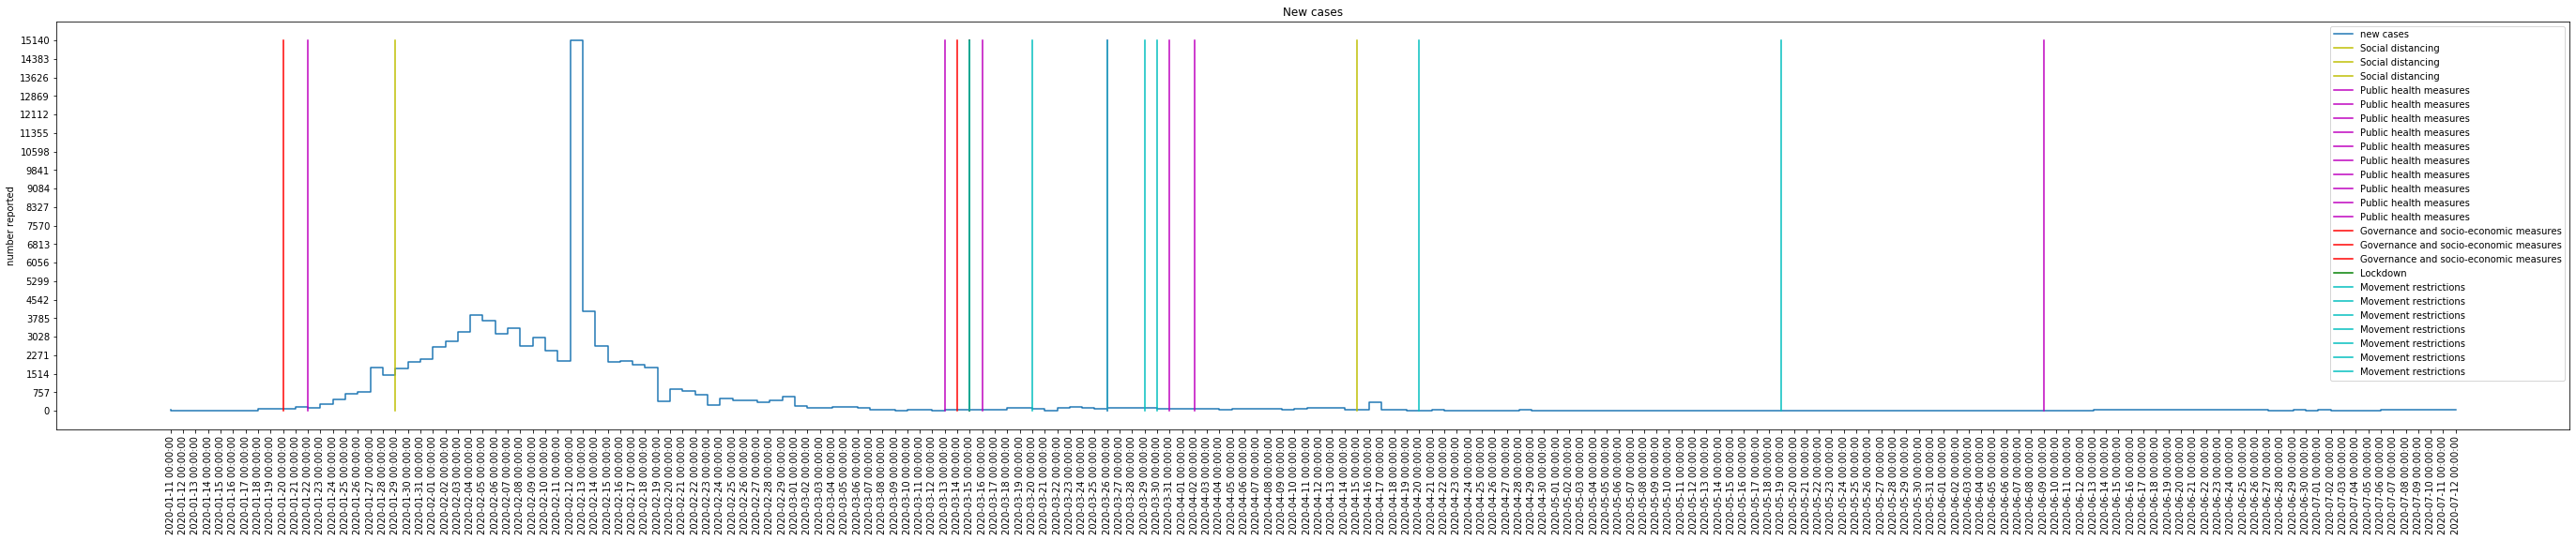

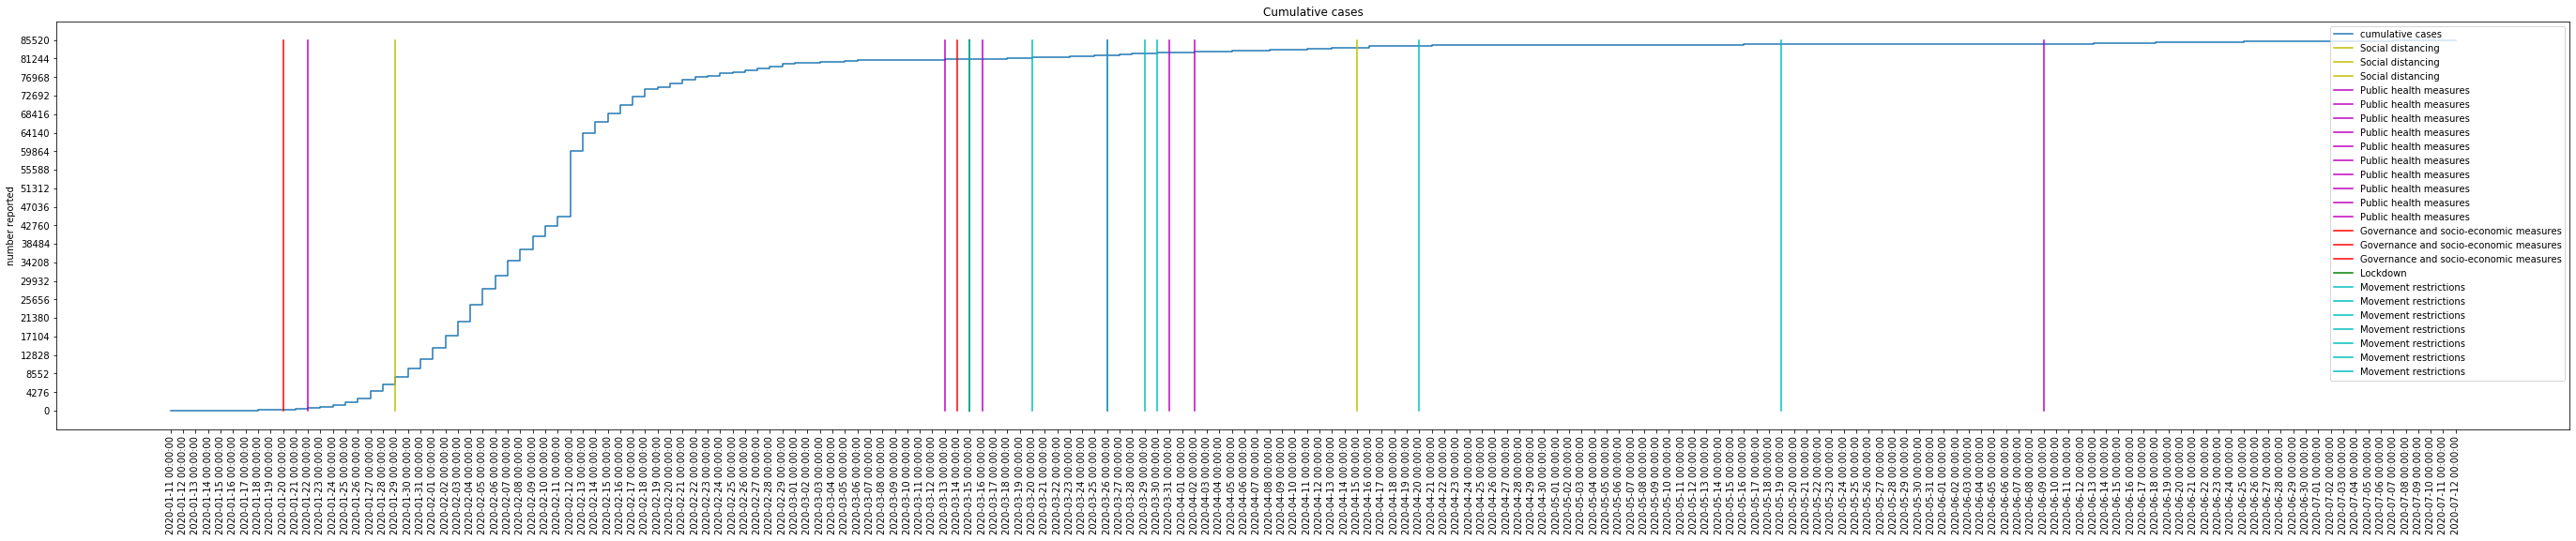

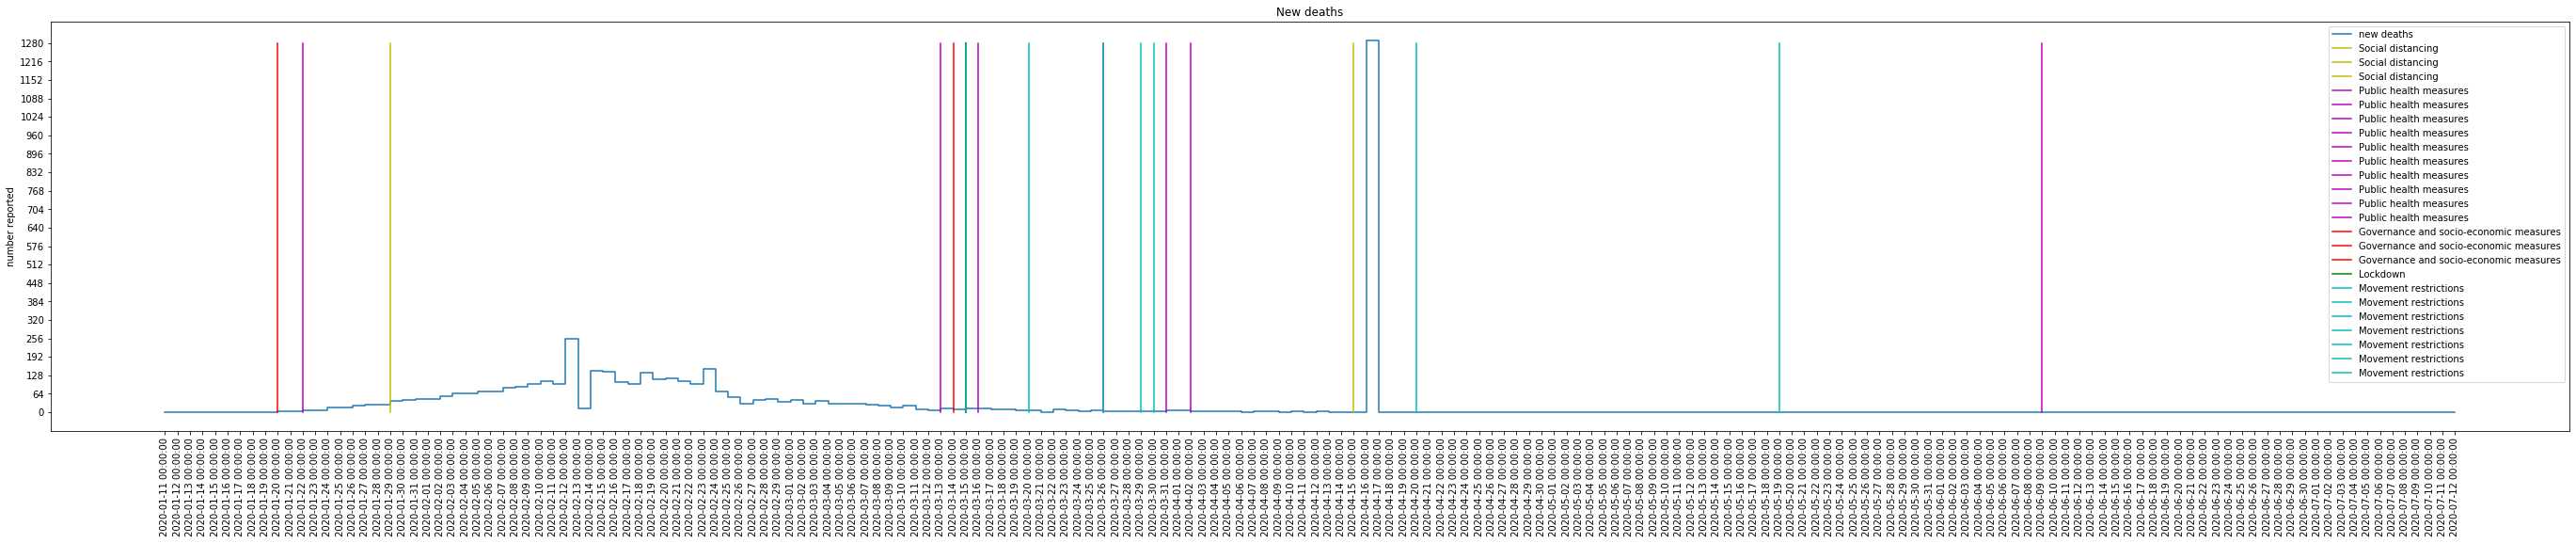

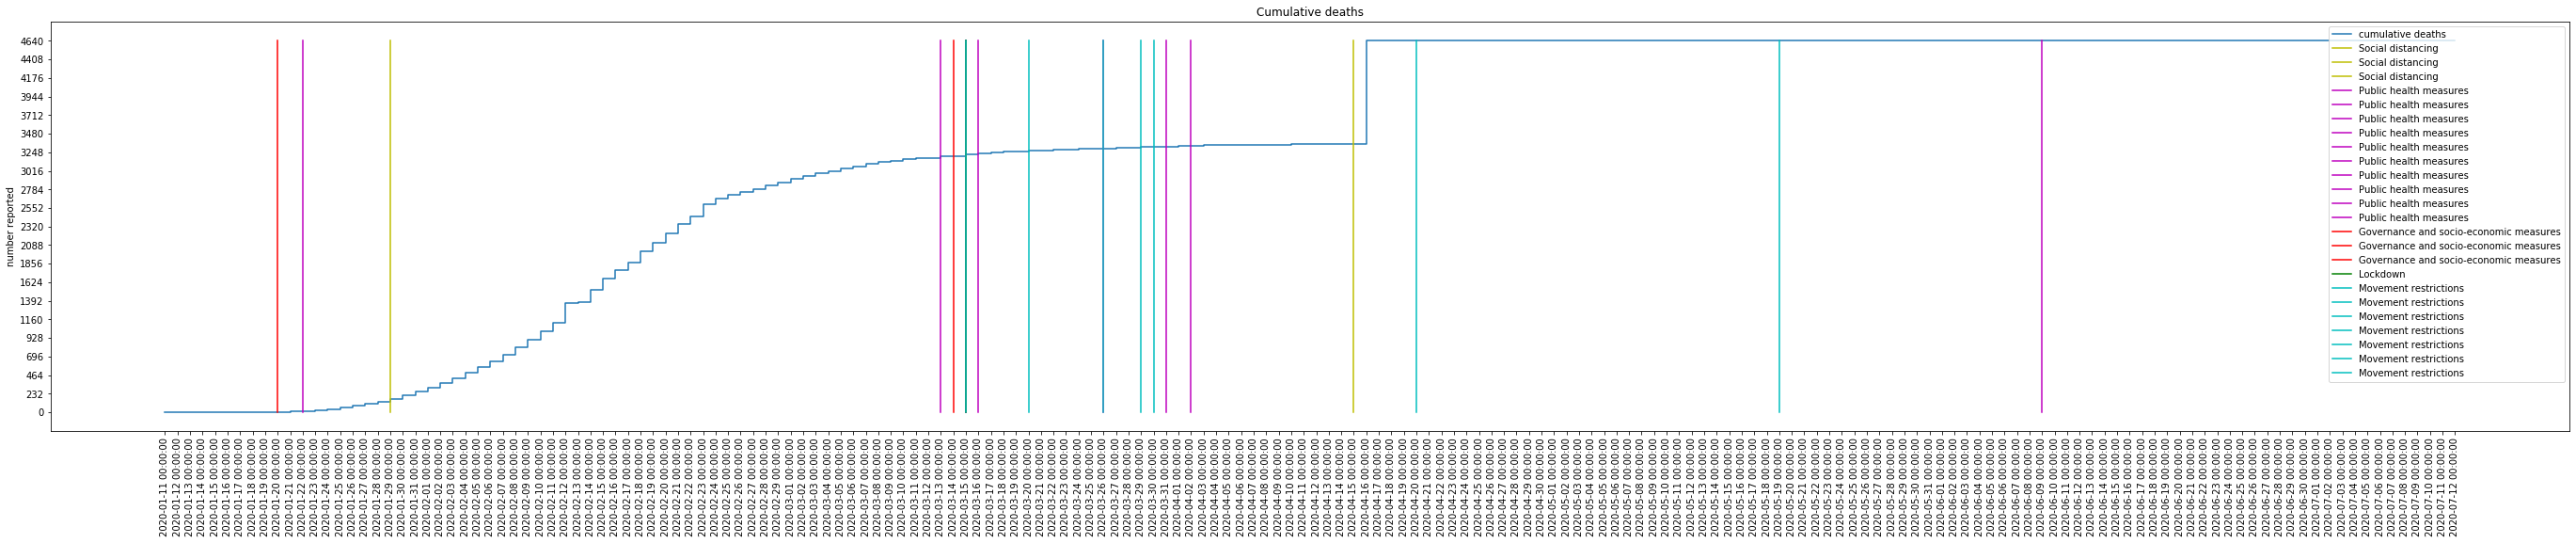

Italy


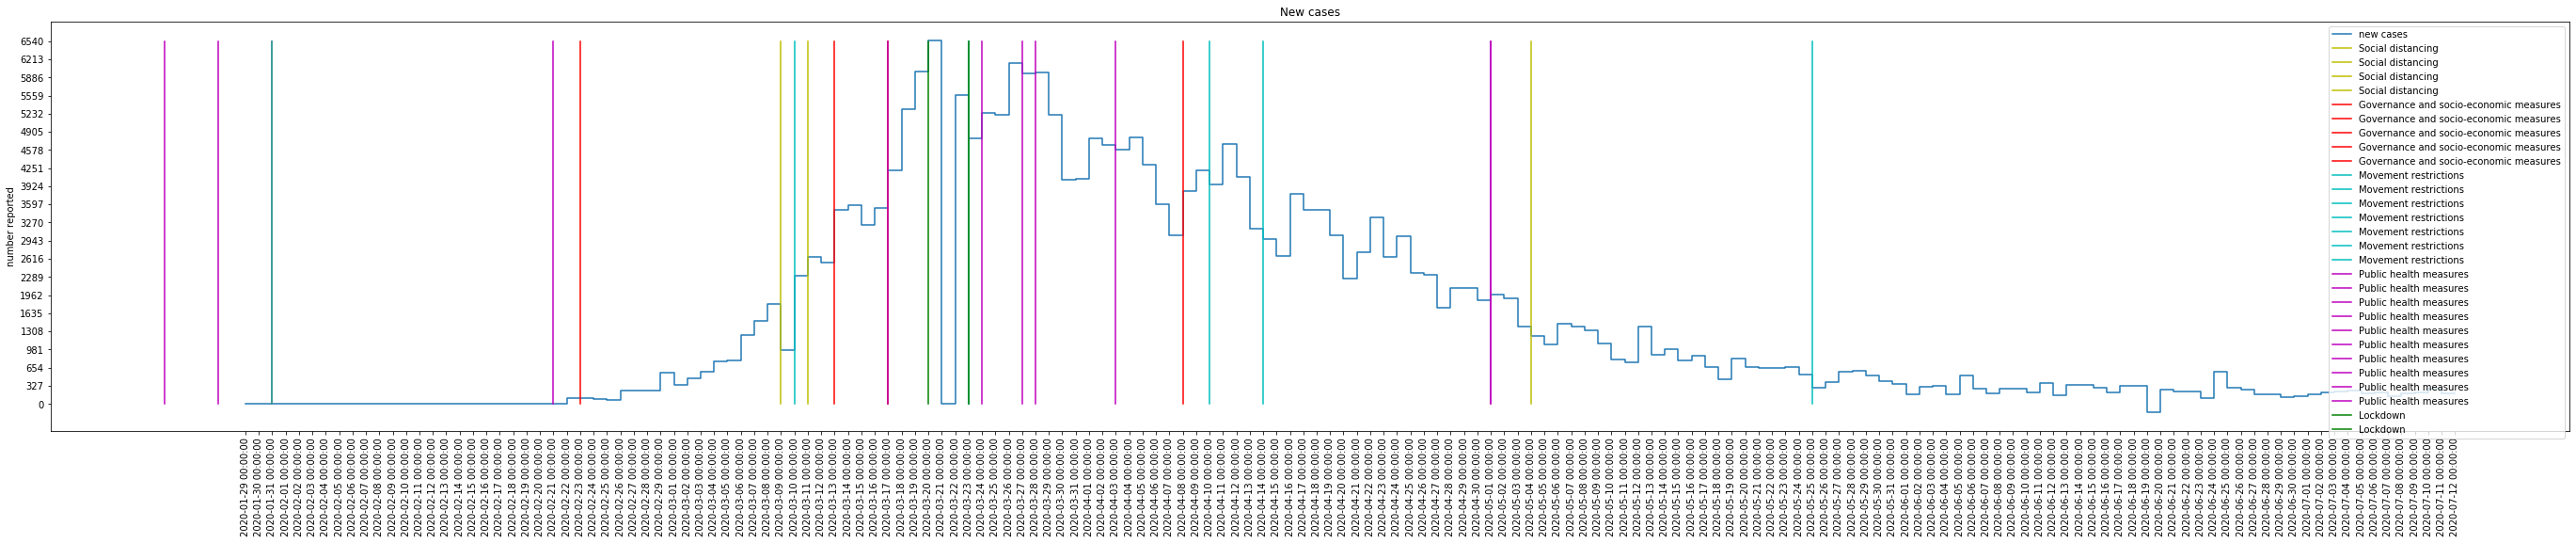

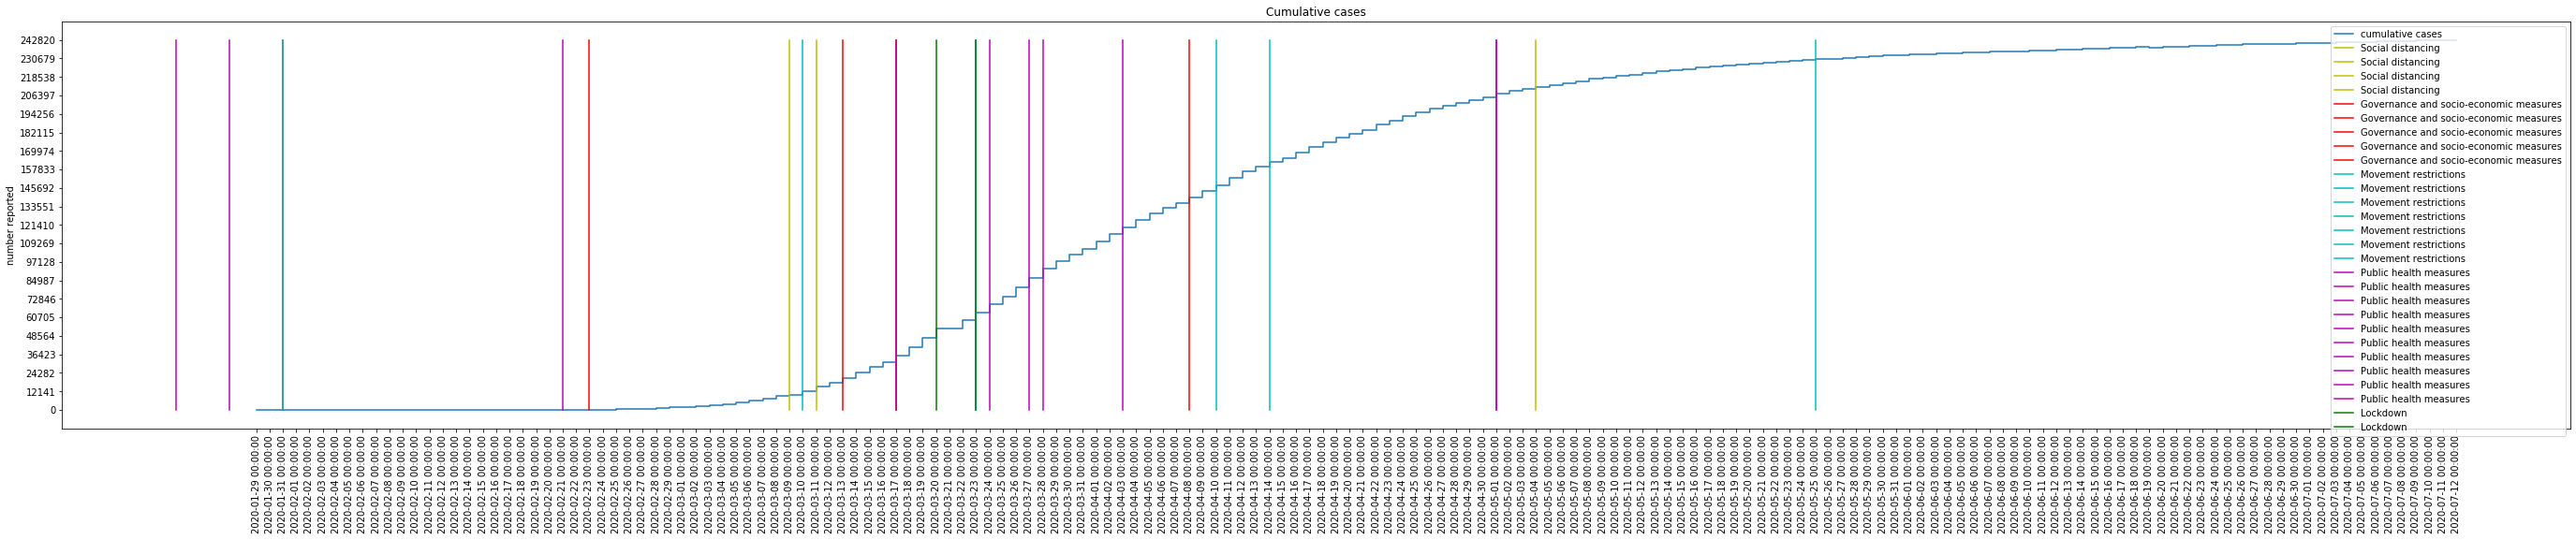

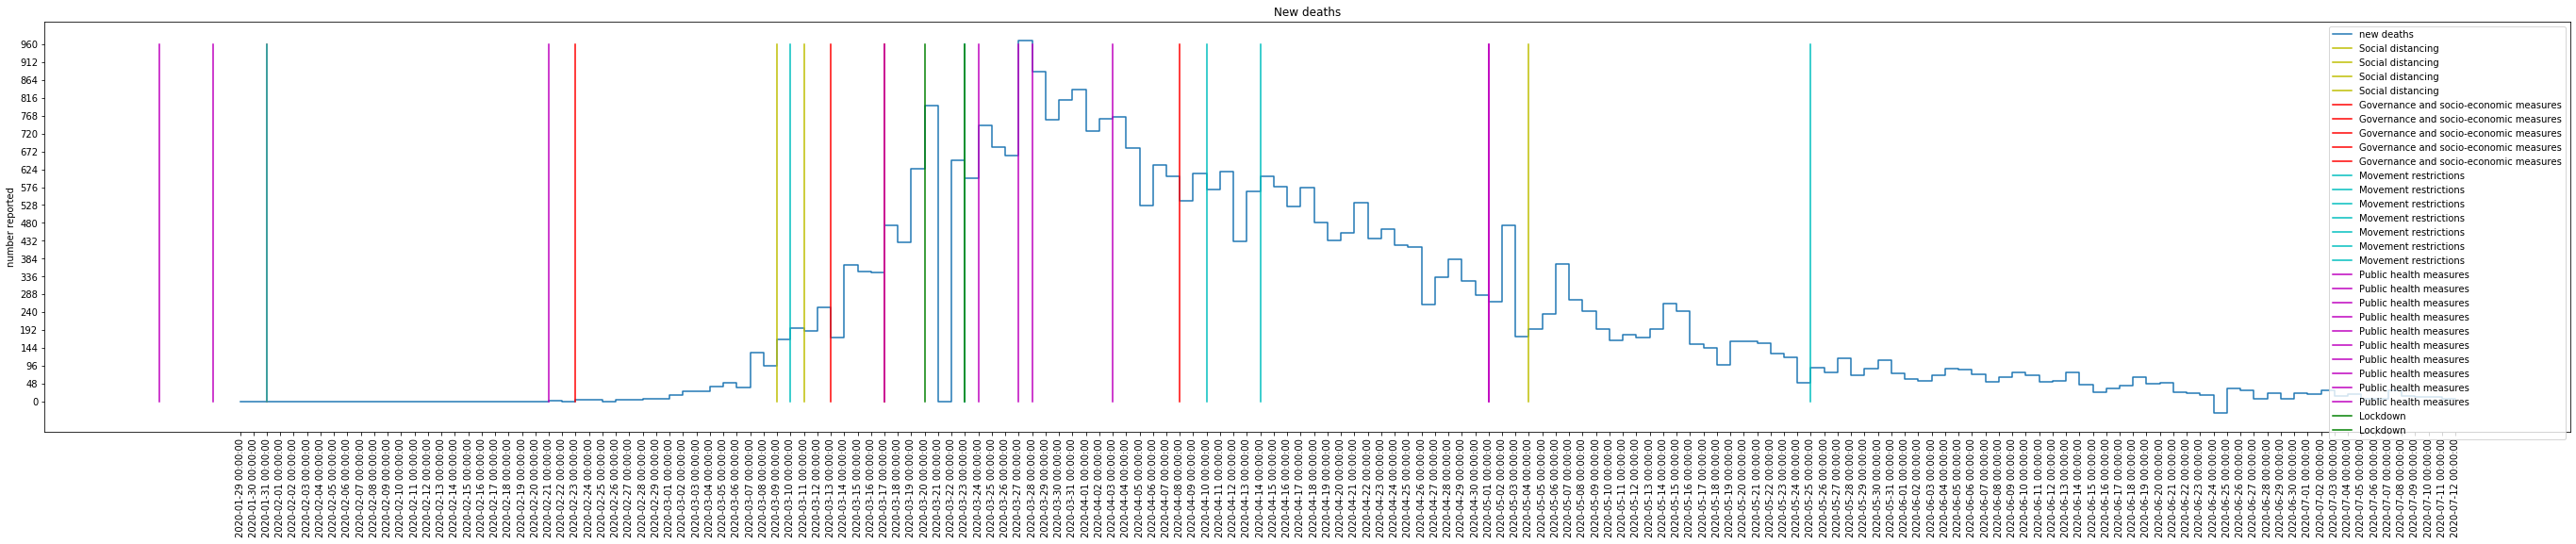

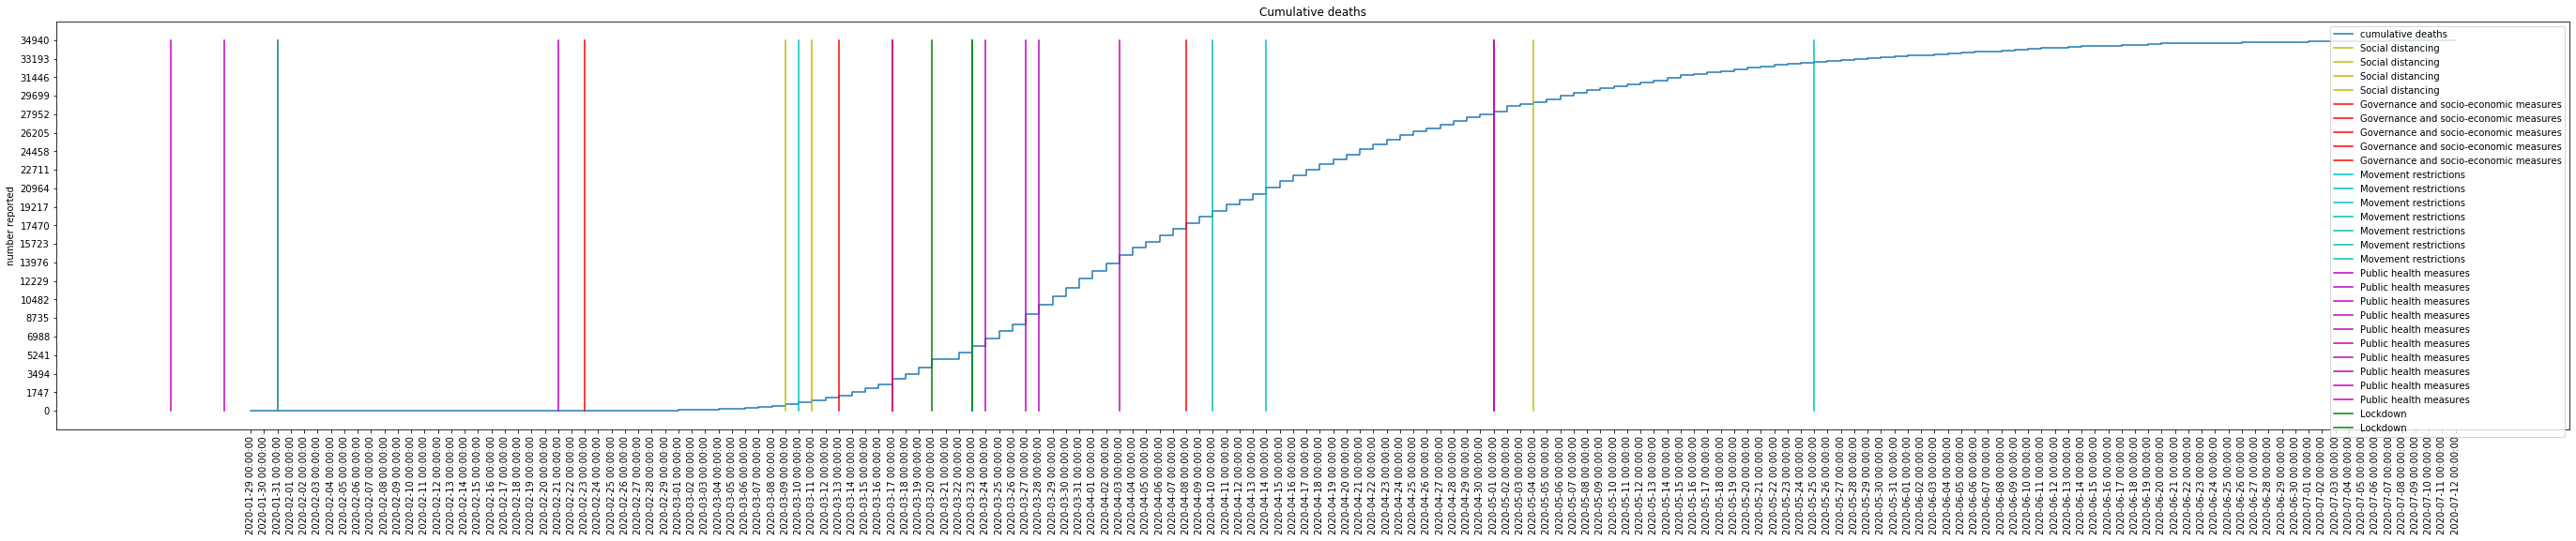

Brazil


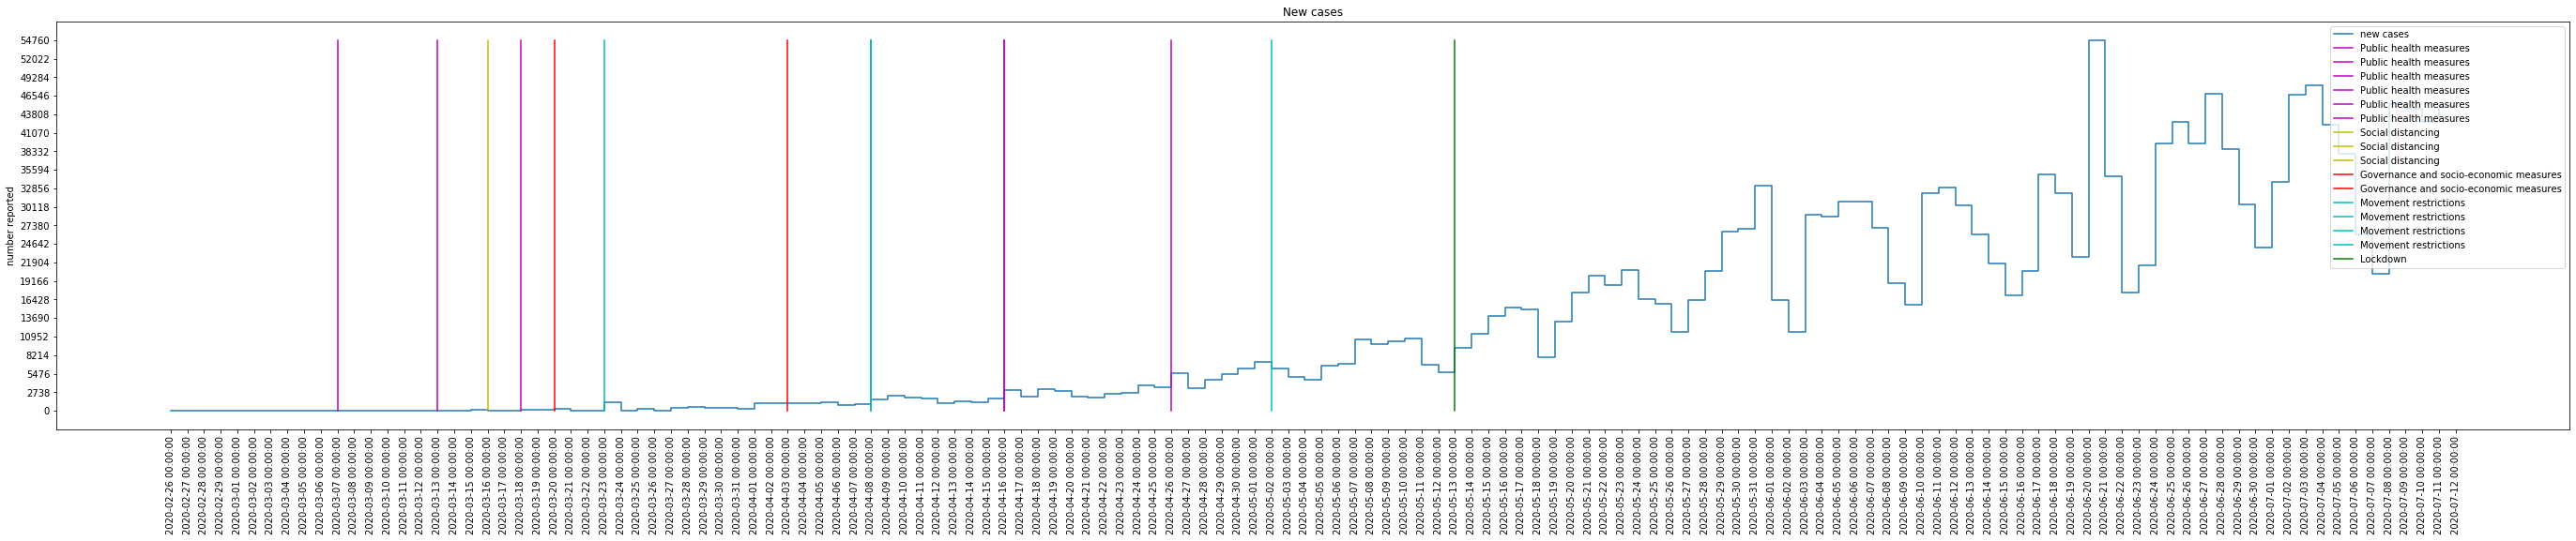

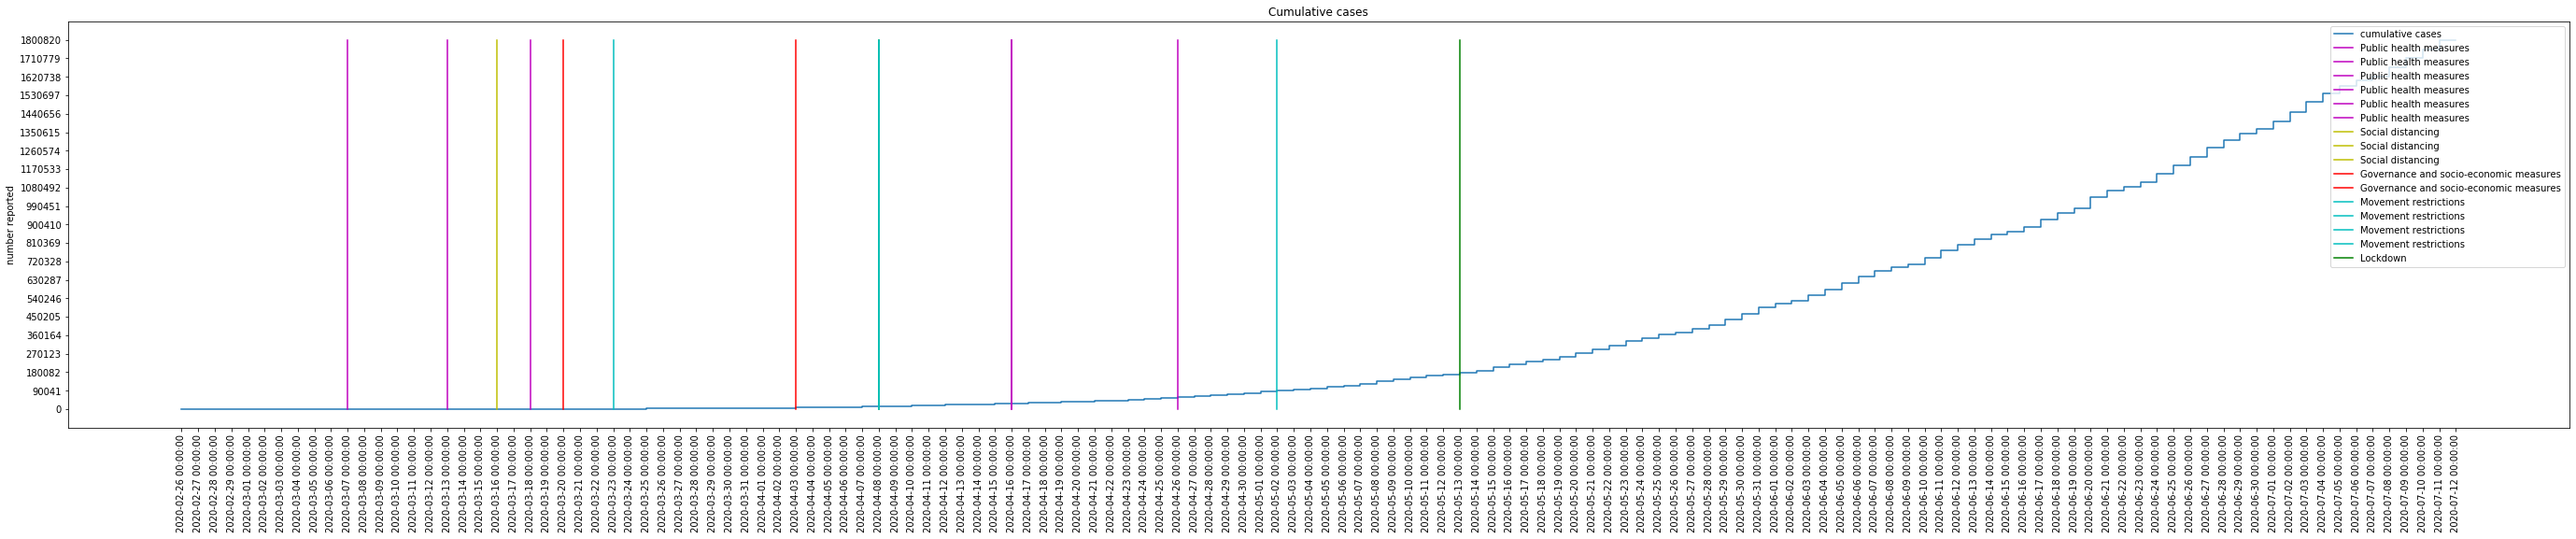

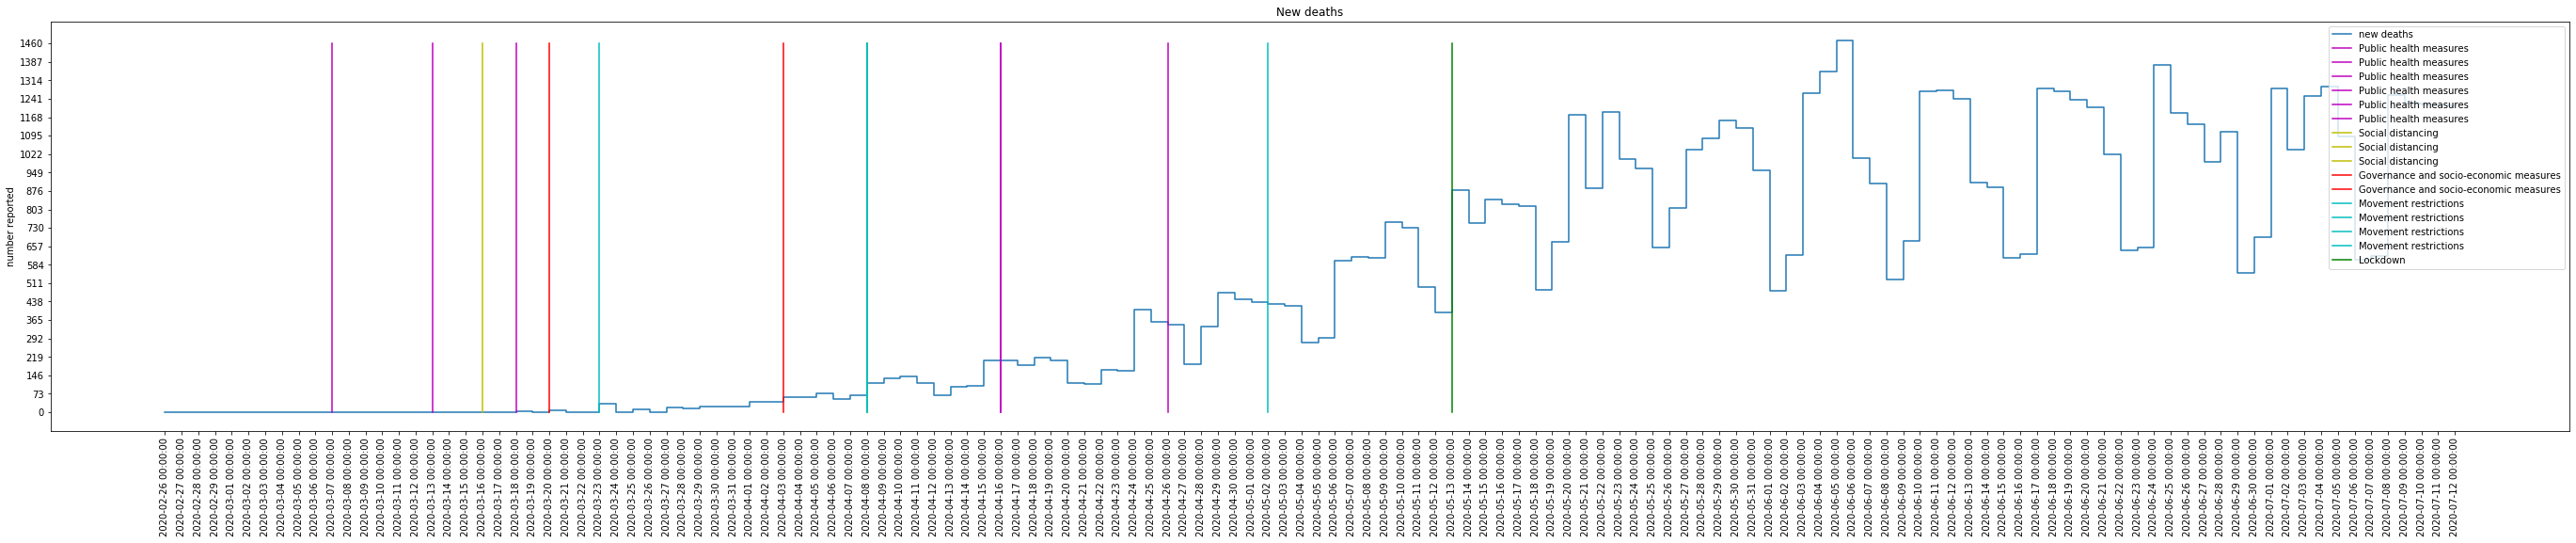

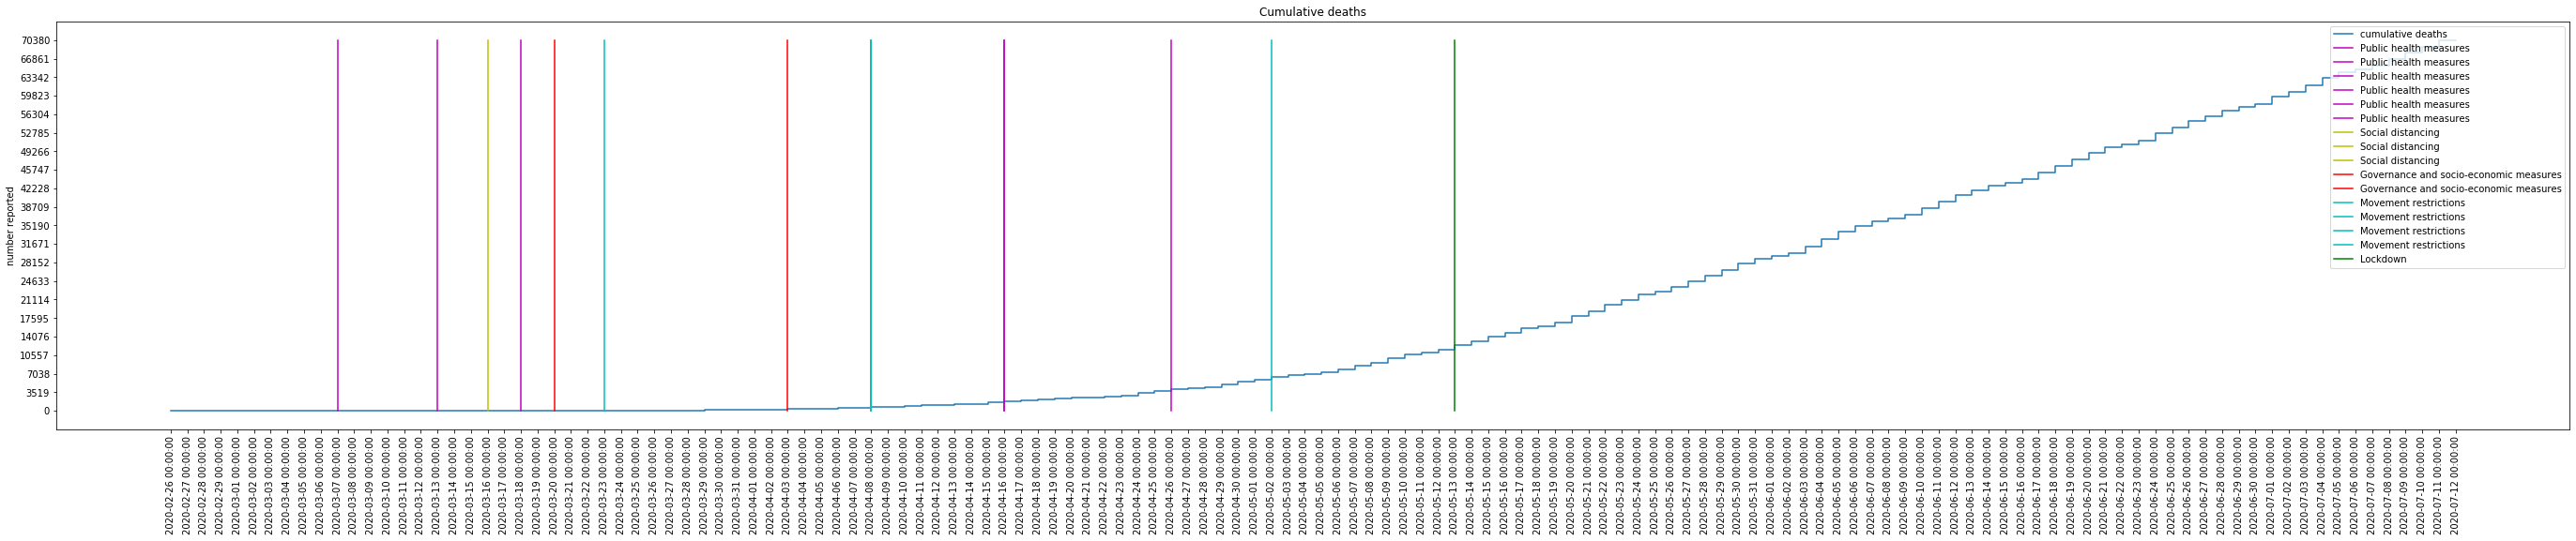

India


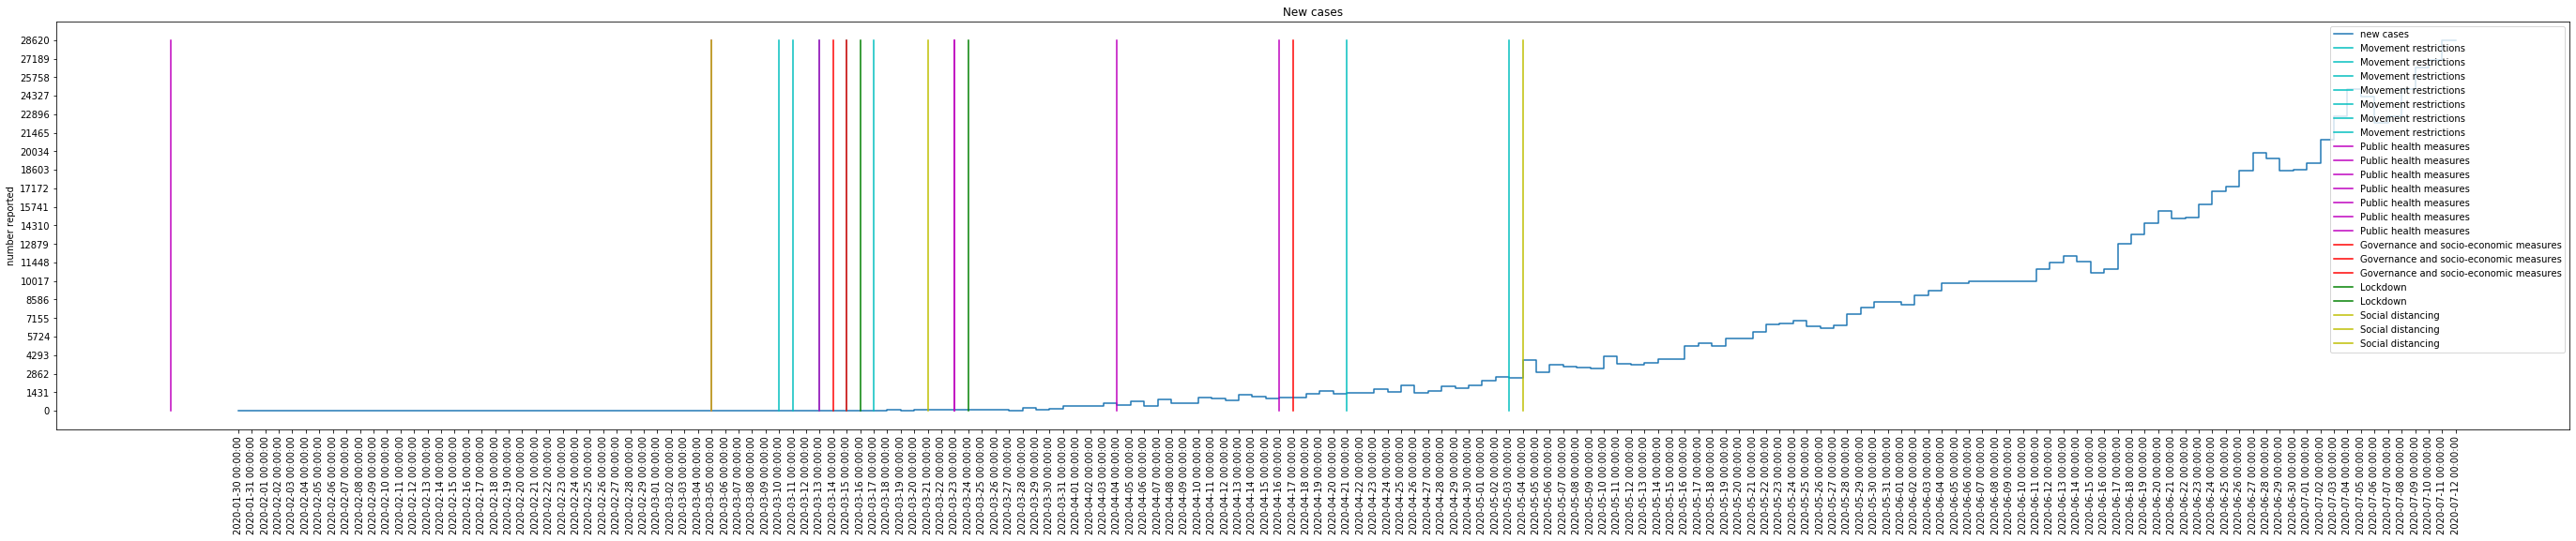

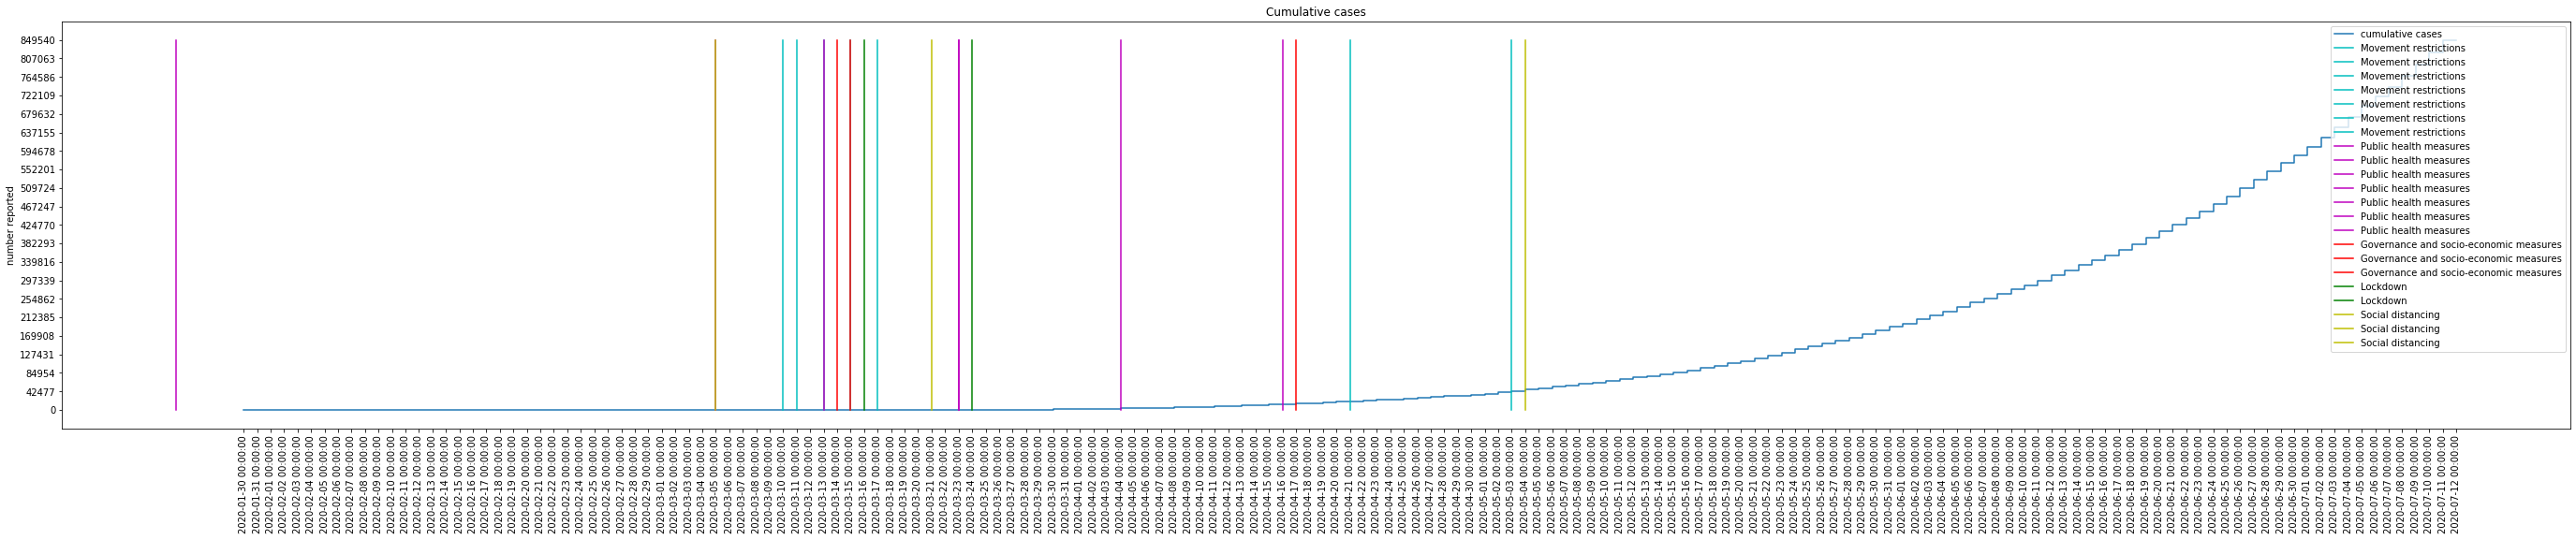

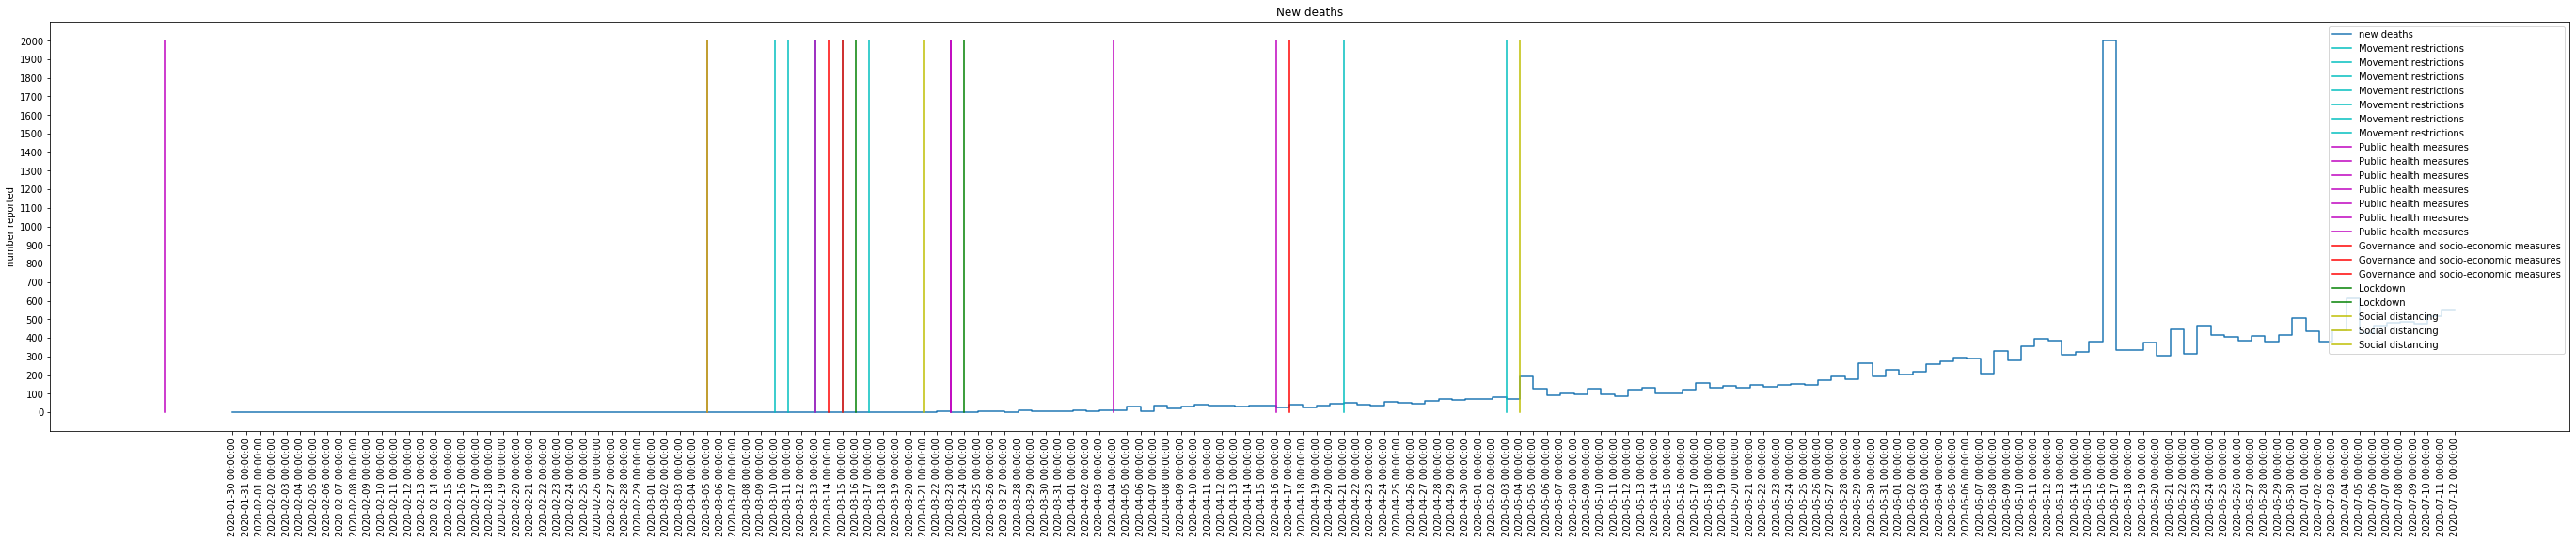

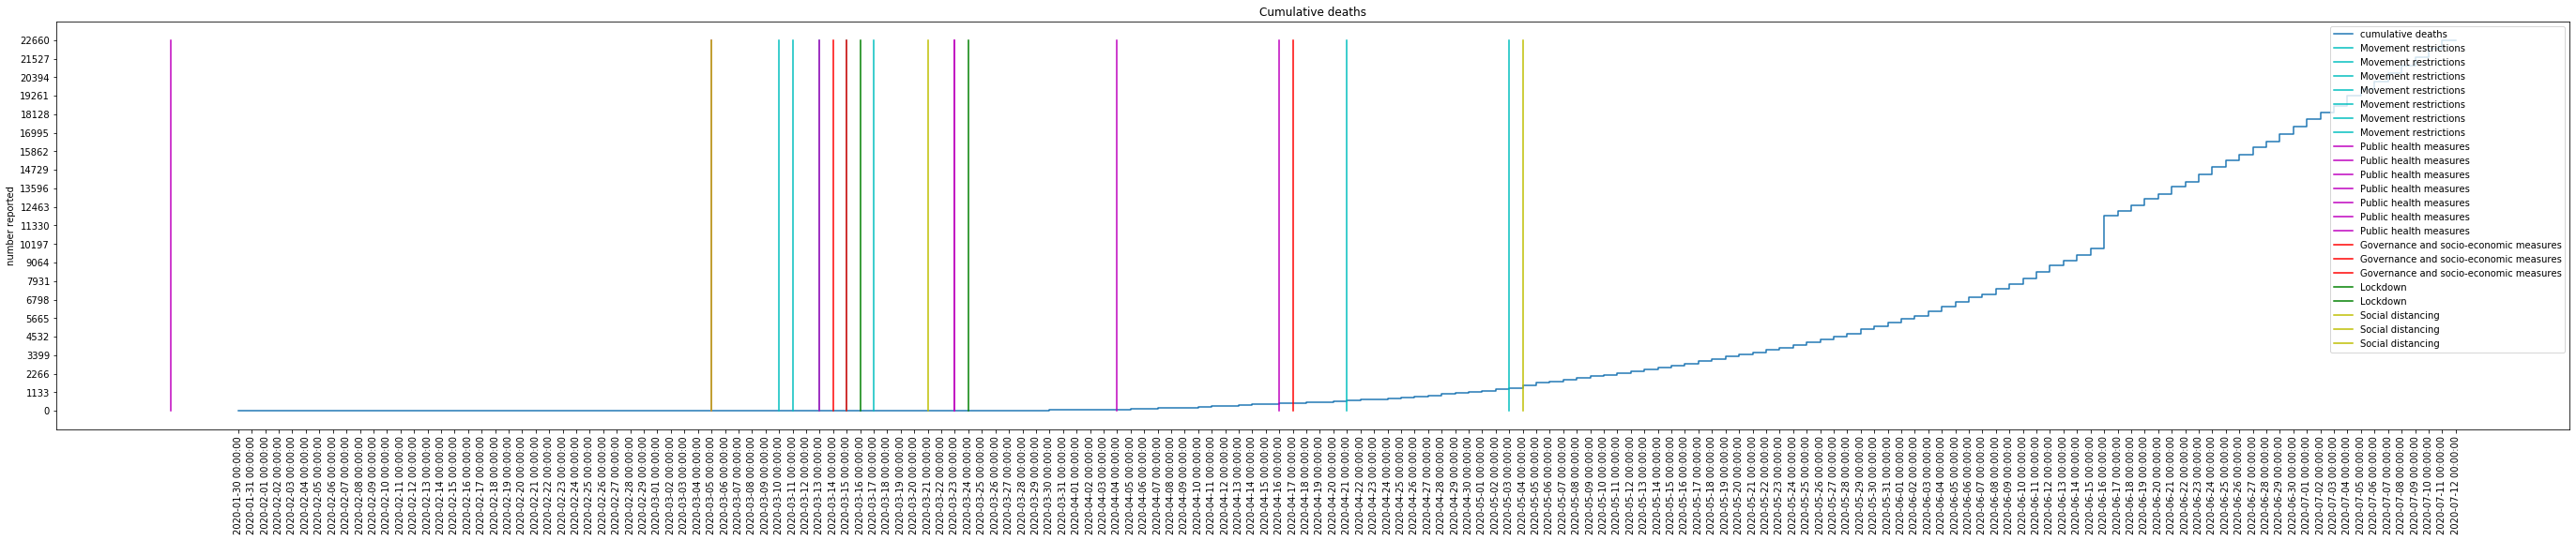

Russia


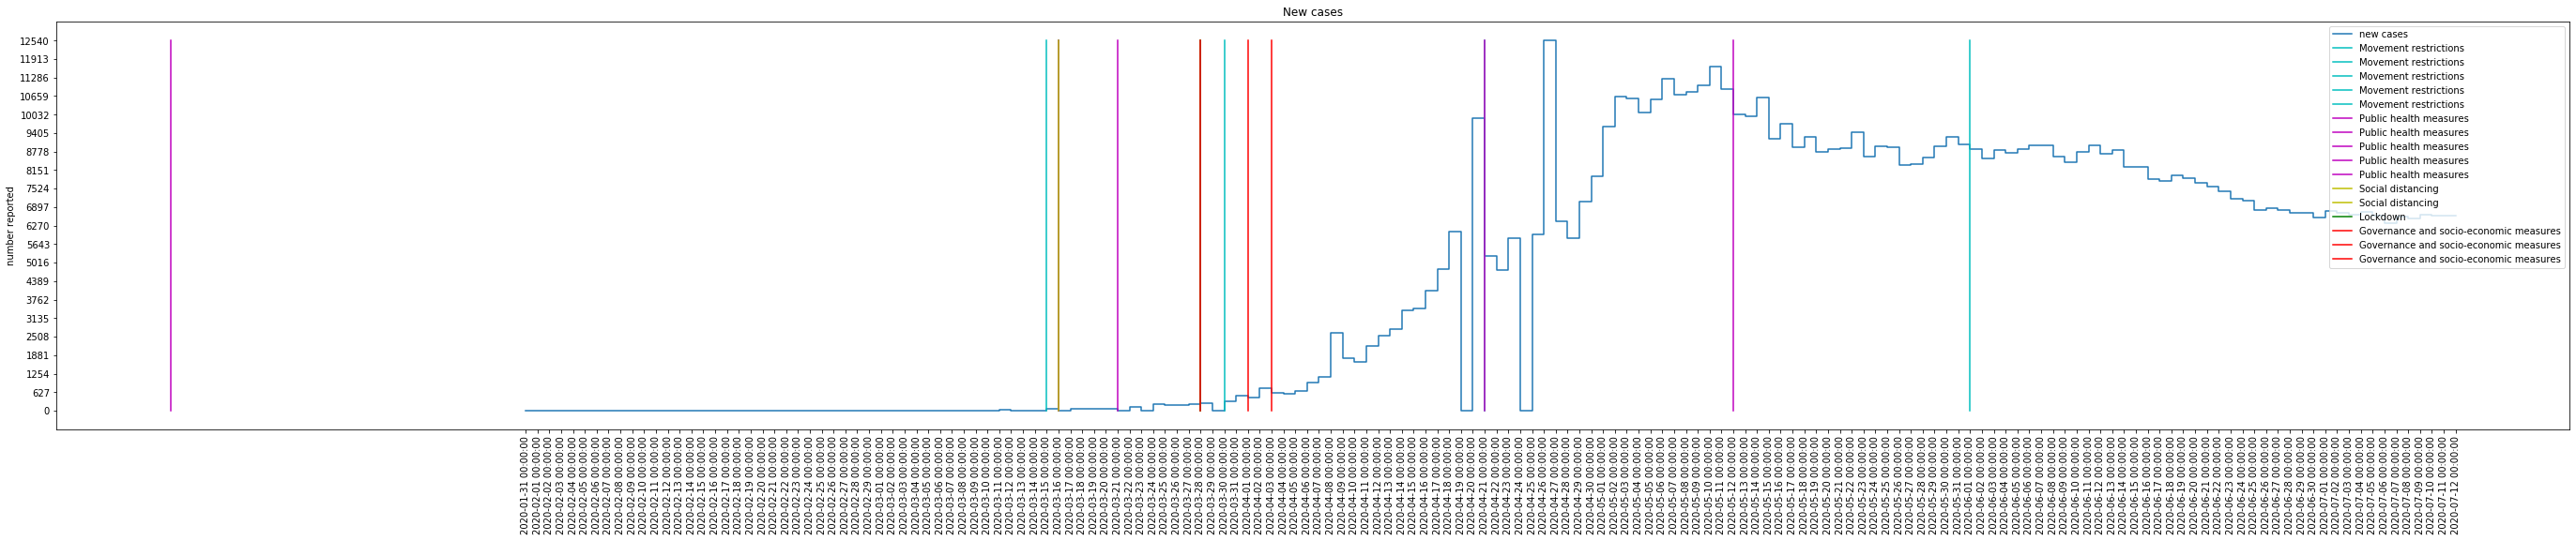

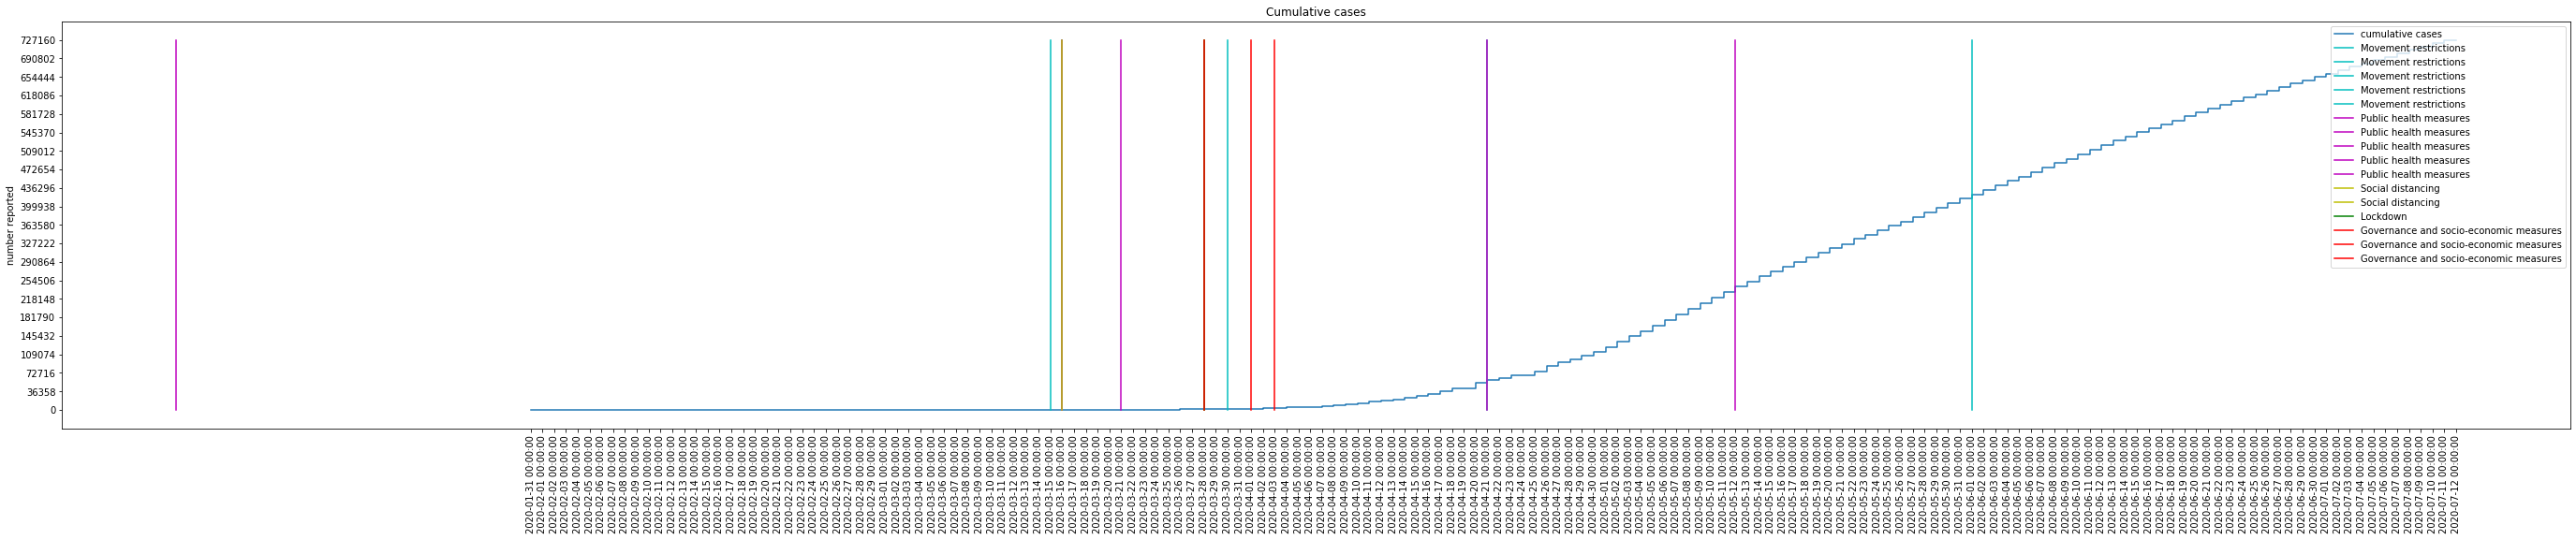

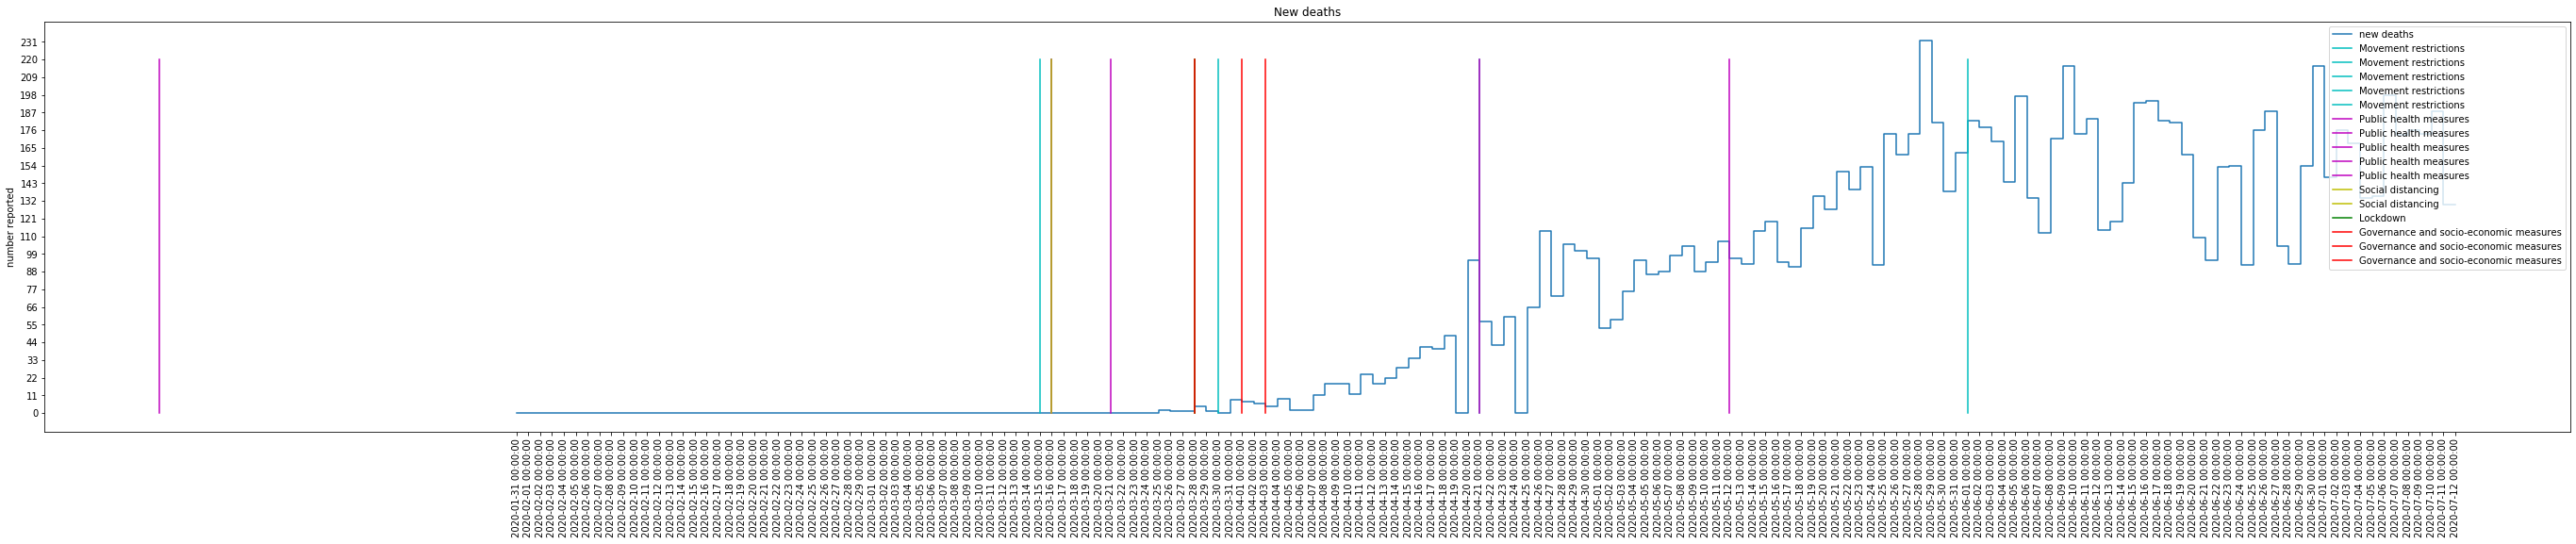

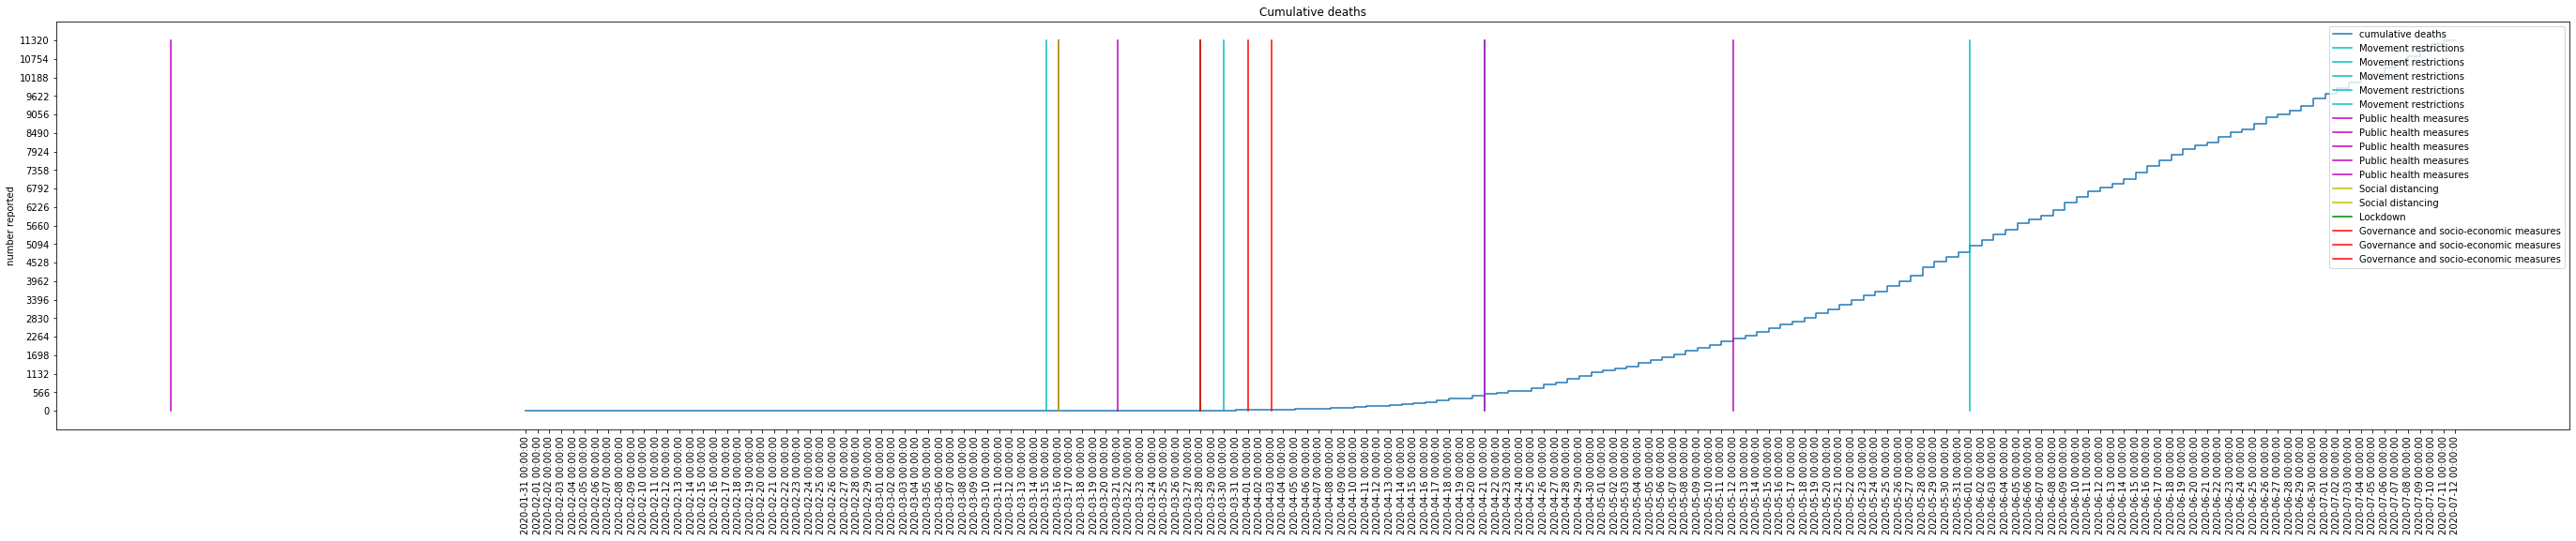

South Africa


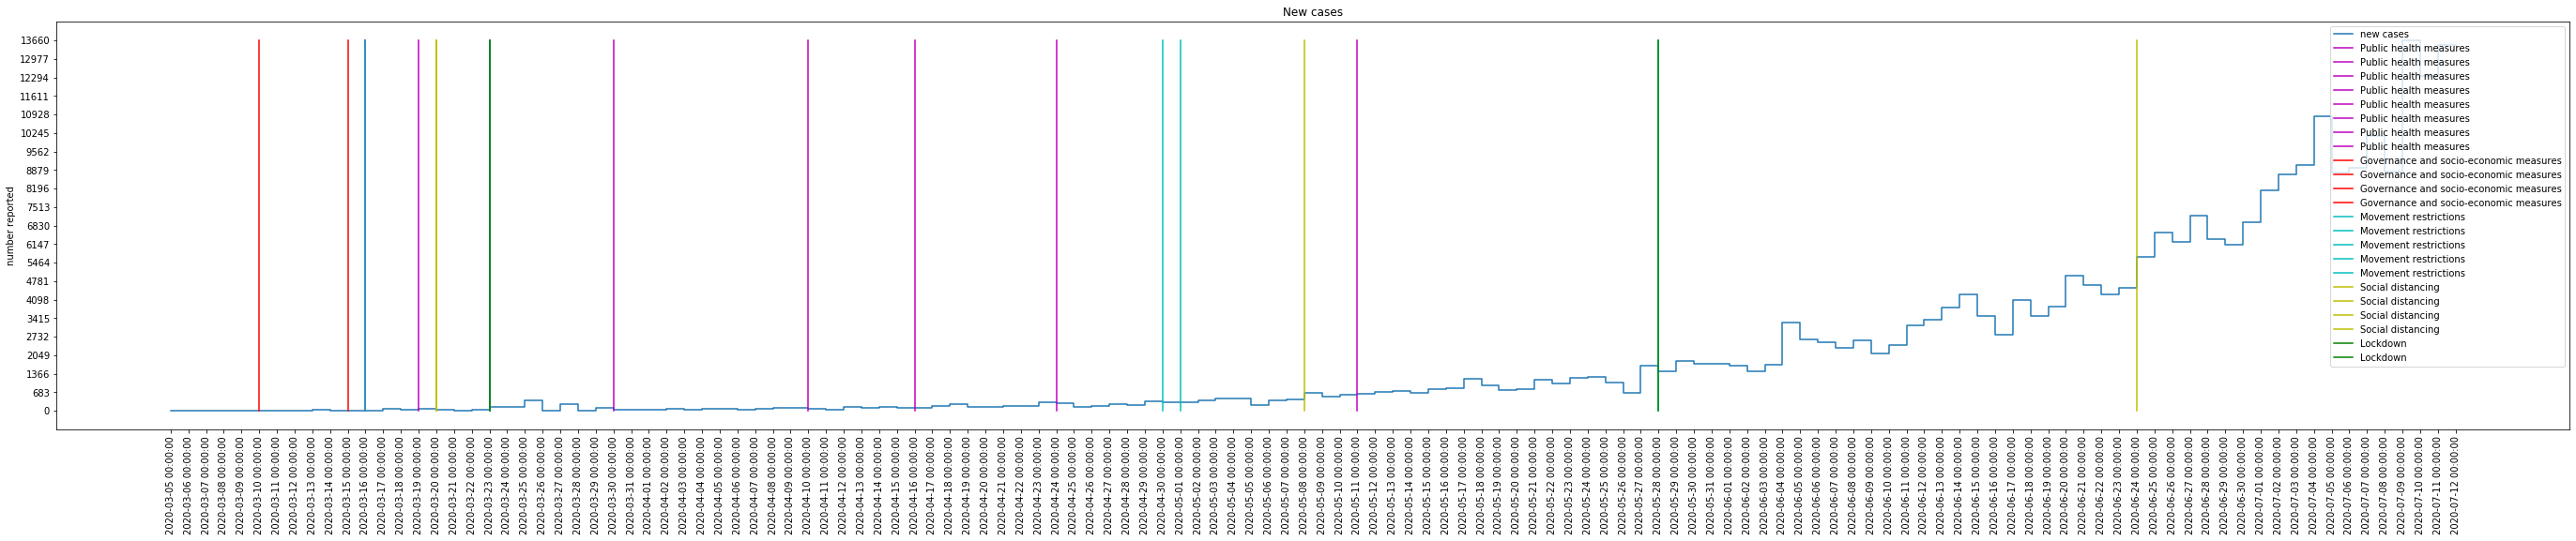

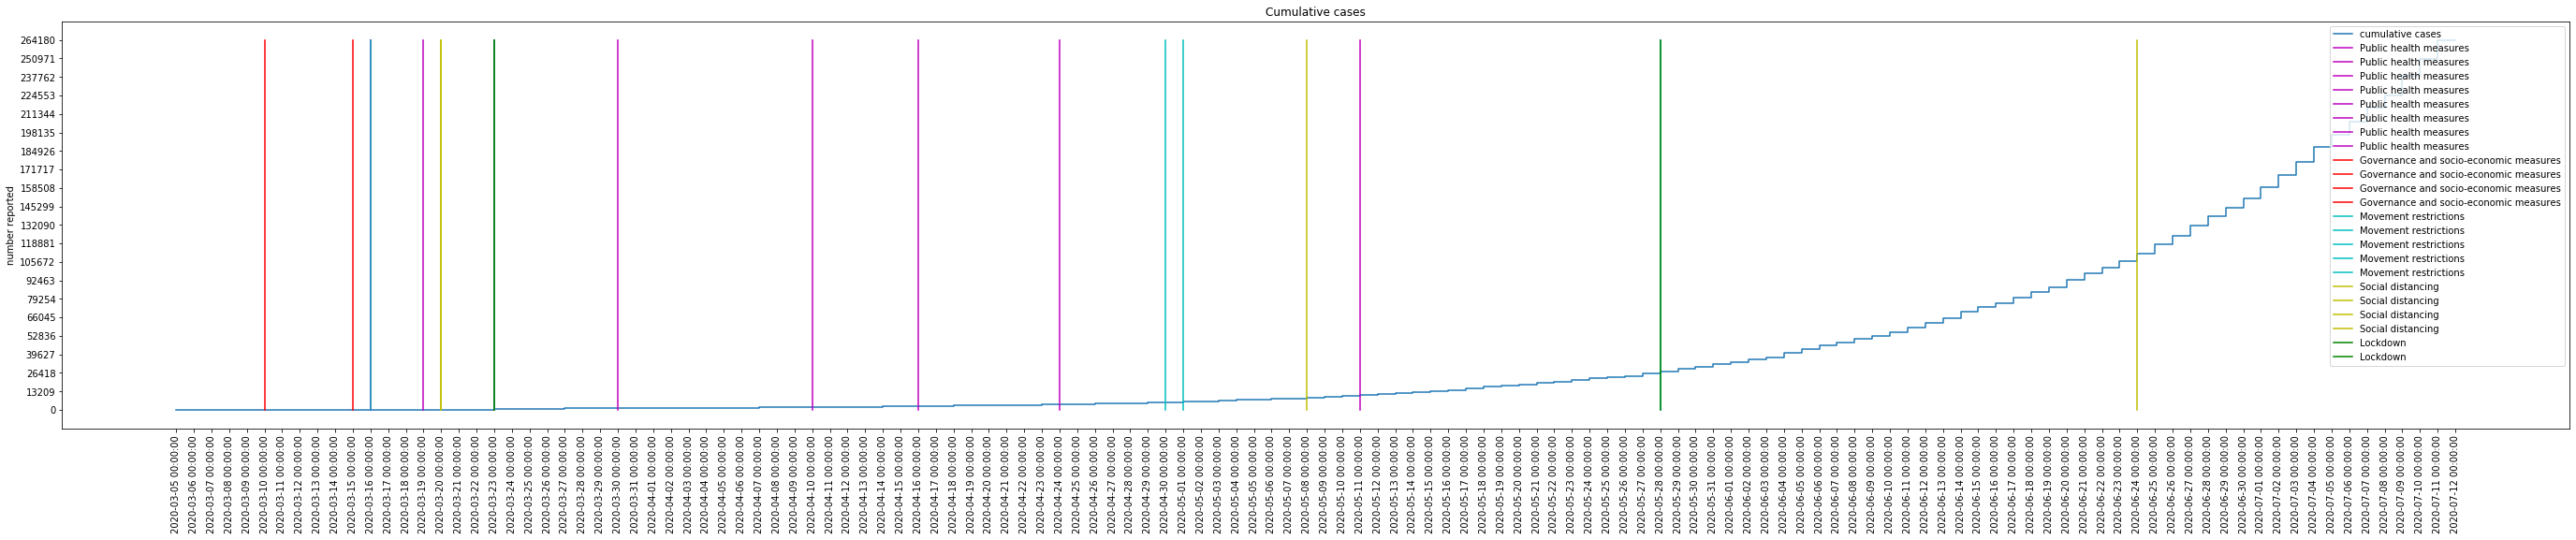

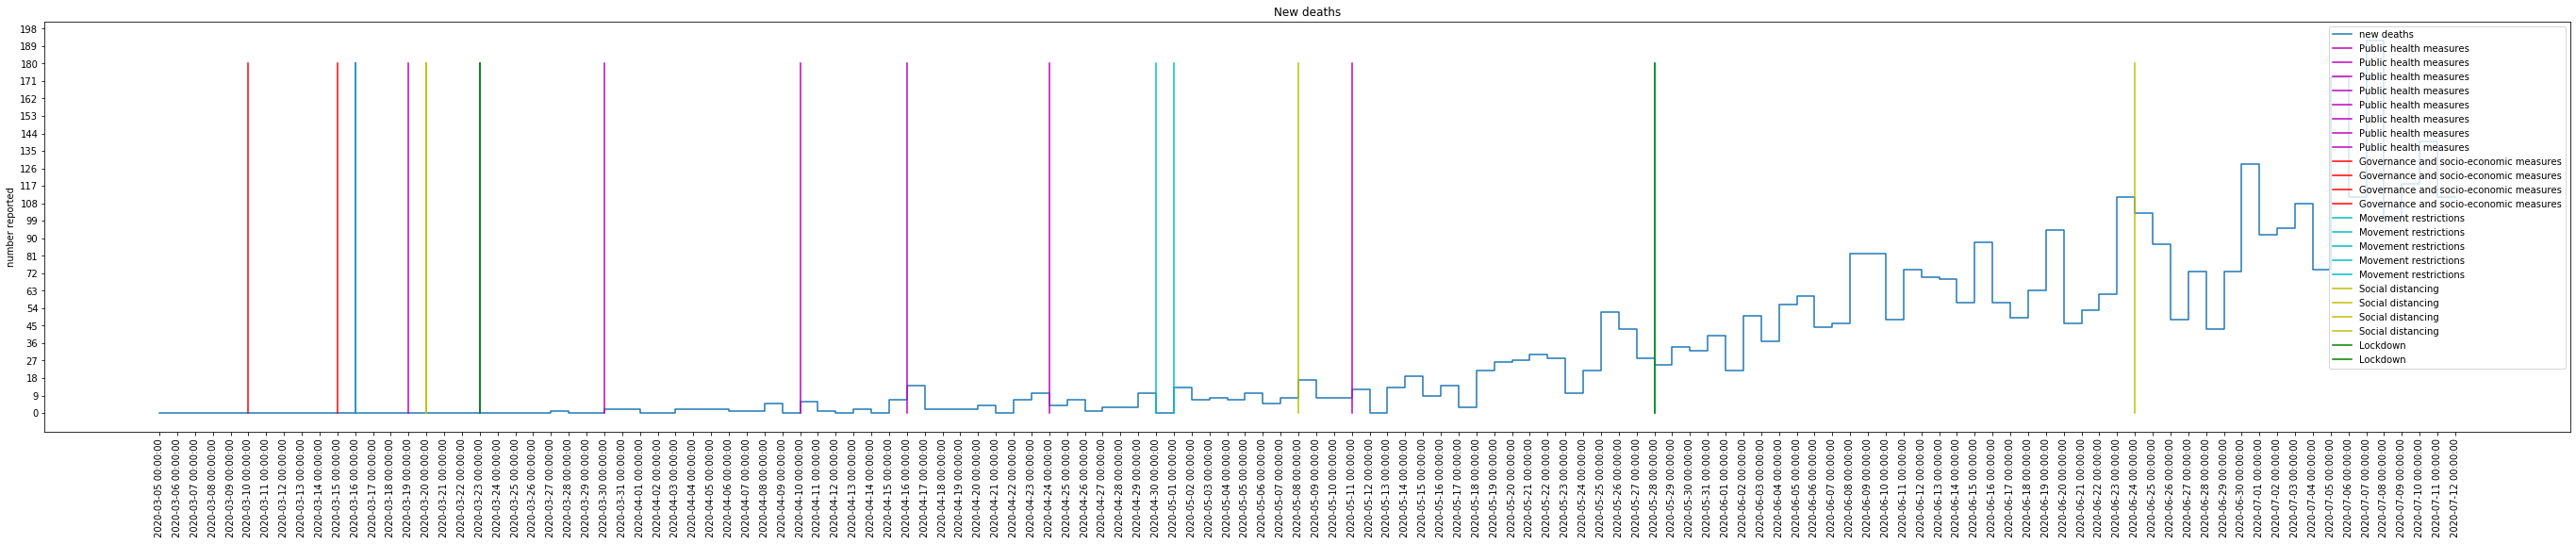

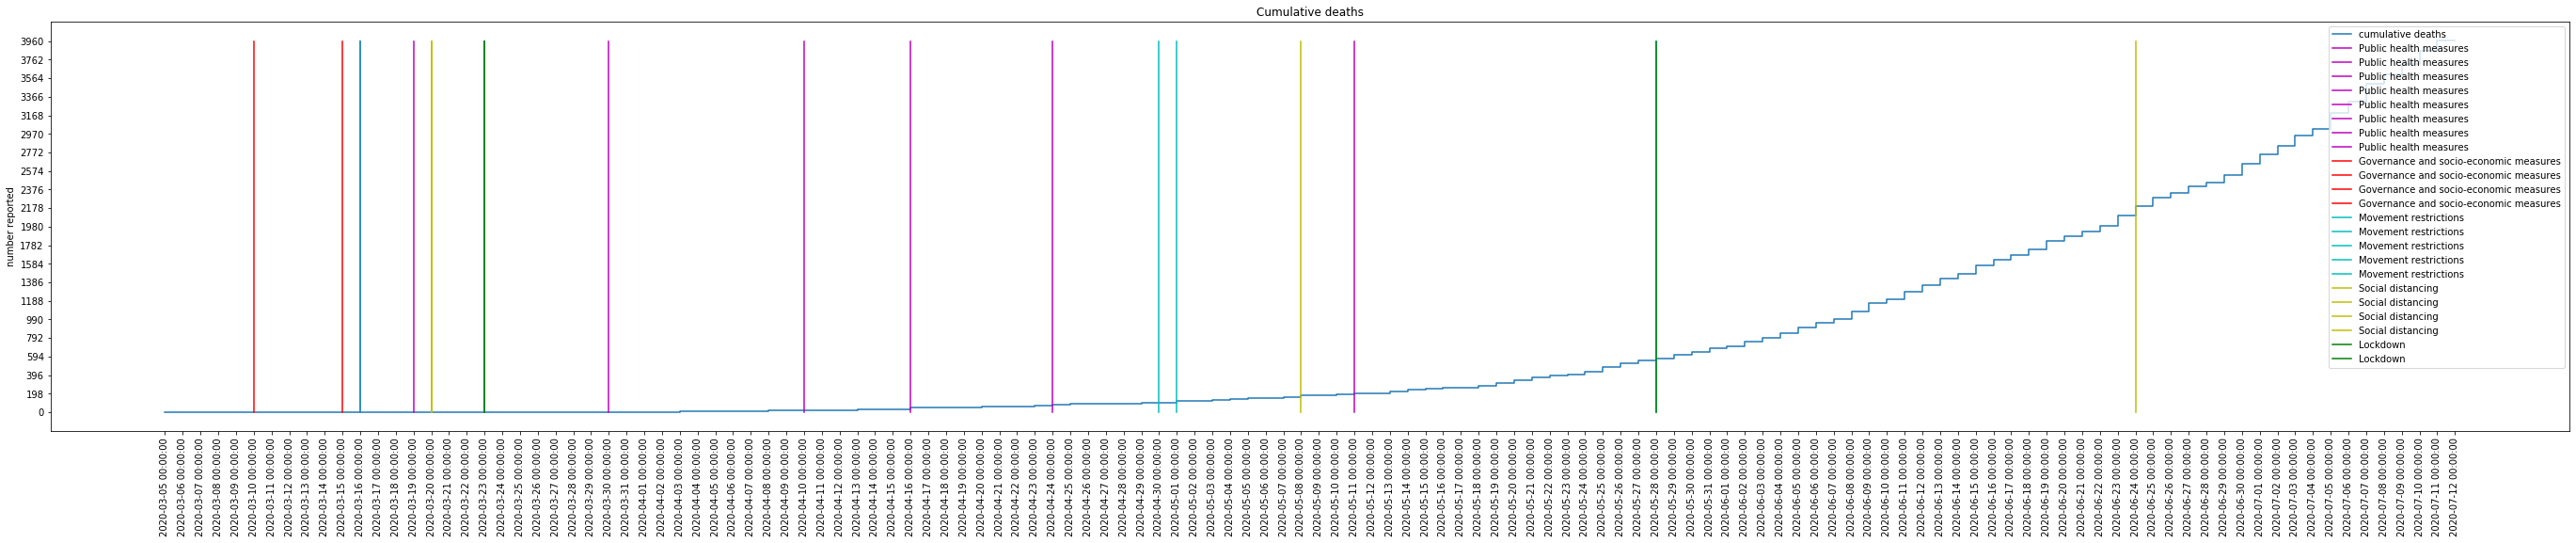

In [437]:
country_list=["US","CN","IT","BR","IN","RU","ZA"]
for iso in country_list:
    print(iso_dict[iso][1])
    draw_gov_graph_for_country(iso)
    print("=====================================================")

## Analysis of the effectiveness of government measures

In [432]:
from scipy import stats
import math

def gov_correlation(shift_v,show_pic=False):
    cor_result={}
    cor_min={}
    cor_ratio={}
    series_tag=['New_cases','New_deaths']
    measure_tag=["Governance and socio-economic measures", "Lockdown","Humanitarian exemption","Movement restrictions","Public health measures","Social distancing"]
    for series in series_tag:
        cor_result[series]={}
        cor_min[series]={}
        cor_ratio[series]=[]
    for series in series_tag:
        for tag in measure_tag:
            cor_result[series][tag]=[]
            cor_min[series][tag]=(1,"")
    for country in who_dict.keys():
        if country.strip() == "" or (iso_dict[country][0] not in gov_by_country.keys()):
            continue
        date= who_dict[country]['Date_reported']

        ind = np.arange(len(who_dict[country]['Date_reported']))
        for i in range(len(series_tag)):
            series=series_tag[i]
            data=who_dict[country][series]
            delta=[data[0]]
            for i in range(1,len(data)):
                delta.append(data[i]-data[i-1])
            delta=np.array(delta)
            for key in gov_by_country[iso_dict[country][0]]:
                x=[0 for j in range(len(who_dict[country]['Date_reported']))]
                count=0
                for sub in gov_by_country[iso_dict[country][0]][key].keys():
                    shift=min((gov_by_country[iso_dict[country][0]][key][sub][0]-date[0]).days+shift_v,len(x)-1)
                    shift=max(shift,0)
                    count+=1
                    for d in range(shift,len(x)):
                        x[d]=count
                x=np.array(x)
                res=stats.pearsonr(x, delta)
                if key in measure_tag:
                    if not math.isnan(res[0]):
                        if res[0]<cor_min[series][key][0]:
                            cor_min[series][key]=(res[0],country)
                        cor_result[series][key].append(res[0])
    for series in series_tag:
        for tag in measure_tag:
            print(tag+"'s affects on "+' '.join(series.split('_')).lower())
            pos=np.sum(np.array(cor_result[series][tag]) > 0, axis=0)
            neg=np.sum(np.array(cor_result[series][tag]) < 0, axis=0)
            print("positive correlation countries: "+str(pos))
            print("negative correlation countries: "+str(neg))
            cor_ratio[series].append(neg/(pos+neg))
            if cor_min[series][tag][1]!="":
                print("measure works best in: "+str(iso_dict[cor_min[series][tag][1]][1]))
            else:
                print("no best countries found")
            print("")
    if show_pic==True:
        cm_dict={'New_cases':'YlGnBu','New_deaths':"PuBuGn"}
        for series in series_tag:
            plt.figure(figsize=(12,8))
            ind = np.arange(len(cor_ratio[series]))
            my_cmap = cm.get_cmap(cm_dict[series])
            color=[random.uniform(0.1, 0.6) for i in range(len(tags))]
            p1 = plt.bar(ind, cor_ratio[series],color=my_cmap(color))
            plt.ylabel('effective rates')
            plt.title('Global Government Measure Effective Rates on '+' '.join(series.split('_')).title())
            plt.xticks(ind, measure_tag)
            plt.xticks(rotation=45)
            plt.show() 


align measures and cases/deaths curve without shifting
Governance and socio-economic measures's affects on new cases
positive correlation countries: 83
negative correlation countries: 78
measure works best in: Jordan

Lockdown's affects on new cases
positive correlation countries: 54
negative correlation countries: 59
measure works best in: Uruguay

Humanitarian exemption's affects on new cases
positive correlation countries: 6
negative correlation countries: 2
measure works best in: Ireland

Movement restrictions's affects on new cases
positive correlation countries: 81
negative correlation countries: 75
measure works best in: Switzerland

Public health measures's affects on new cases
positive correlation countries: 76
negative correlation countries: 86
measure works best in: Turkey

Social distancing's affects on new cases
positive correlation countries: 76
negative correlation countries: 84
measure works best in: Dominica

Governance and socio-economic measures's affects on new deat

/Users/xuziqi/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Governance and socio-economic measures's affects on new cases
positive correlation countries: 80
negative correlation countries: 83
measure works best in: Switzerland

Lockdown's affects on new cases
positive correlation countries: 59
negative correlation countries: 59
measure works best in: Ireland

Humanitarian exemption's affects on new cases
positive correlation countries: 5
negative correlation countries: 3
measure works best in: Ireland

Movement restrictions's affects on new cases
positive correlation countries: 79
negative correlation countries: 90
measure works best in: Turkey

Public health measures's affects on new cases
positive correlation countries: 71
negative correlation countries: 99
measure works best in: Turkey

Social distancing's affects on new cases
positive correlation countries: 82
negative correlation countries: 90
measure works best in: Grenada

Governance and socio-economic measures's affects on new deaths
positive correlation countries: 56
negative correlati

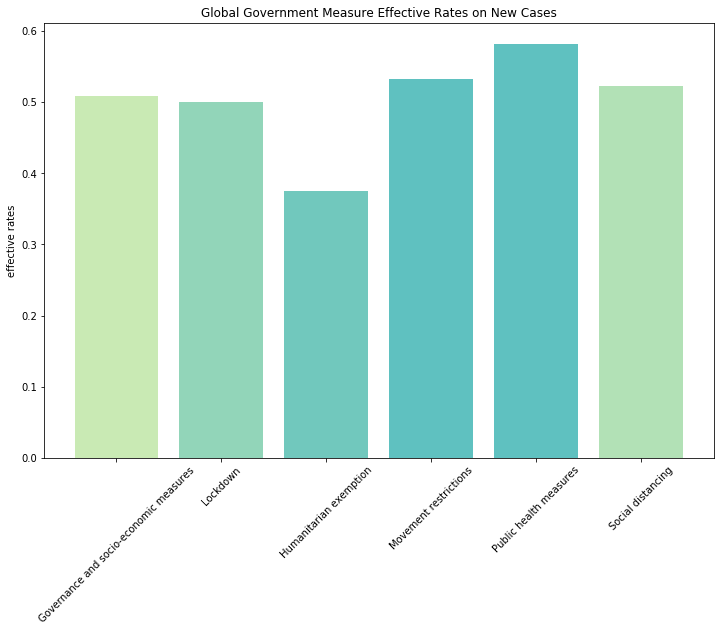

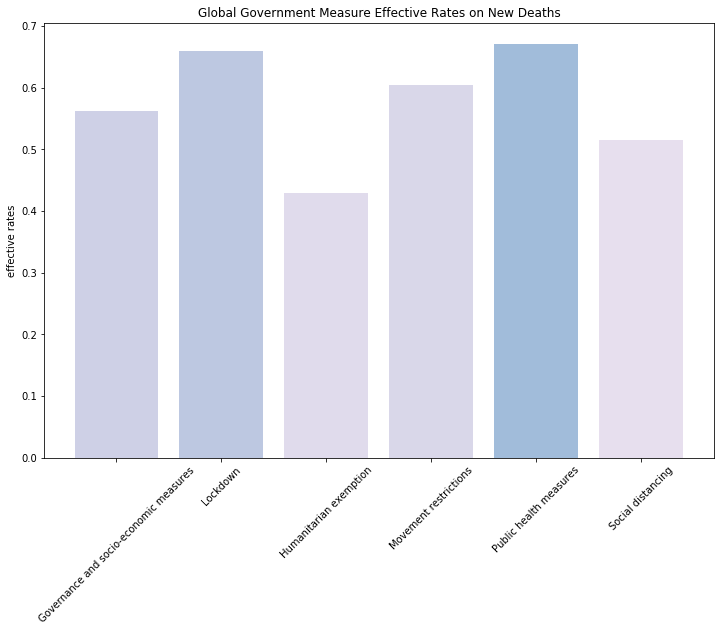

In [433]:
print("======================================")
print("align measures and cases/deaths curve without shifting")
gov_correlation(0)
print(print("======================================"))
print("align measures and cases/deaths curve 7 days later")
gov_correlation(7)
print(print("======================================"))
print("align measures and cases/deaths curve 14 days later")
gov_correlation(14,True)

## Analysis of the effectiveness of educational measures

In [434]:
from scipy import stats
import math
def edu_correlation(shift_v,show_pic=False):
    cor_result={}
    cor_min={}
    cor_ratio={}
    series_tag=['New_cases','New_deaths']
    measure_tag=["national close","localized close","localized reopen","national reopen","open"]
    for series in series_tag:
        cor_result[series]={}
        cor_min[series]={}
        cor_ratio[series]=[]
    for series in series_tag:
        for tag in measure_tag:
            cor_result[series][tag]=[]
            cor_min[series][tag]=(1,"")
    

    for country in who_dict.keys():

        if country.strip() == "" or (iso_dict[country][0] not in edu_by_country.keys()):
            continue
        date= who_dict[country]['Date_reported']

        ind = np.arange(len(who_dict[country]['Date_reported']))
        for i in range(len(series_tag)):
            series=series_tag[i]
            data=who_dict[country][series]
            delta=[data[0]]
            for i in range(1,len(data)):
                delta.append(data[i]-data[i-1])
            delta=np.array(delta)
            for key in edu_by_country[iso_dict[country][0]]:

                x=[False for j in range(len(who_dict[country]['Date_reported']))]
                shift=min((edu_by_country[iso_dict[country][0]][key]-date[0]).days+shift_v,len(x)-1)
                shift=max(shift,0)
                x[shift]=True
                x=np.array(x)
                res=stats.pearsonr(x, delta)
                if key in measure_tag:
                    if not math.isnan(res[0]):
                        if res[0]<cor_min[series][key][0]:
                            cor_min[series][key]=(res[0],country)
                        cor_result[series][key].append(res[0])

    for series in series_tag:
        for tag in measure_tag:
            print("============================================")
            print(tag+"'s affects on "+' '.join(series.split('_')).lower())
            pos=np.sum(np.array(cor_result[series][tag]) > 0, axis=0)
            neg=np.sum(np.array(cor_result[series][tag]) < 0, axis=0)
            print("positive correlation countries: "+str(pos))
            print("negative correlation countries: "+str(neg))
            cor_ratio[series].append(neg/(pos+neg))
            print("measure works best in: "+str(iso_dict[cor_min[series][tag][1]][1]))
            print("")
    
    if show_pic==True:
        for series in series_tag:
            cm_dict={'New_cases':'YlGnBu','New_deaths':"PuBuGn"}
            plt.figure(figsize=(12,8))
            ind = np.arange(len(cor_ratio[series]))
            color=[random.uniform(0.1, 0.6) for i in range(len(tags))]
            my_cmap = cm.get_cmap(cm_dict[series])
            p1 = plt.bar(ind, cor_ratio[series],color=my_cmap(color))
            plt.ylabel('effective rates')
            plt.title('Global Educational Measure Effective Rates on '+' '.join(series.split('_')).title())
            plt.xticks(ind, measure_tag)
            plt.xticks(rotation=45)
            plt.show() 


align measures and cases/deaths curve without shifting
national close's affects on new cases
positive correlation countries: 85
negative correlation countries: 96
measure works best in: Greenland

localized close's affects on new cases
positive correlation countries: 38
negative correlation countries: 50
measure works best in: Australia

localized reopen's affects on new cases
positive correlation countries: 3
negative correlation countries: 4
measure works best in: Lithuania

national reopen's affects on new cases
positive correlation countries: 1
negative correlation countries: 1
measure works best in: Norway

open's affects on new cases
positive correlation countries: 1
negative correlation countries: 0
measure works best in: Iceland

national close's affects on new deaths
positive correlation countries: 28
negative correlation countries: 80
measure works best in: Philippines

localized close's affects on new deaths
positive correlation countries: 28
negative correlation countries: 

/Users/xuziqi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in long_scalars


national close's affects on new cases
positive correlation countries: 65
negative correlation countries: 110
measure works best in: Anguilla

localized close's affects on new cases
positive correlation countries: 38
negative correlation countries: 50
measure works best in: Canada

localized reopen's affects on new cases
positive correlation countries: 4
negative correlation countries: 3
measure works best in: Lithuania

national reopen's affects on new cases
positive correlation countries: 2
negative correlation countries: 0
measure works best in: China

open's affects on new cases
positive correlation countries: 0
negative correlation countries: 1
measure works best in: Iceland

national close's affects on new deaths
positive correlation countries: 46
negative correlation countries: 80
measure works best in: Botswana

localized close's affects on new deaths
positive correlation countries: 26
negative correlation countries: 36
measure works best in: Liberia

localized reopen's affects 

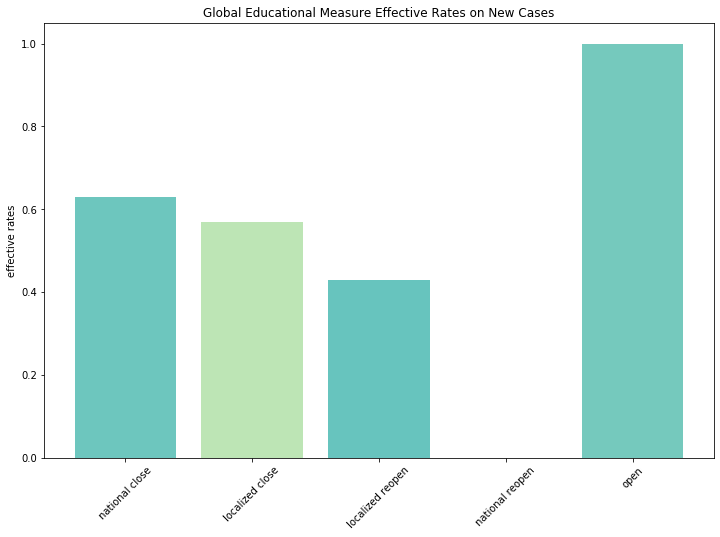

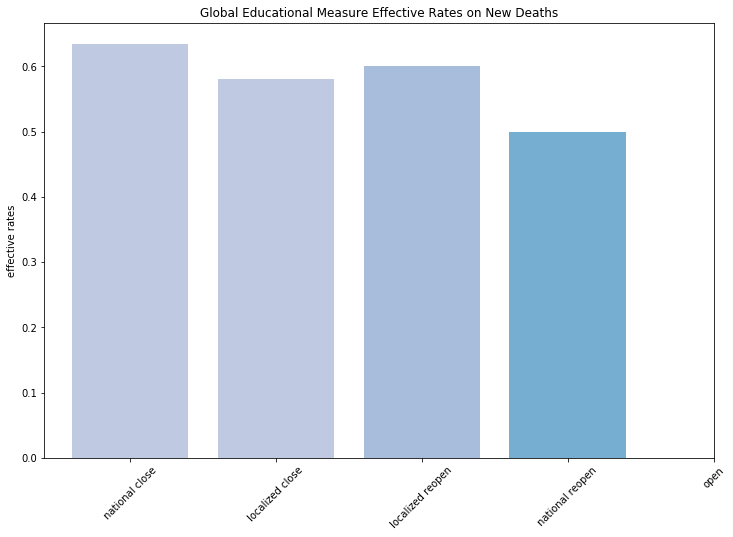

In [435]:
print("======================================")
print("align measures and cases/deaths curve without shifting")
edu_correlation(0)
print("======================================")
print("align measures and cases/deaths curve 7 days later")
edu_correlation(7)
print("======================================")
print("align measures and cases/deaths curve 14 days later")
edu_correlation(14,True)